In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import pickle
plt.style.use('seaborn-v0_8-pastel')
from scipy.stats import spearmanr
from scipy.stats import pearsonr
from scipy.stats import ttest_ind
from scipy.stats import shapiro
from scipy.stats import mannwhitneyu
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score 
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Conv1D, InputLayer, SimpleRNN
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

import sys 
sys.path.append(r'E:\data_science_projects\Walmart Sales Analysis and Forecasting\src')

from plot_figures import SalesPlots
from utils import make_dataset, Seasonality, TsaPlots, TimeSeriesModel, preprocess_data

import warnings 
warnings.filterwarnings('ignore')


# DATA PREPROCESSING  & EDA 


In [2]:
df = pd.read_csv('../Walmart Sales Analysis and Forecasting/data/raw')
df.head()

Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0        46.63       2.561   
4      1  05-03-2010    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106

In [3]:
#3plt.style.available

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [5]:
df.tail()

Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
6430     45  28-09-2012     713173.95             0        64.88       3.997   
6431     45  05-10-2012     733455.07             0        64.89       3.985   
6432     45  12-10-2012     734464.36             0        54.47       4.000   
6433     45  19-10-2012     718125.53             0        56.47       3.969   
6434     45  26-10-2012     760281.43             0        58.85       3.882   

             CPI  Unemployment  
6430  192.013558         8.684  
6431  192.170412         8.667  
6432  192.327265         8.667  
6433  192.330854         8.667  
6434  192.308899         8.667

In [6]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [7]:
df.set_index('Date', inplace=True)

In [8]:
pd.to_pickle(df, "../New folder/data/walmart.pkl")

# SALES ANALYISIS FOR STORE 2

In [28]:
sales_plots = SalesPlots(df)

Features vs Weekly Sales plots for store 2


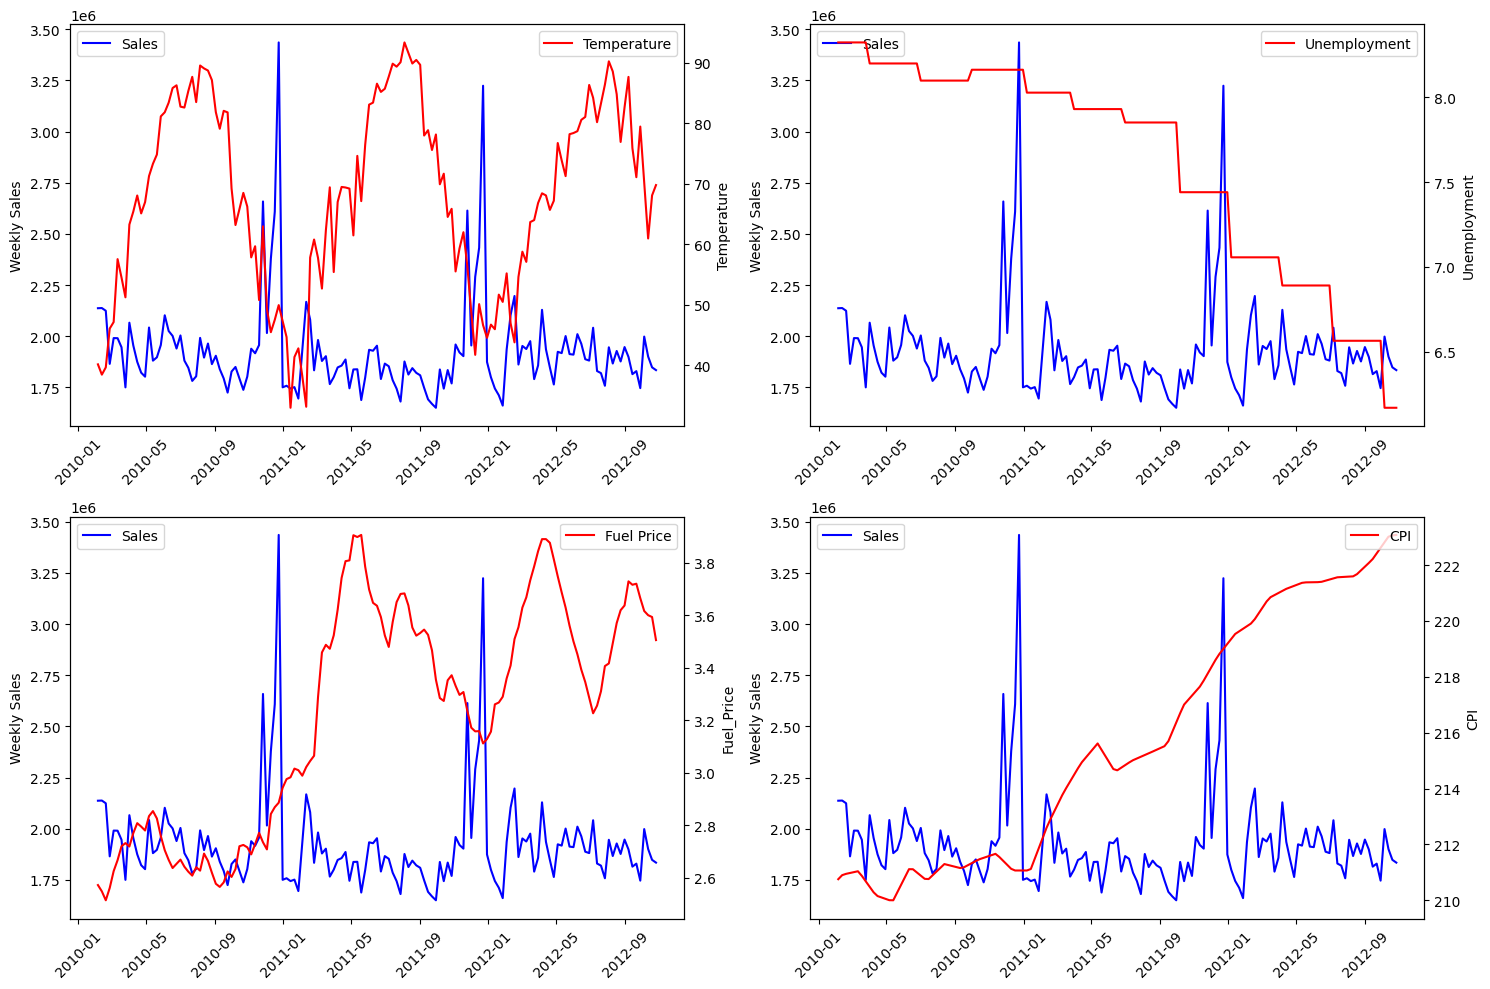

In [4]:
store_2 = sales_plots.feature_sales_plot(store_number=2)

AGGREGATE PLOTS FOR STORE 2

Features vs Weekly Sales plots for store 2
Aggregate Sales Plots for store 2


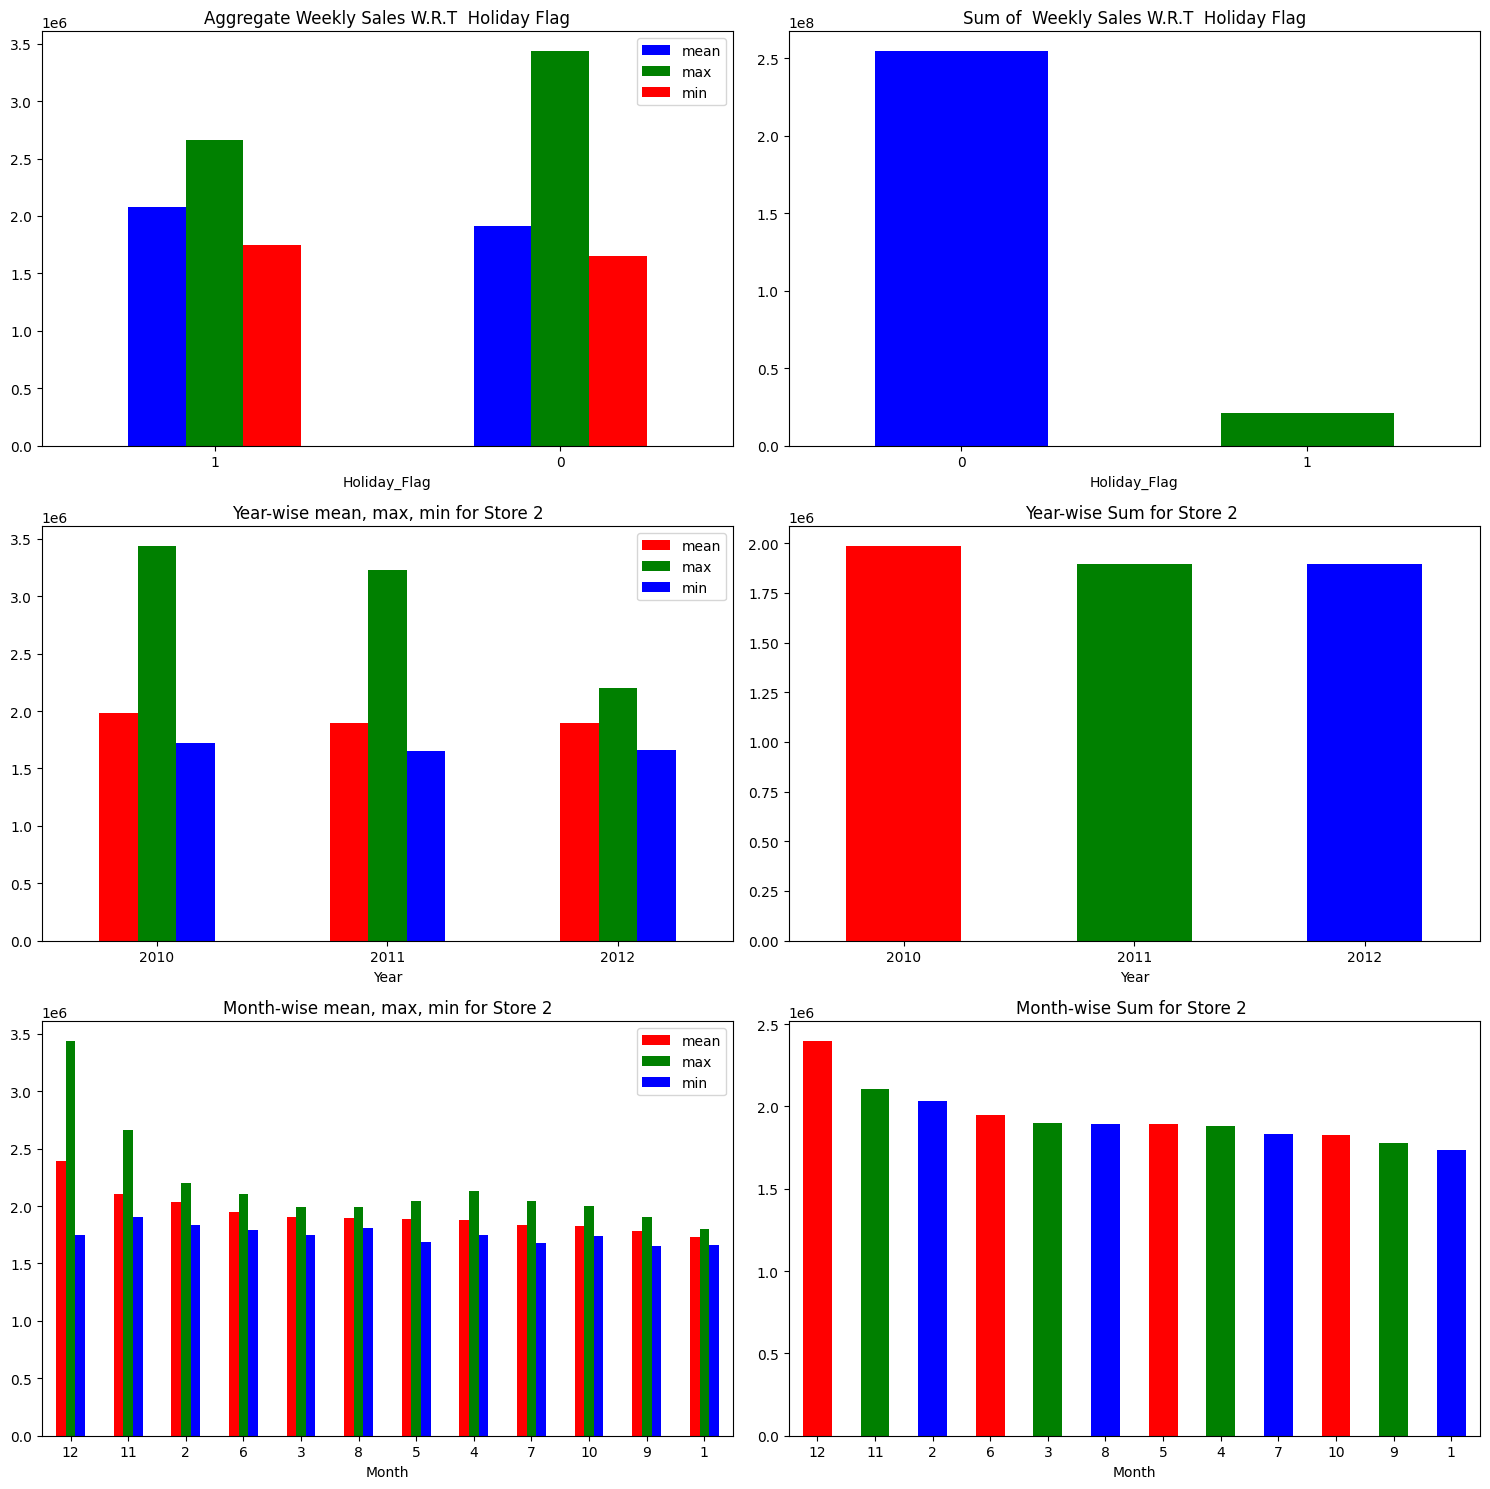

In [11]:
store_2 = sales_plots.aggregate_sales_plot(store_number=2)

Features vs Weekly Sales plots for store 2 in the Year 2010
            Store  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
Date                                                                     
2010-02-05      2    2136989.46             0        40.19       2.572   
2010-02-12      2    2137809.50             1        38.49       2.548   
2010-02-19      2    2124451.54             0        39.69       2.514   
2010-02-26      2    1865097.27             0        46.10       2.561   
2010-03-05      2    1991013.13             0        47.17       2.625   
2010-03-12      2    1990483.78             0        57.56       2.667   
2010-03-19      2    1946070.88             0        54.52       2.720   
2010-03-26      2    1750197.81             0        51.26       2.732   
2010-04-02      2    2066187.72             0        63.27       2.719   
2010-04-09      2    1954689.21             0        65.41       2.770   
2010-04-16      2    1874957.94             0       

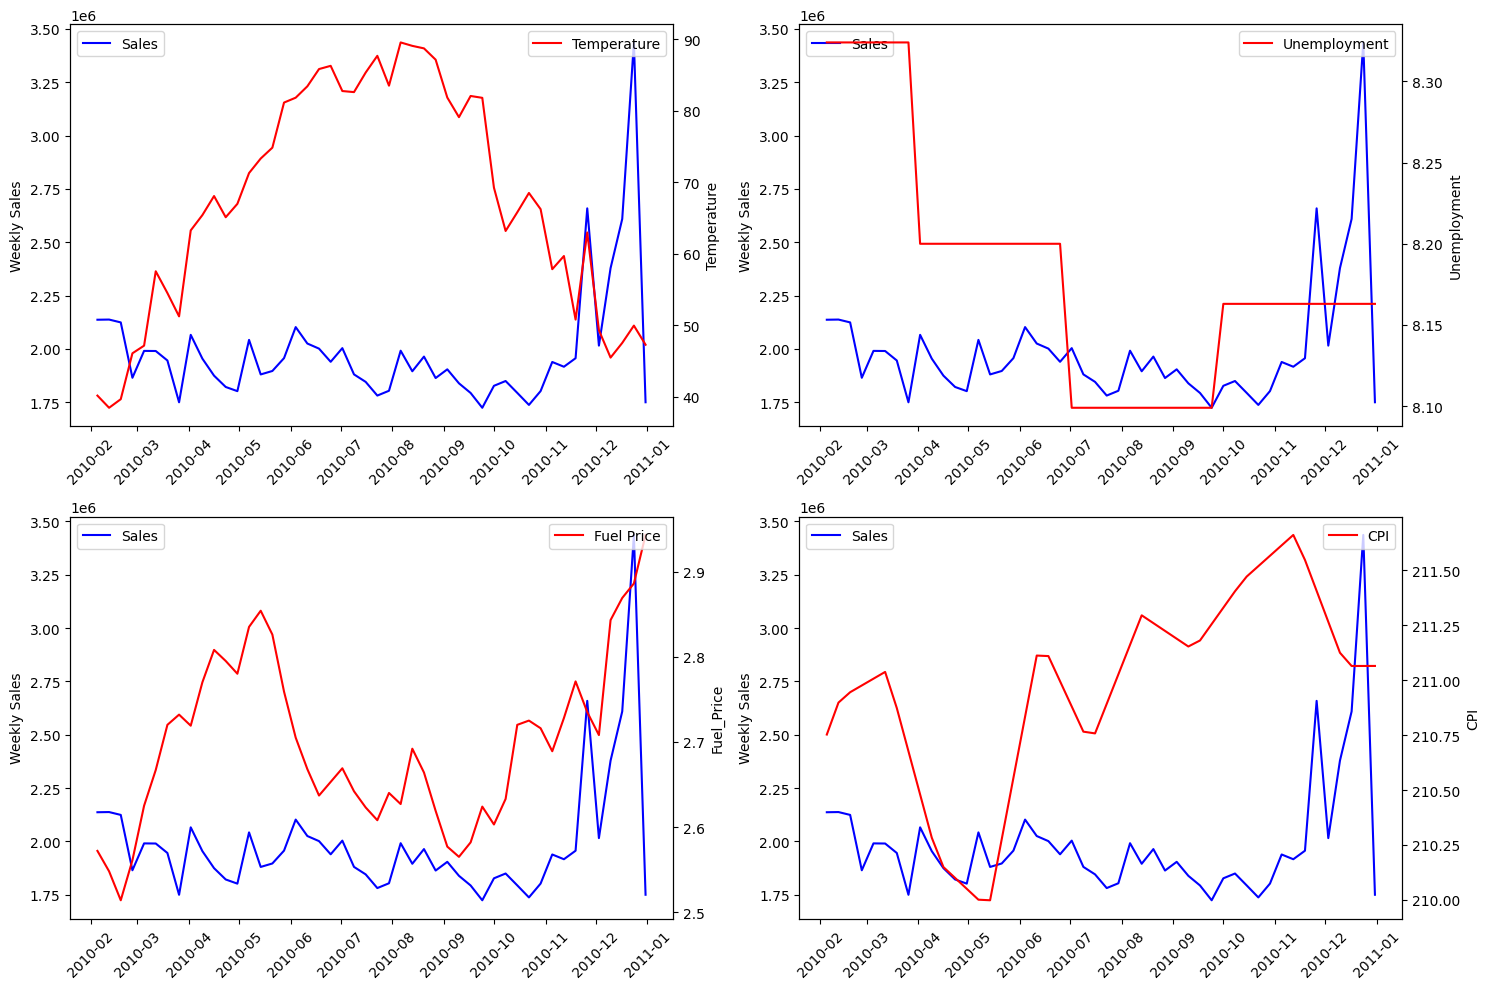

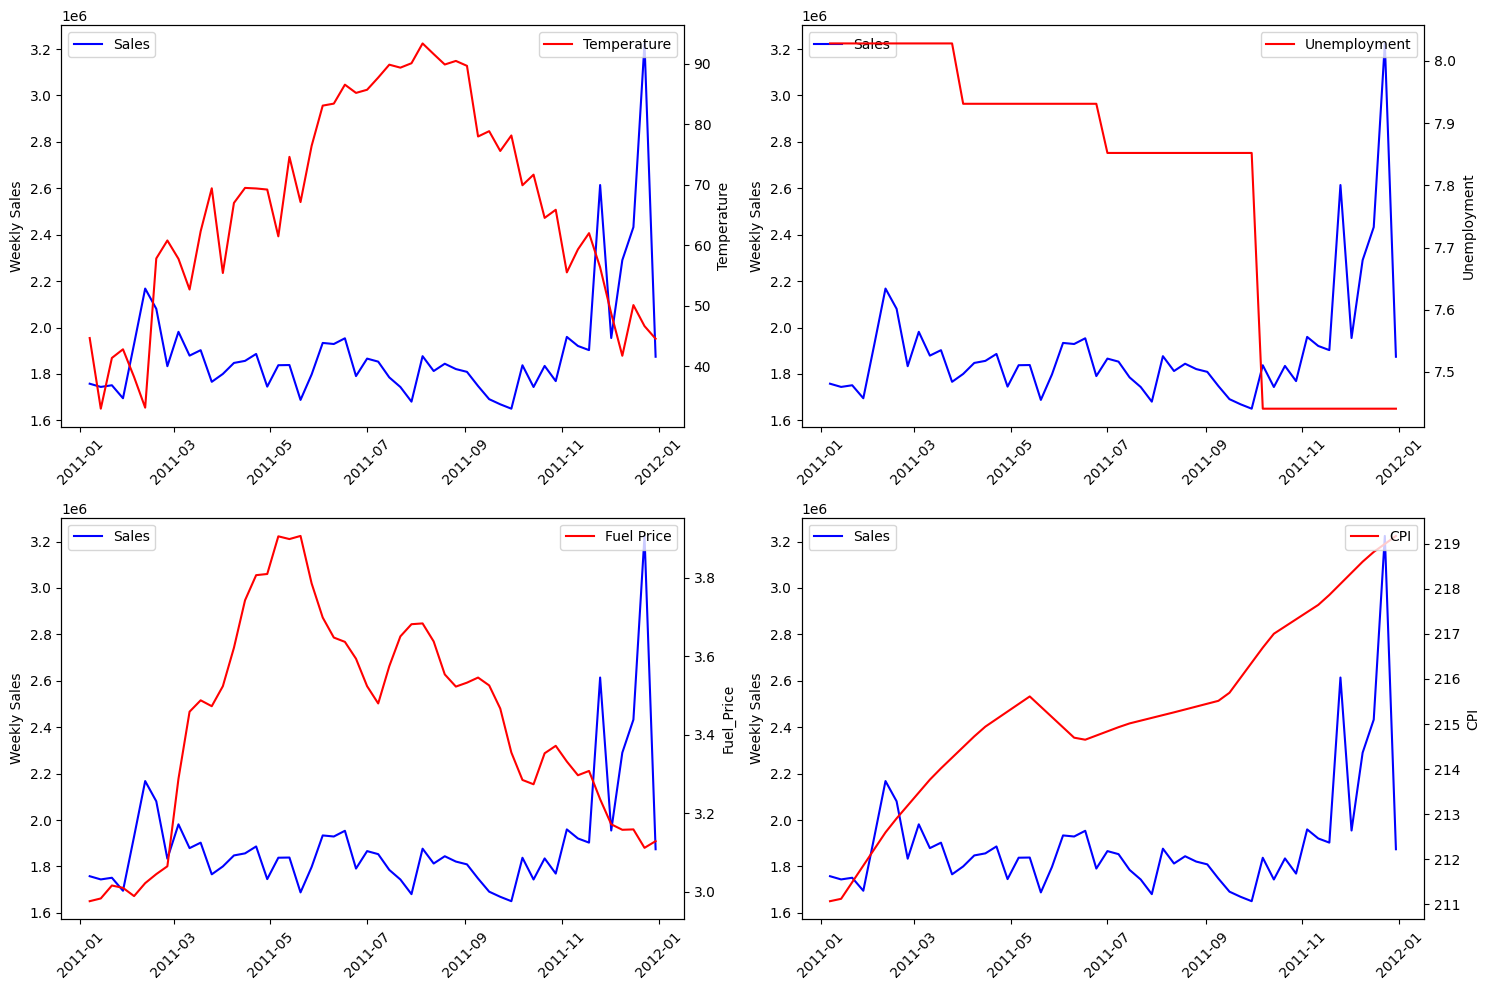

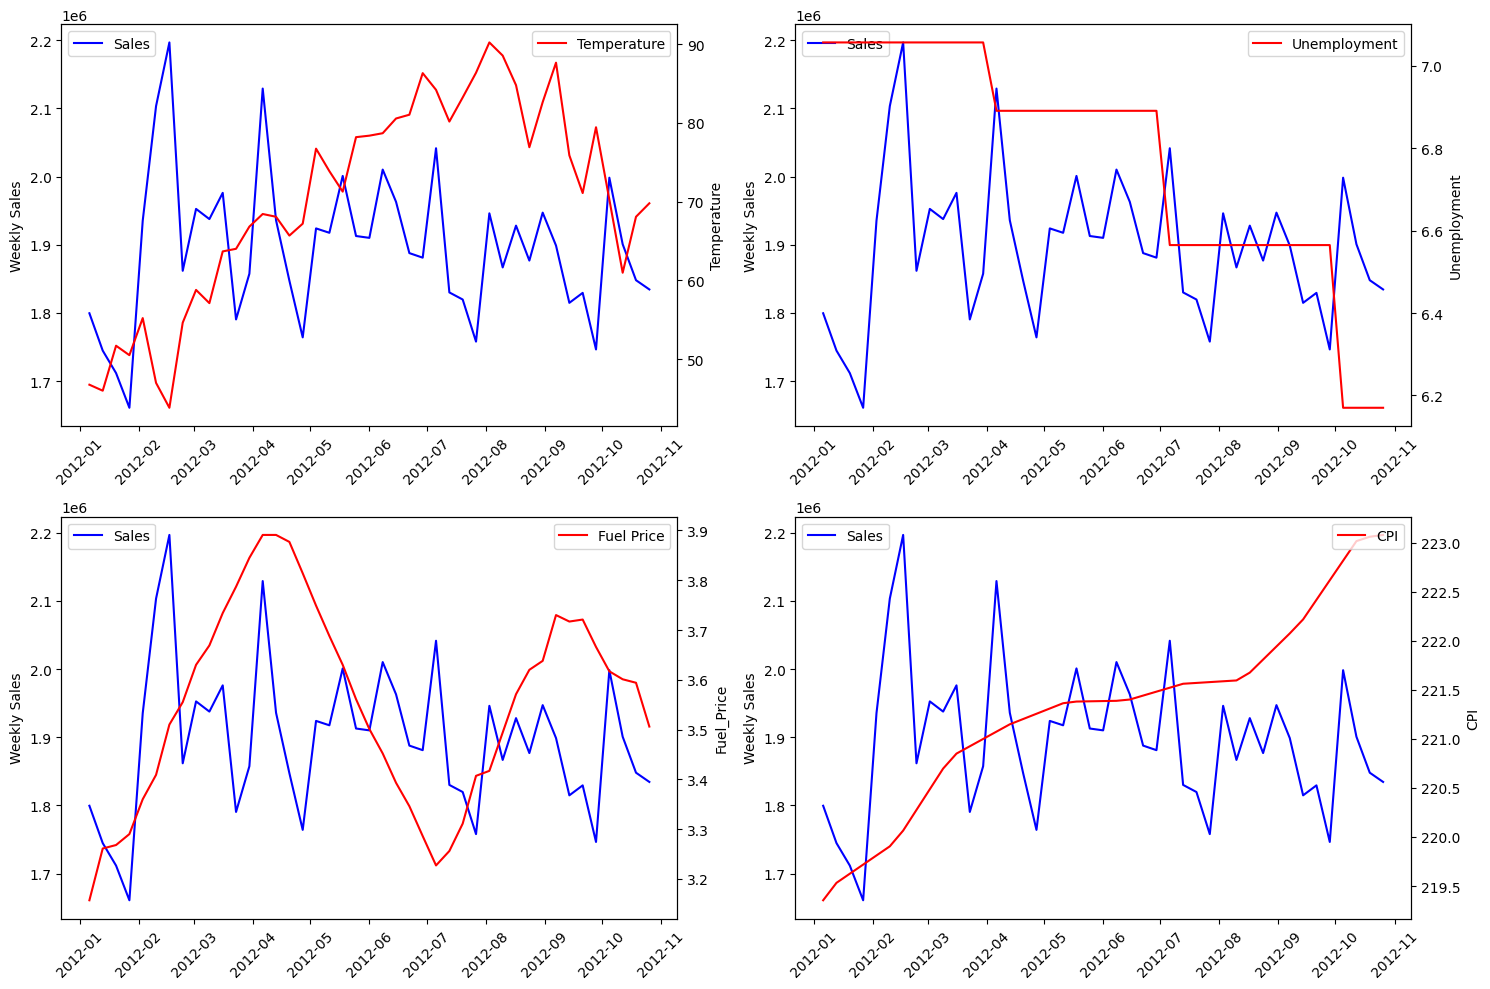

In [13]:
print(sales_plots.feature_sales_plot_year_wise(store_number=2, year=2010)) 
print(sales_plots.feature_sales_plot_year_wise(store_number=2, year=2011))  
print(sales_plots.feature_sales_plot_year_wise(store_number=2, year=2012))

# SALES ANALYSYS FOR STORE 45

Features vs Weekly Sales plots for store 45
Features vs Weekly Sales plots for store 45
Aggregate Sales Plots for store 45


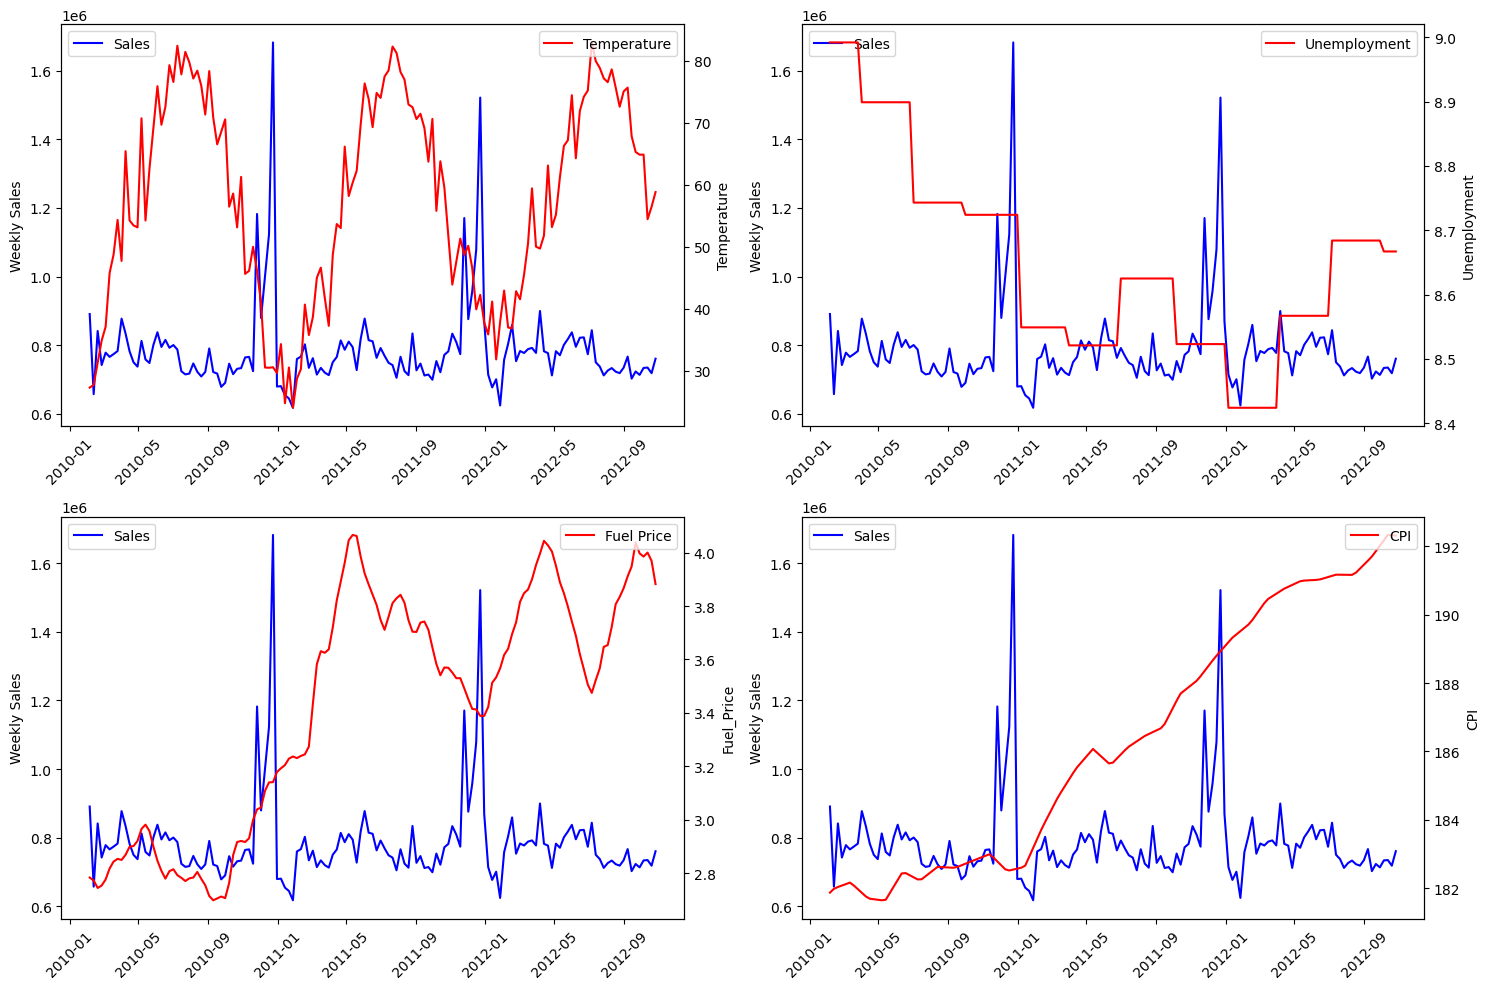

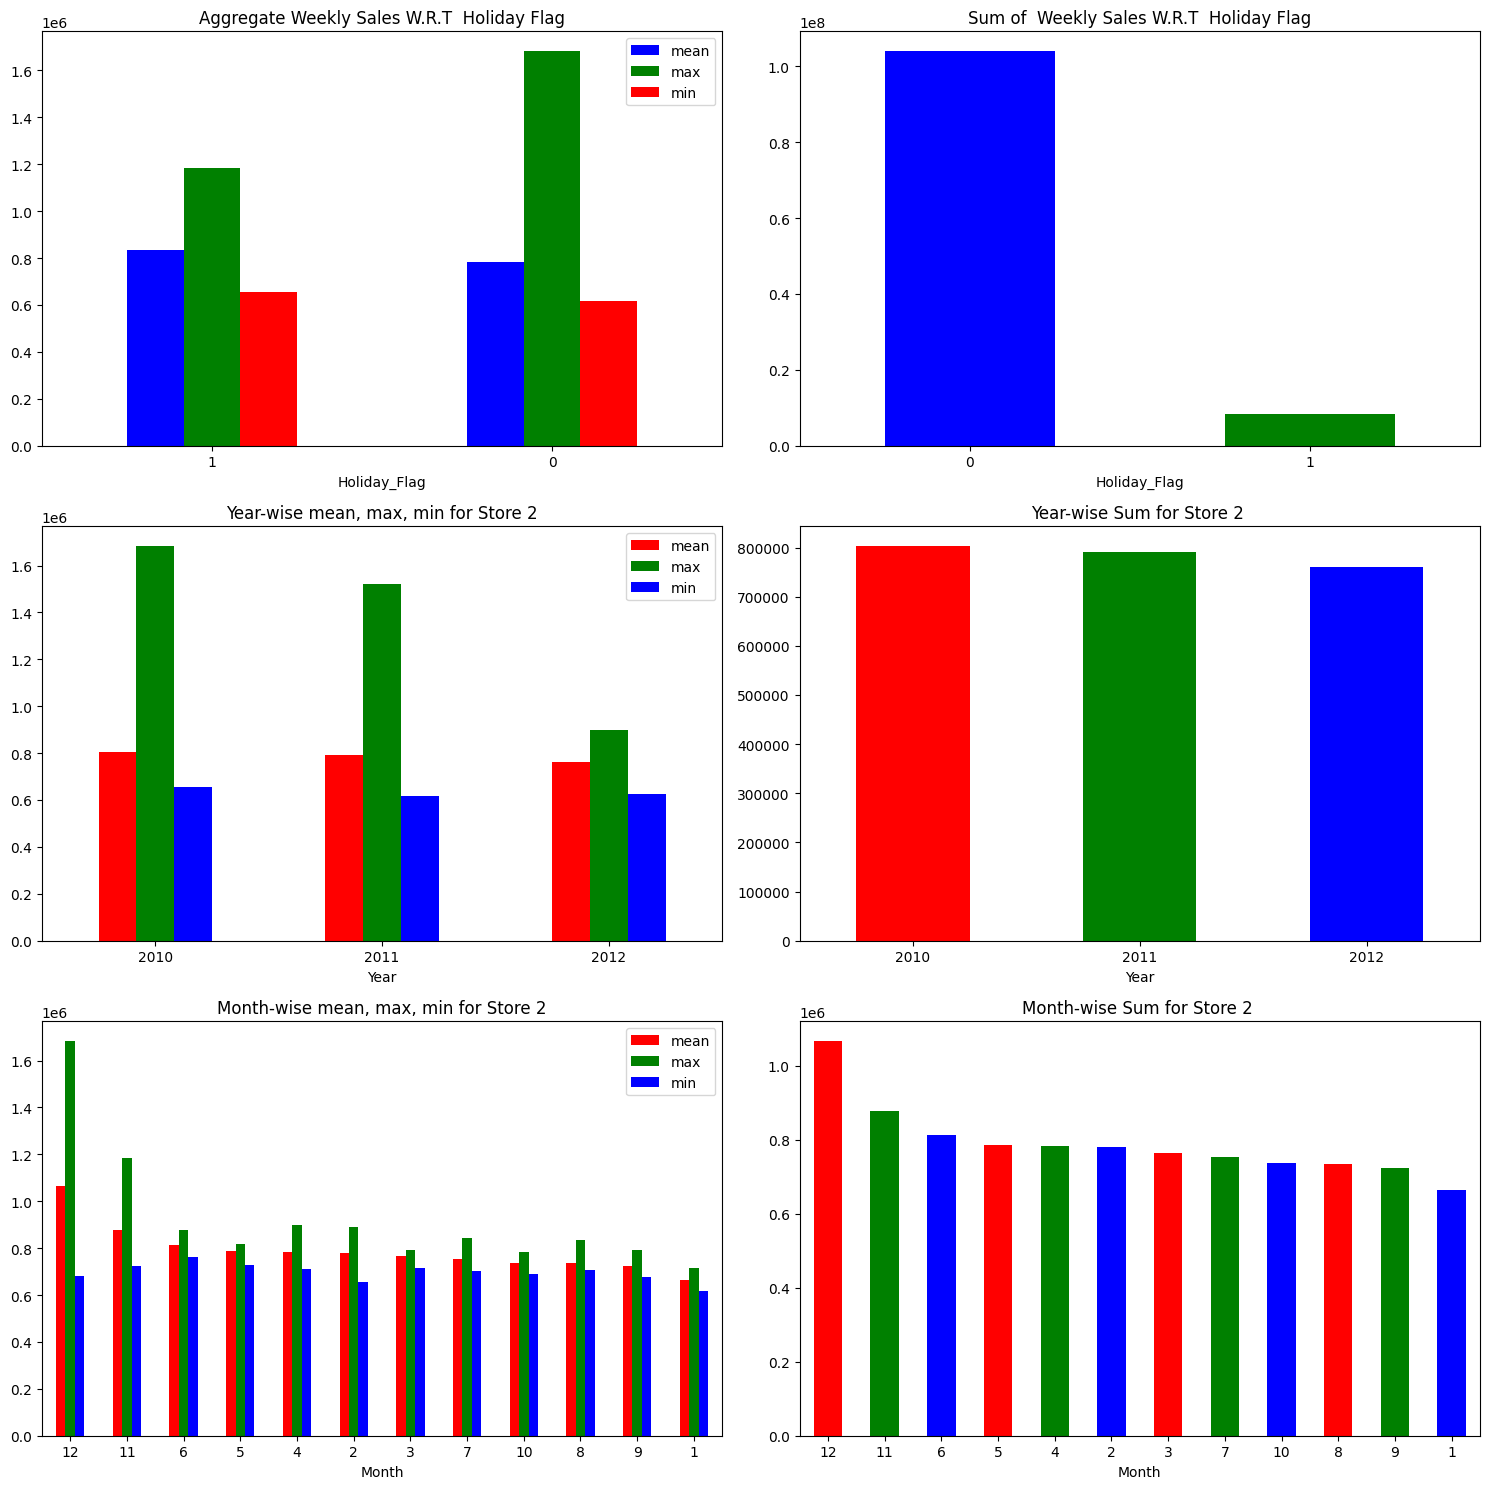

In [5]:
sales_plots.combined_plots(store_number=45)

Analyizing year-wise sales plots 

Features vs Weekly Sales plots for store 45 in the Year 2010
Features vs Weekly Sales plots for store 45
Aggregate Sales Plots for store 45 in the Year 2010


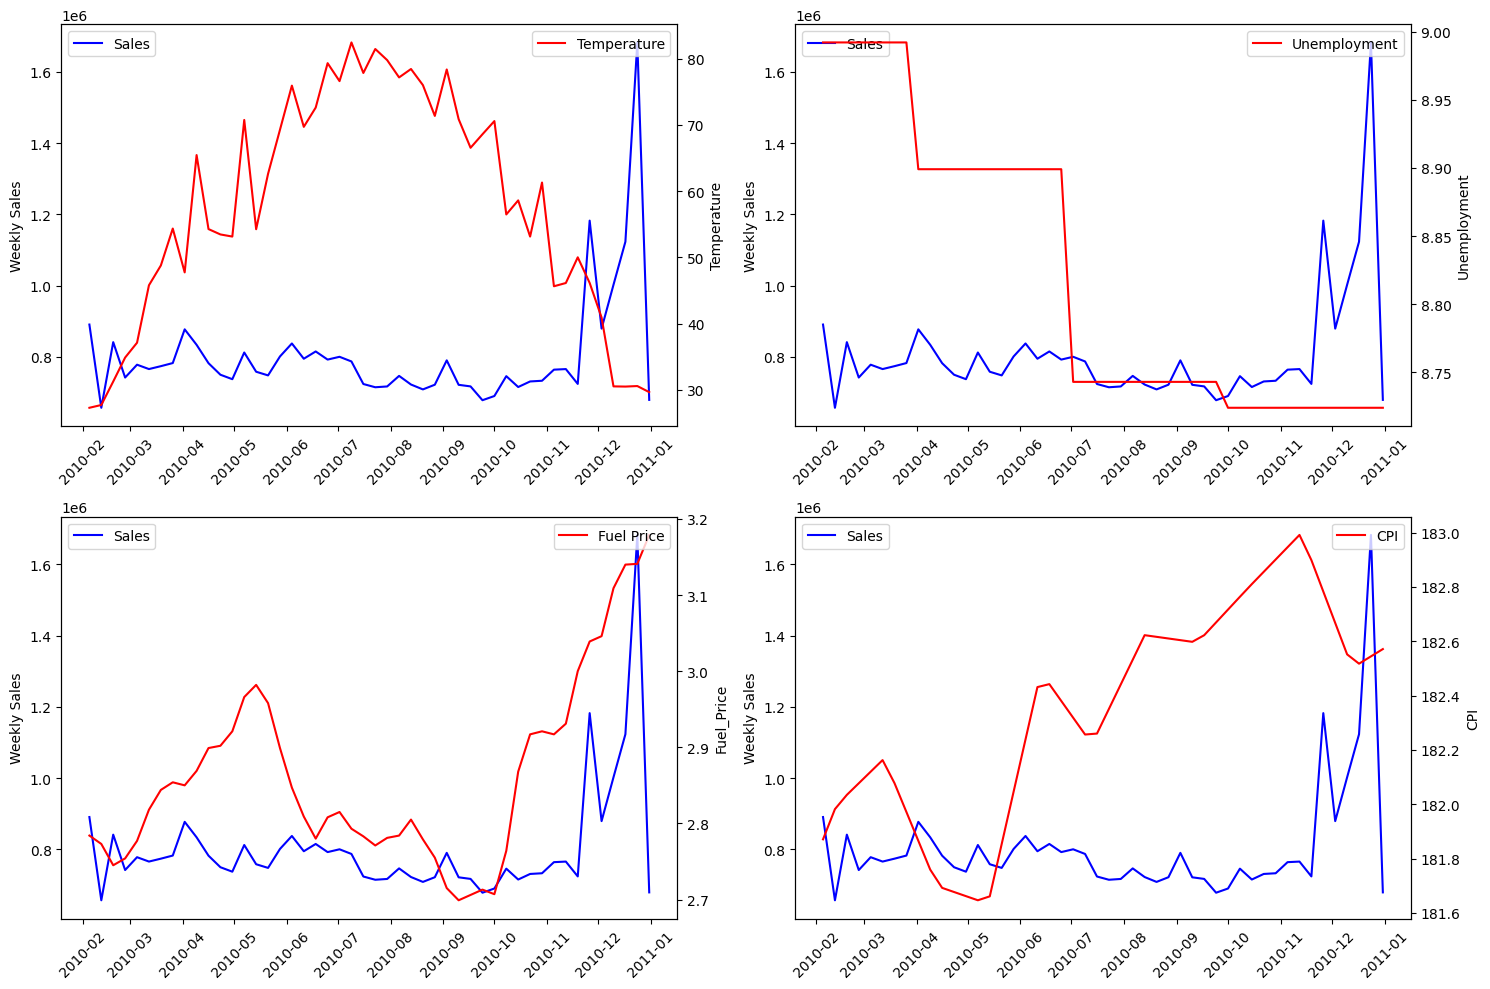

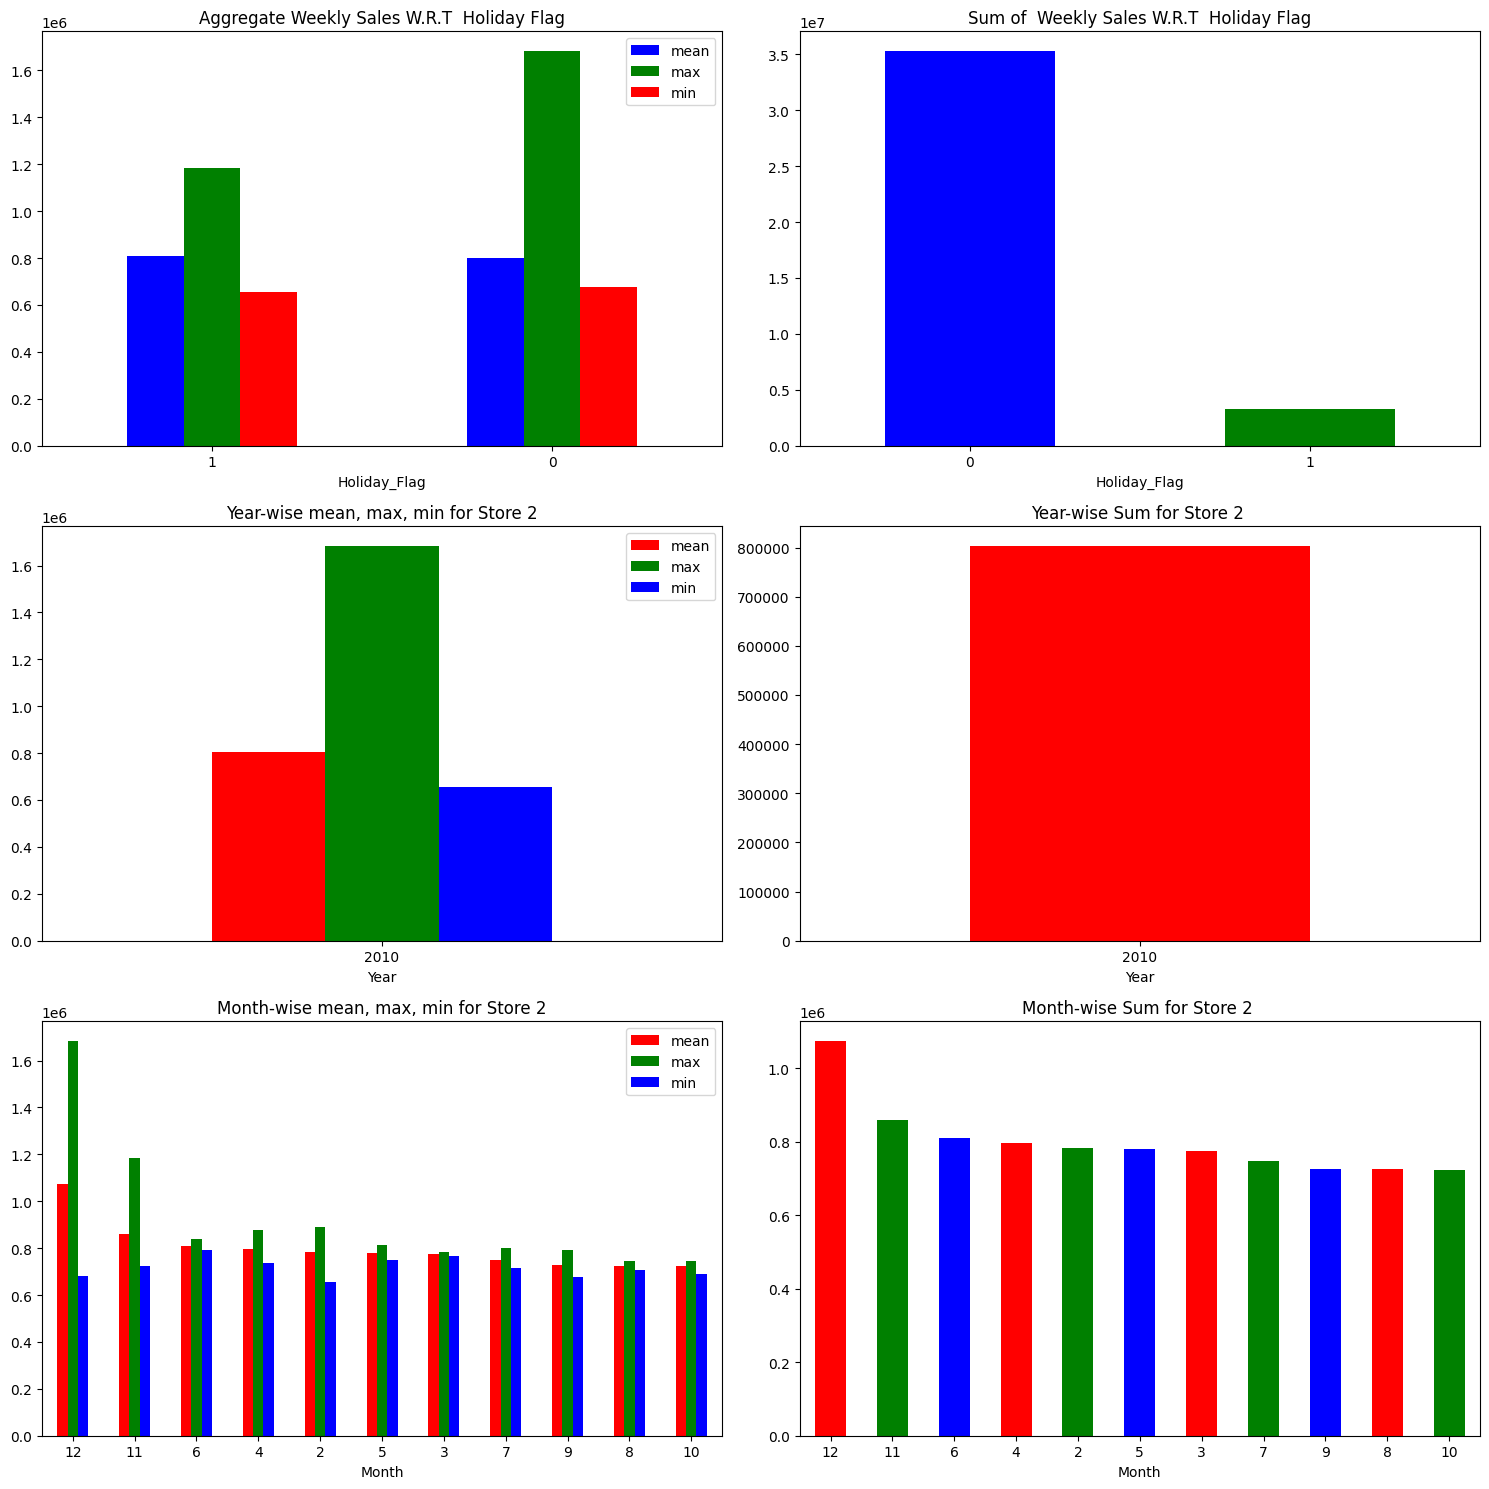

None
Features vs Weekly Sales plots for store 45 in the Year 2011
Features vs Weekly Sales plots for store 45
Aggregate Sales Plots for store 45 in the Year 2011


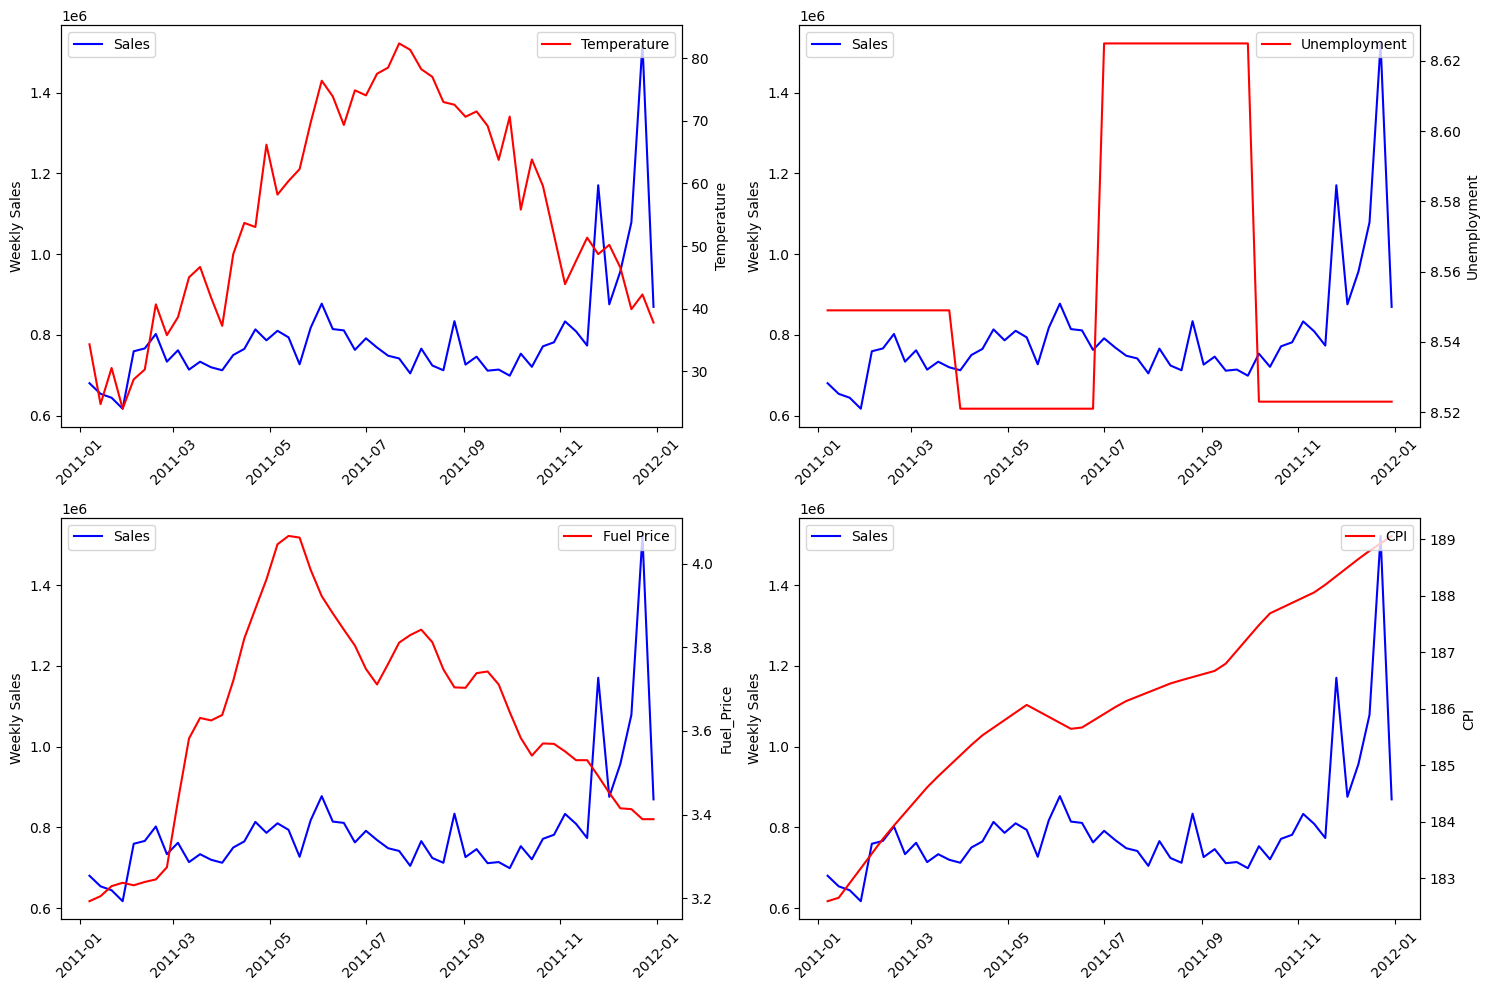

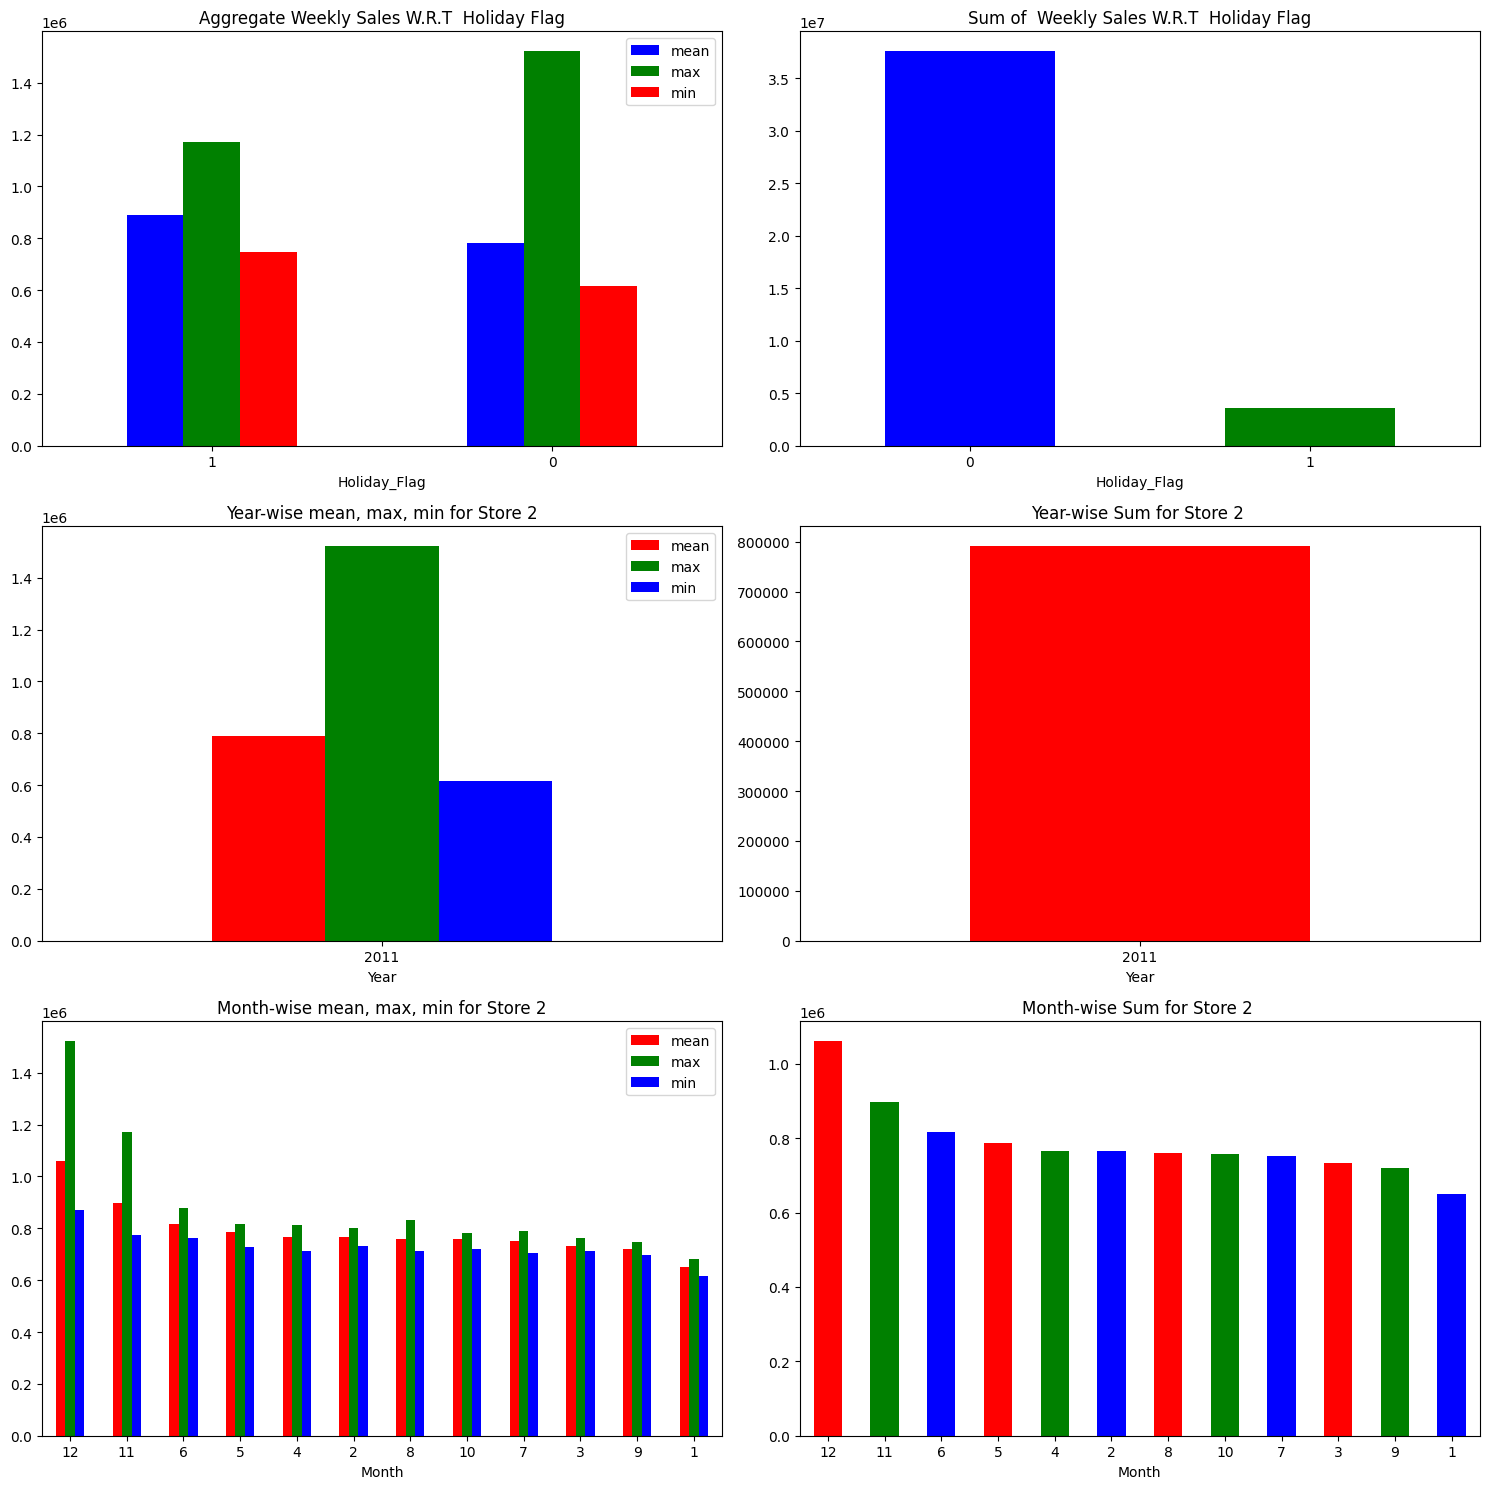

None
Features vs Weekly Sales plots for store 45 in the Year 2012
Features vs Weekly Sales plots for store 45
Aggregate Sales Plots for store 45 in the Year 2012


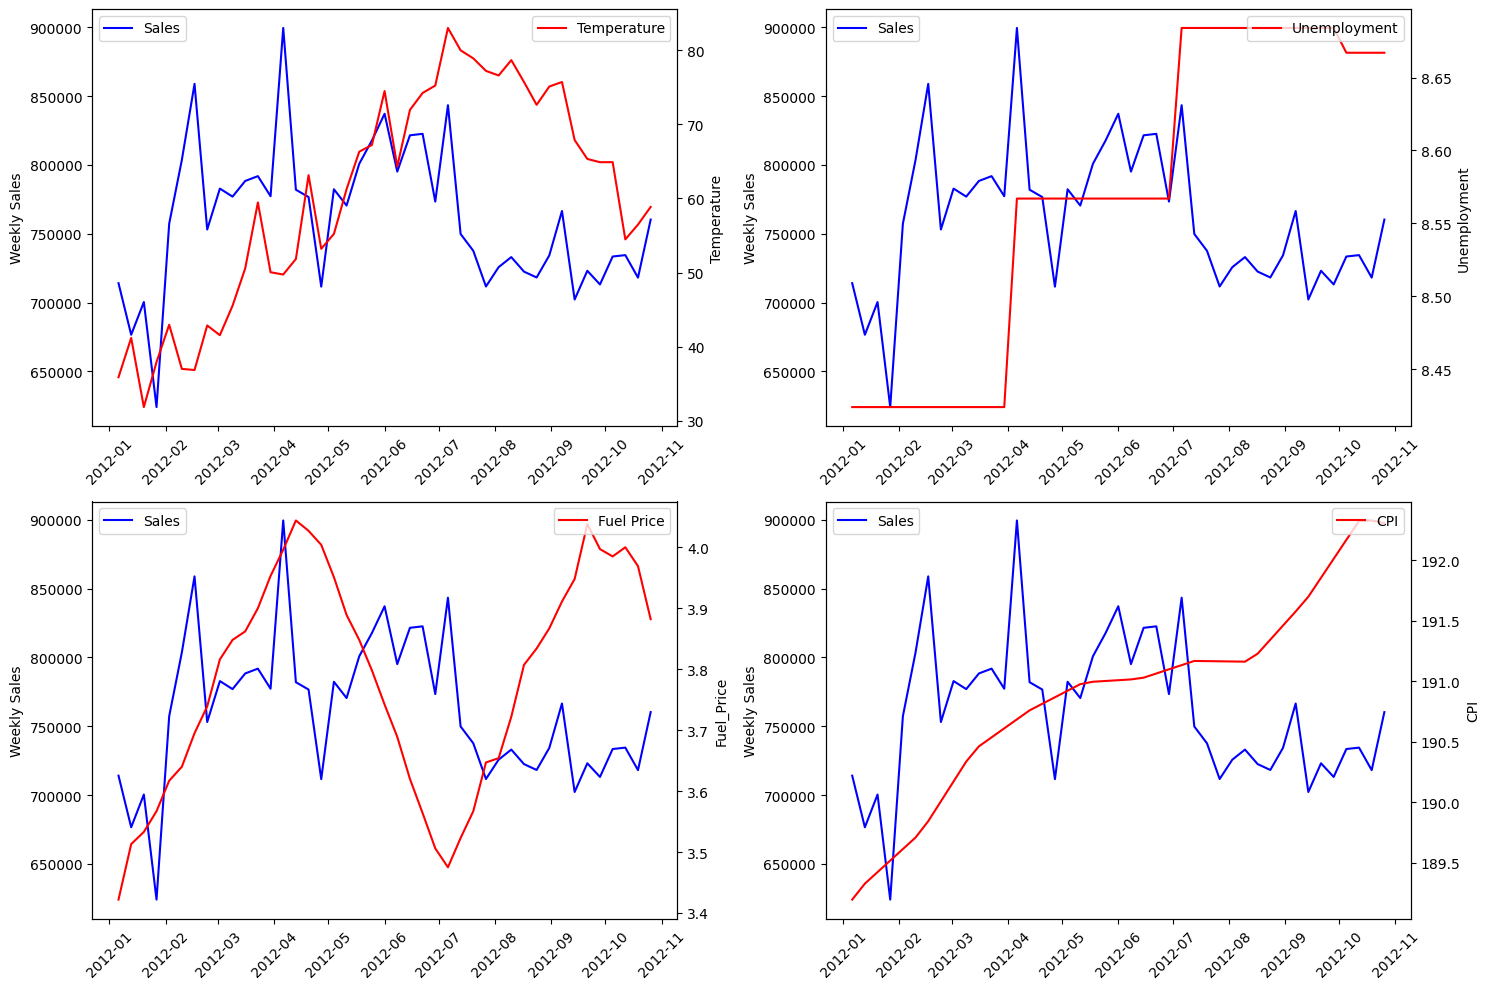

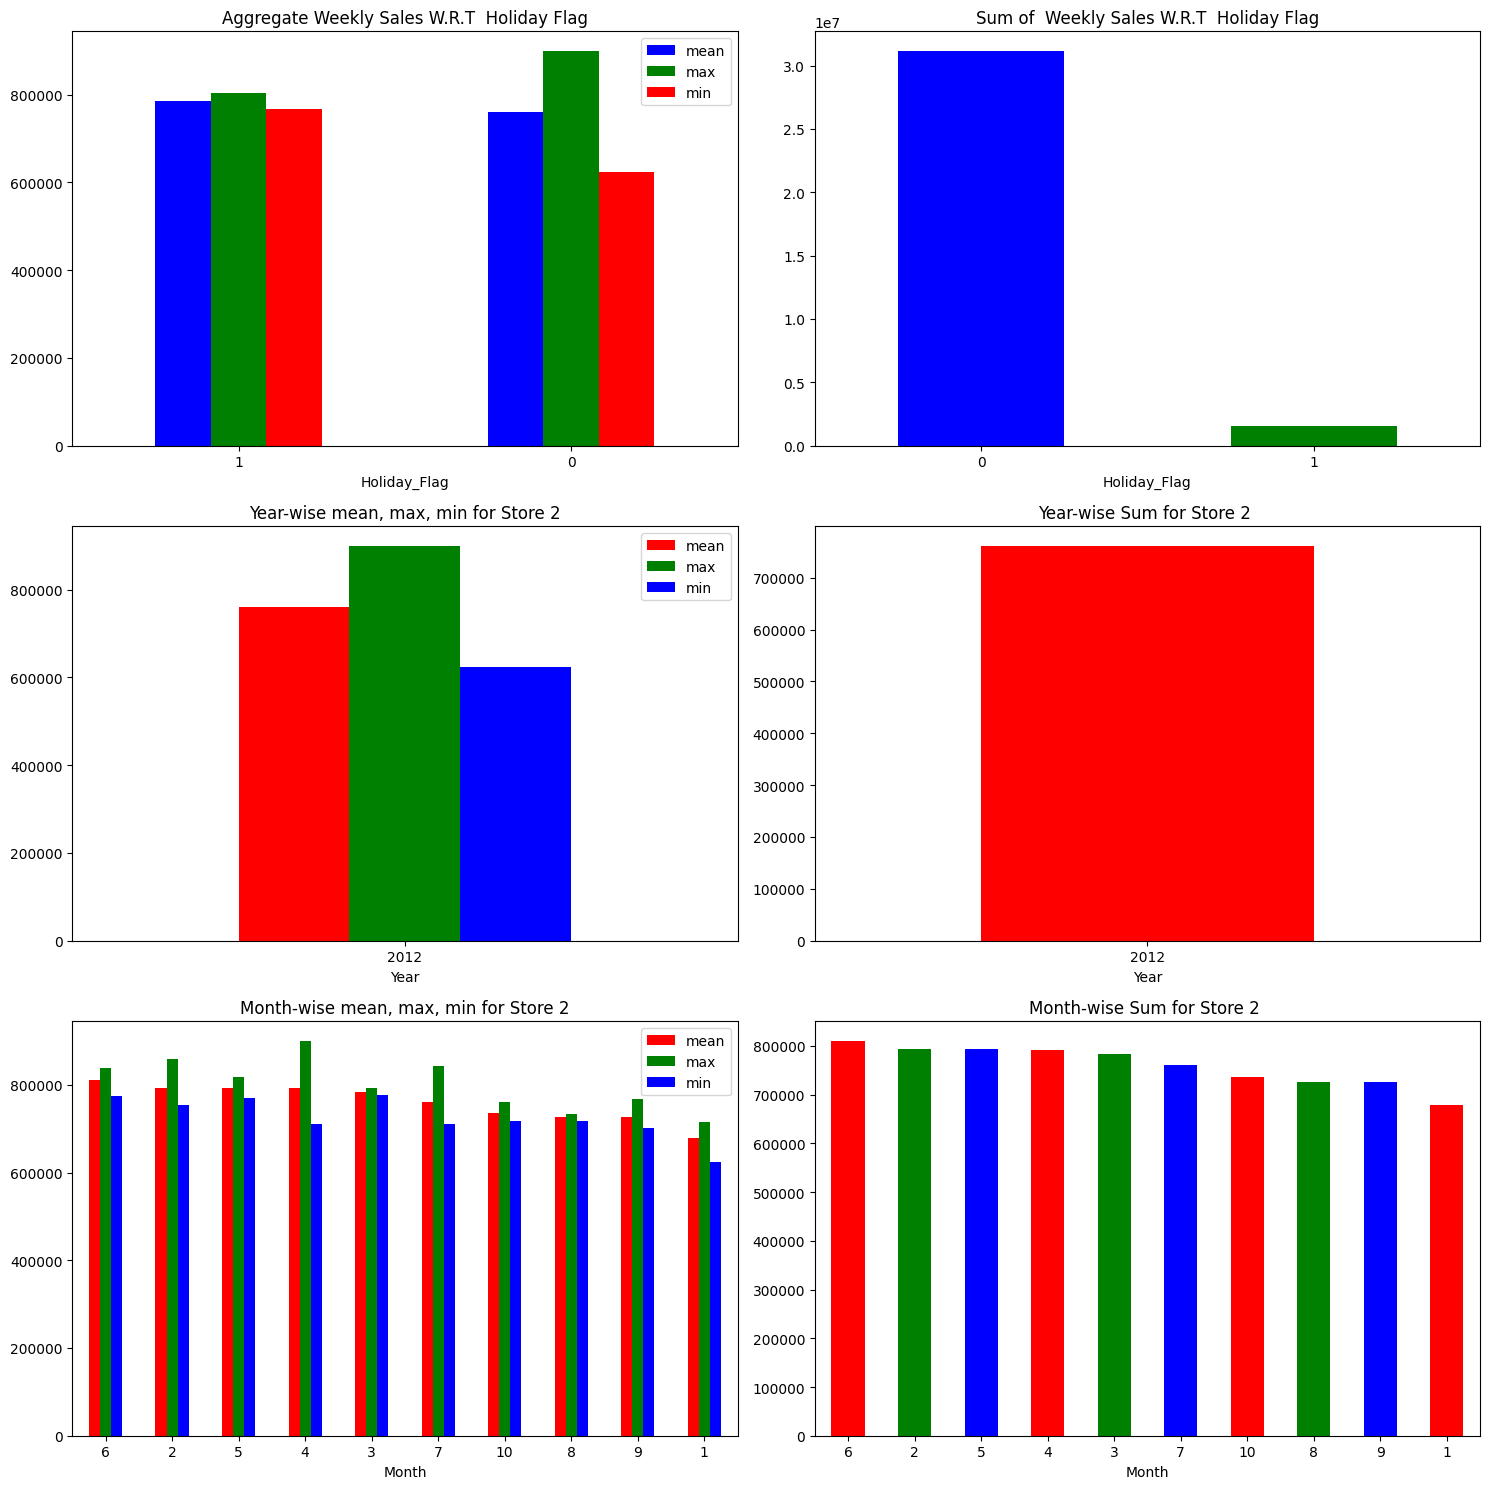

None


In [14]:
print(sales_plots.combined_plots_year_wise(store_number=45, year=2010))
print(sales_plots.combined_plots_year_wise(store_number=45, year=2011))
print(sales_plots.combined_plots_year_wise(store_number=45, year=2012))

#

# SALES ANALYSIS FOR STORE 24

Features vs Weekly Sales plots for store 24
Features vs Weekly Sales plots for store 24
Aggregate Sales Plots for store 24


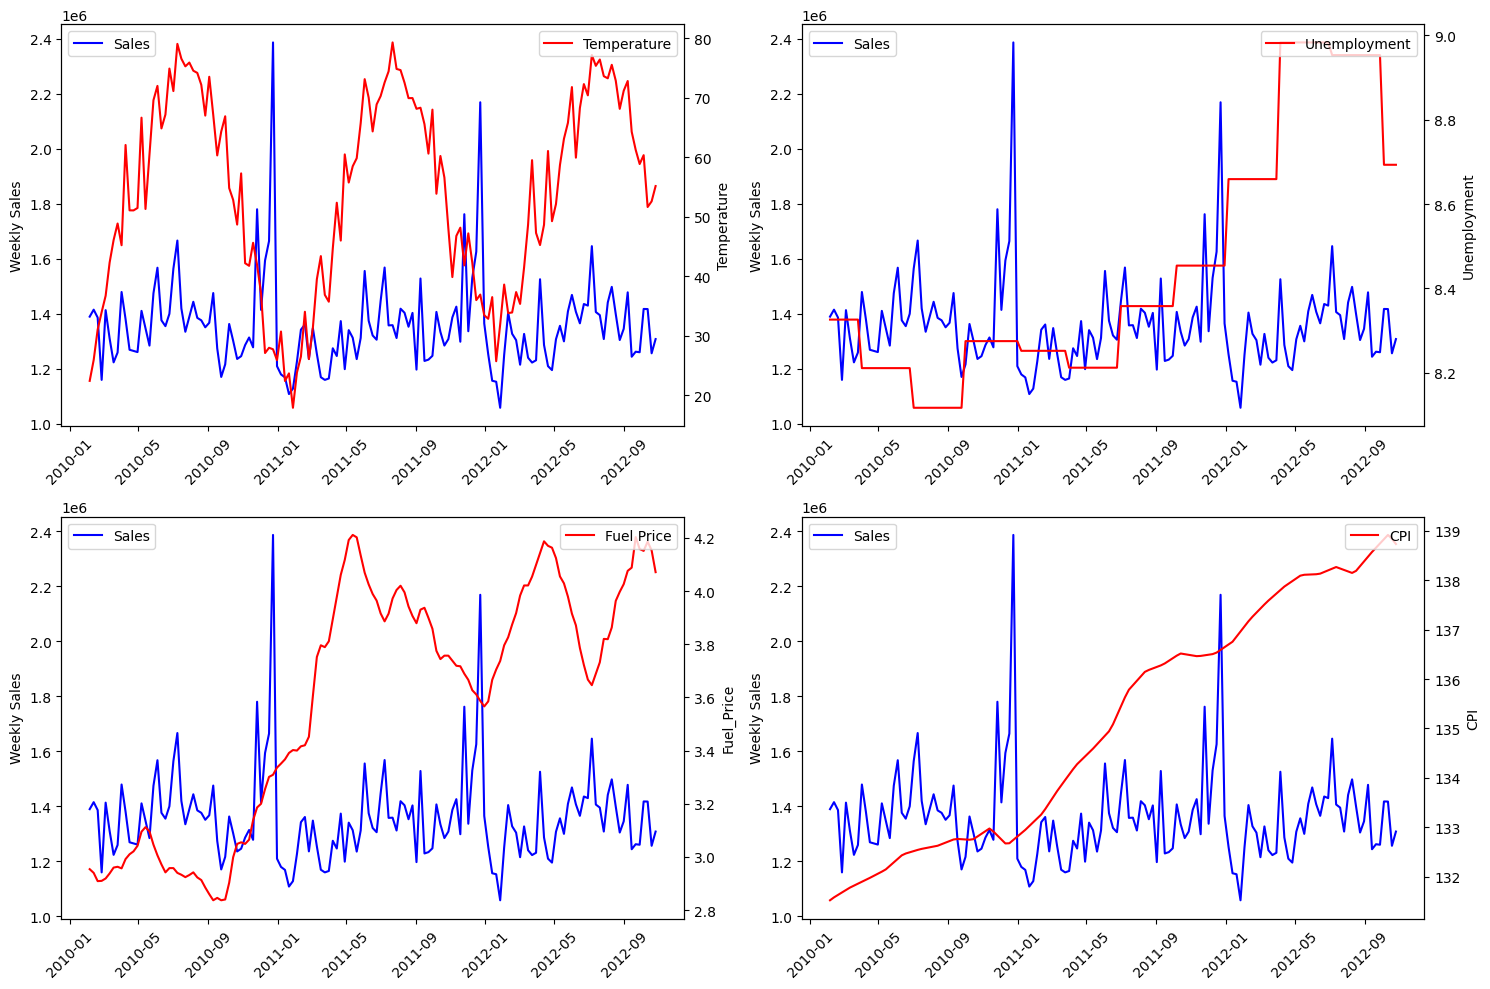

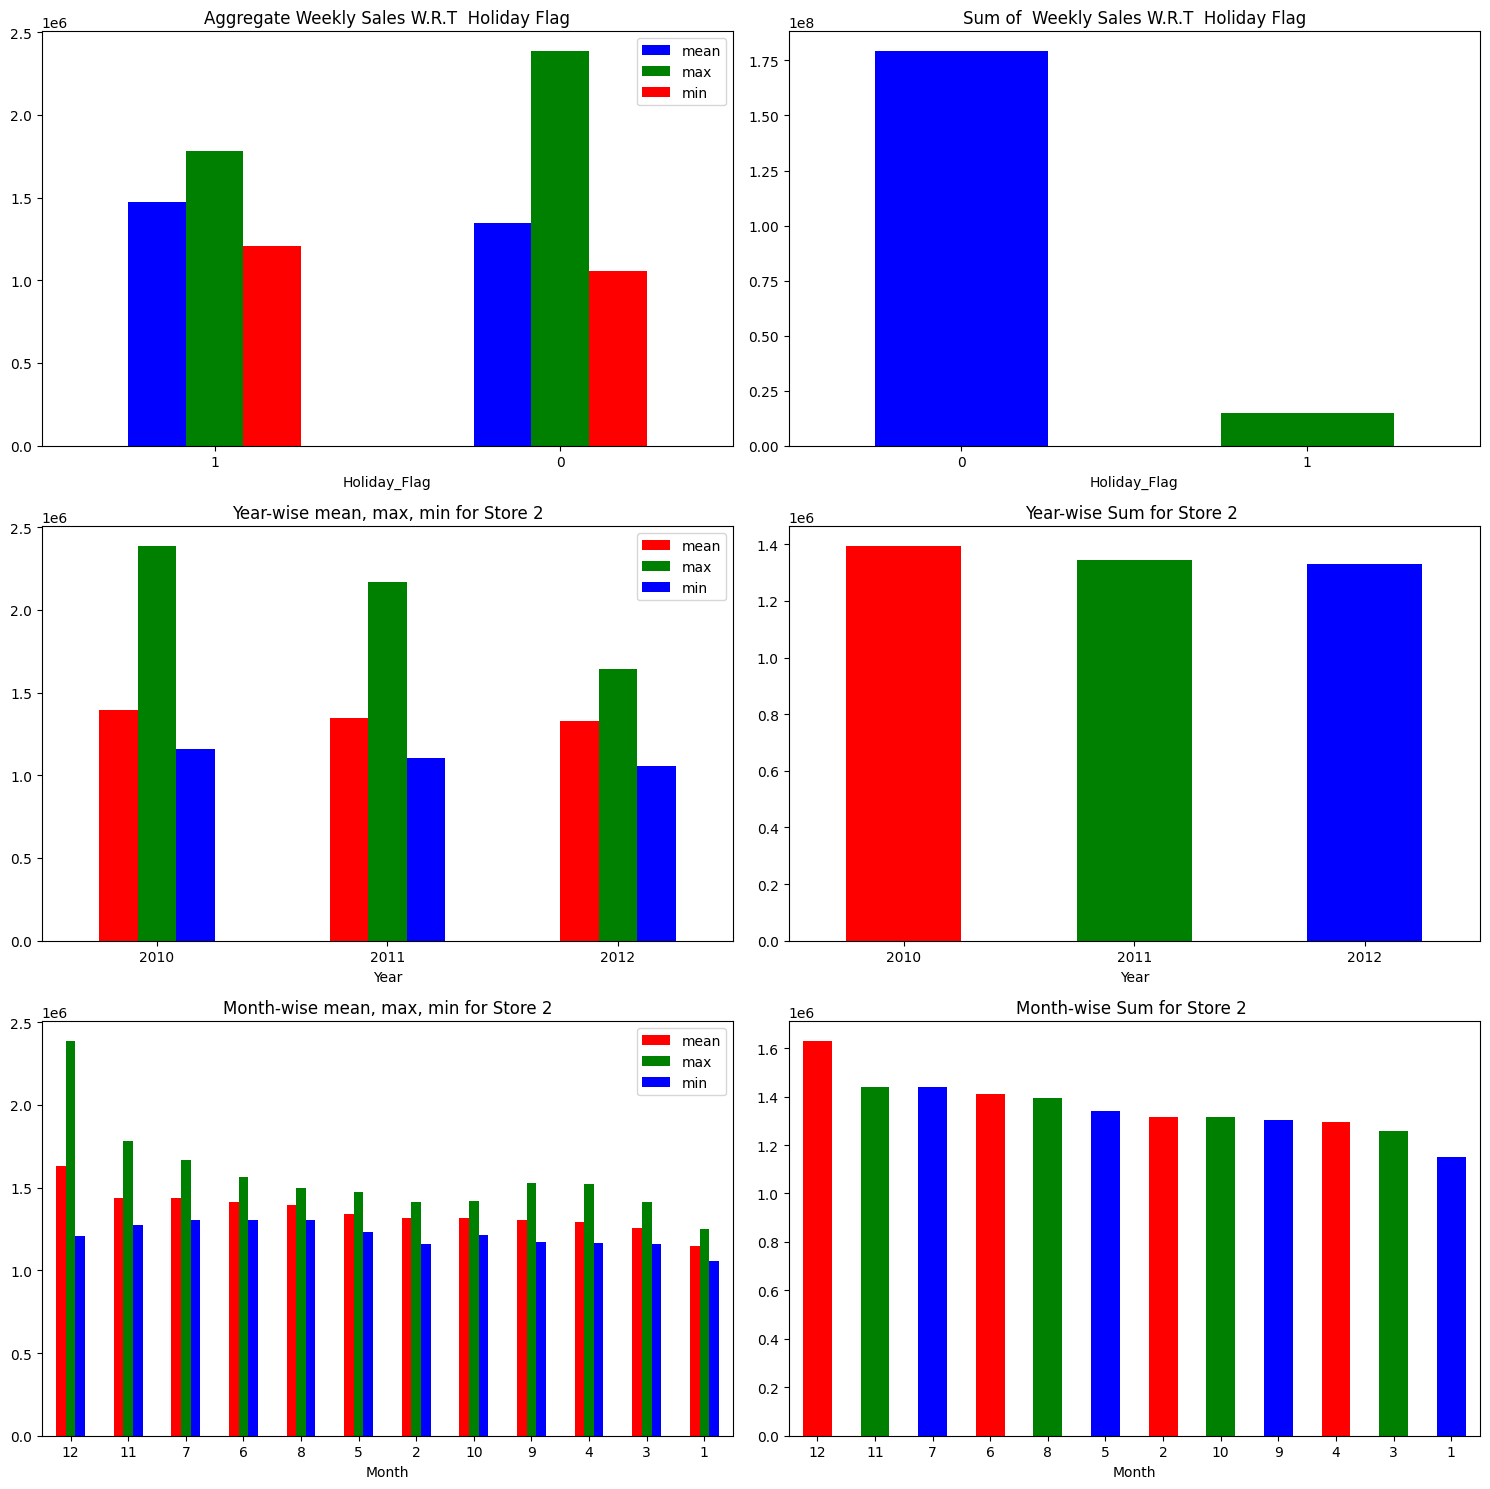

In [6]:
sales_plots.combined_plots(store_number=24)

Features vs Weekly Sales plots for store 24 in the Year 2010
Features vs Weekly Sales plots for store 24
Aggregate Sales Plots for store 24 in the Year 2010


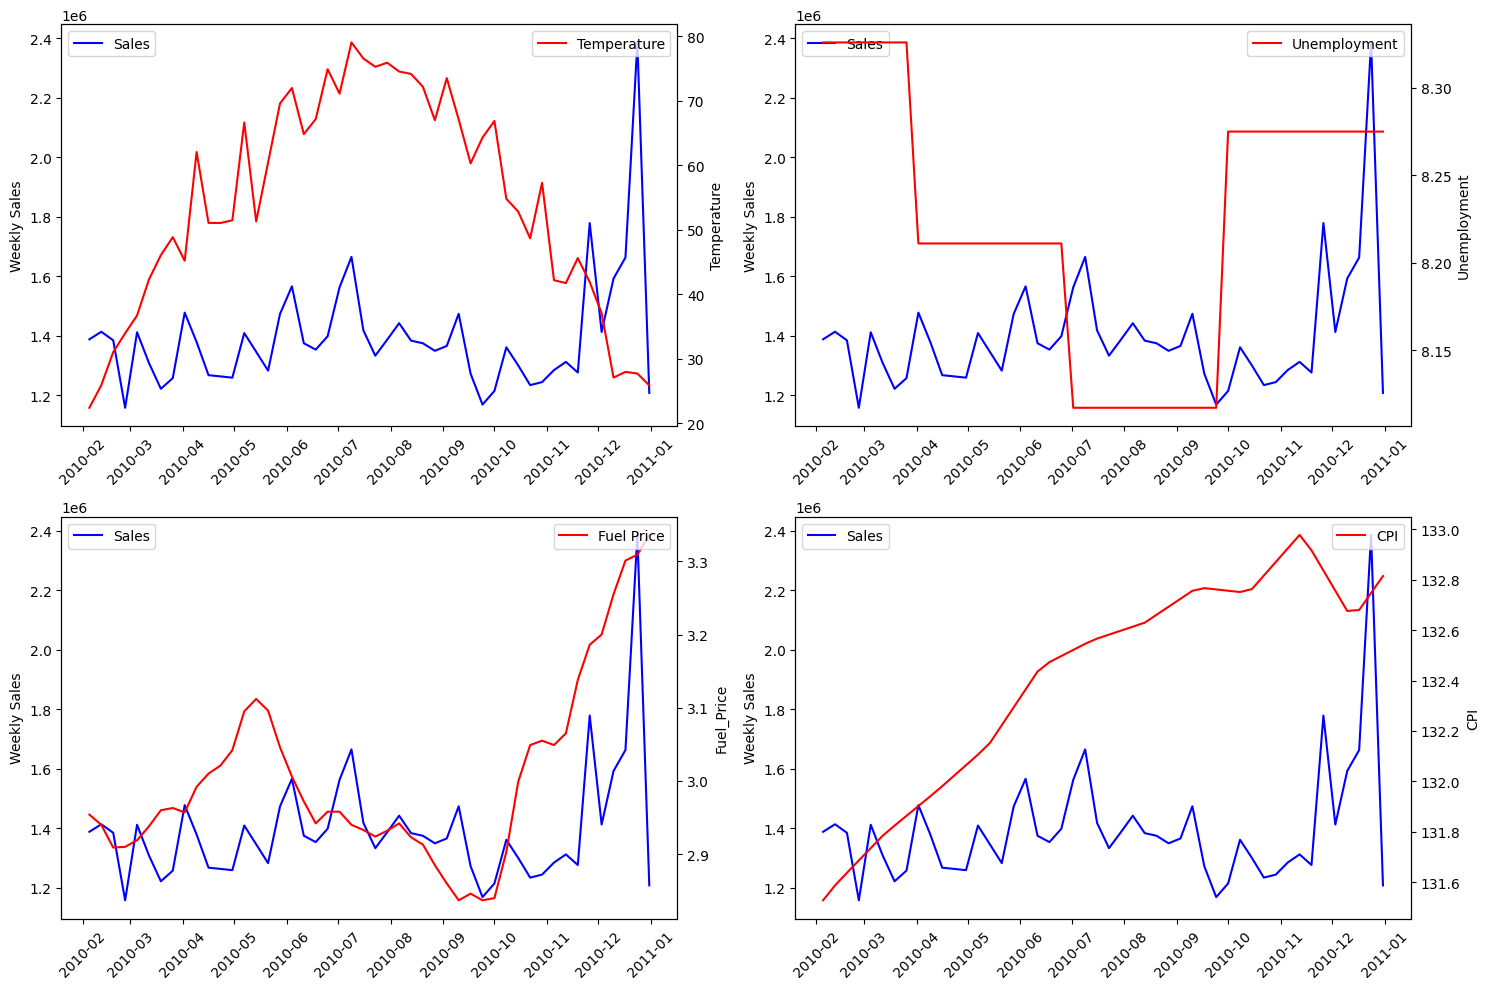

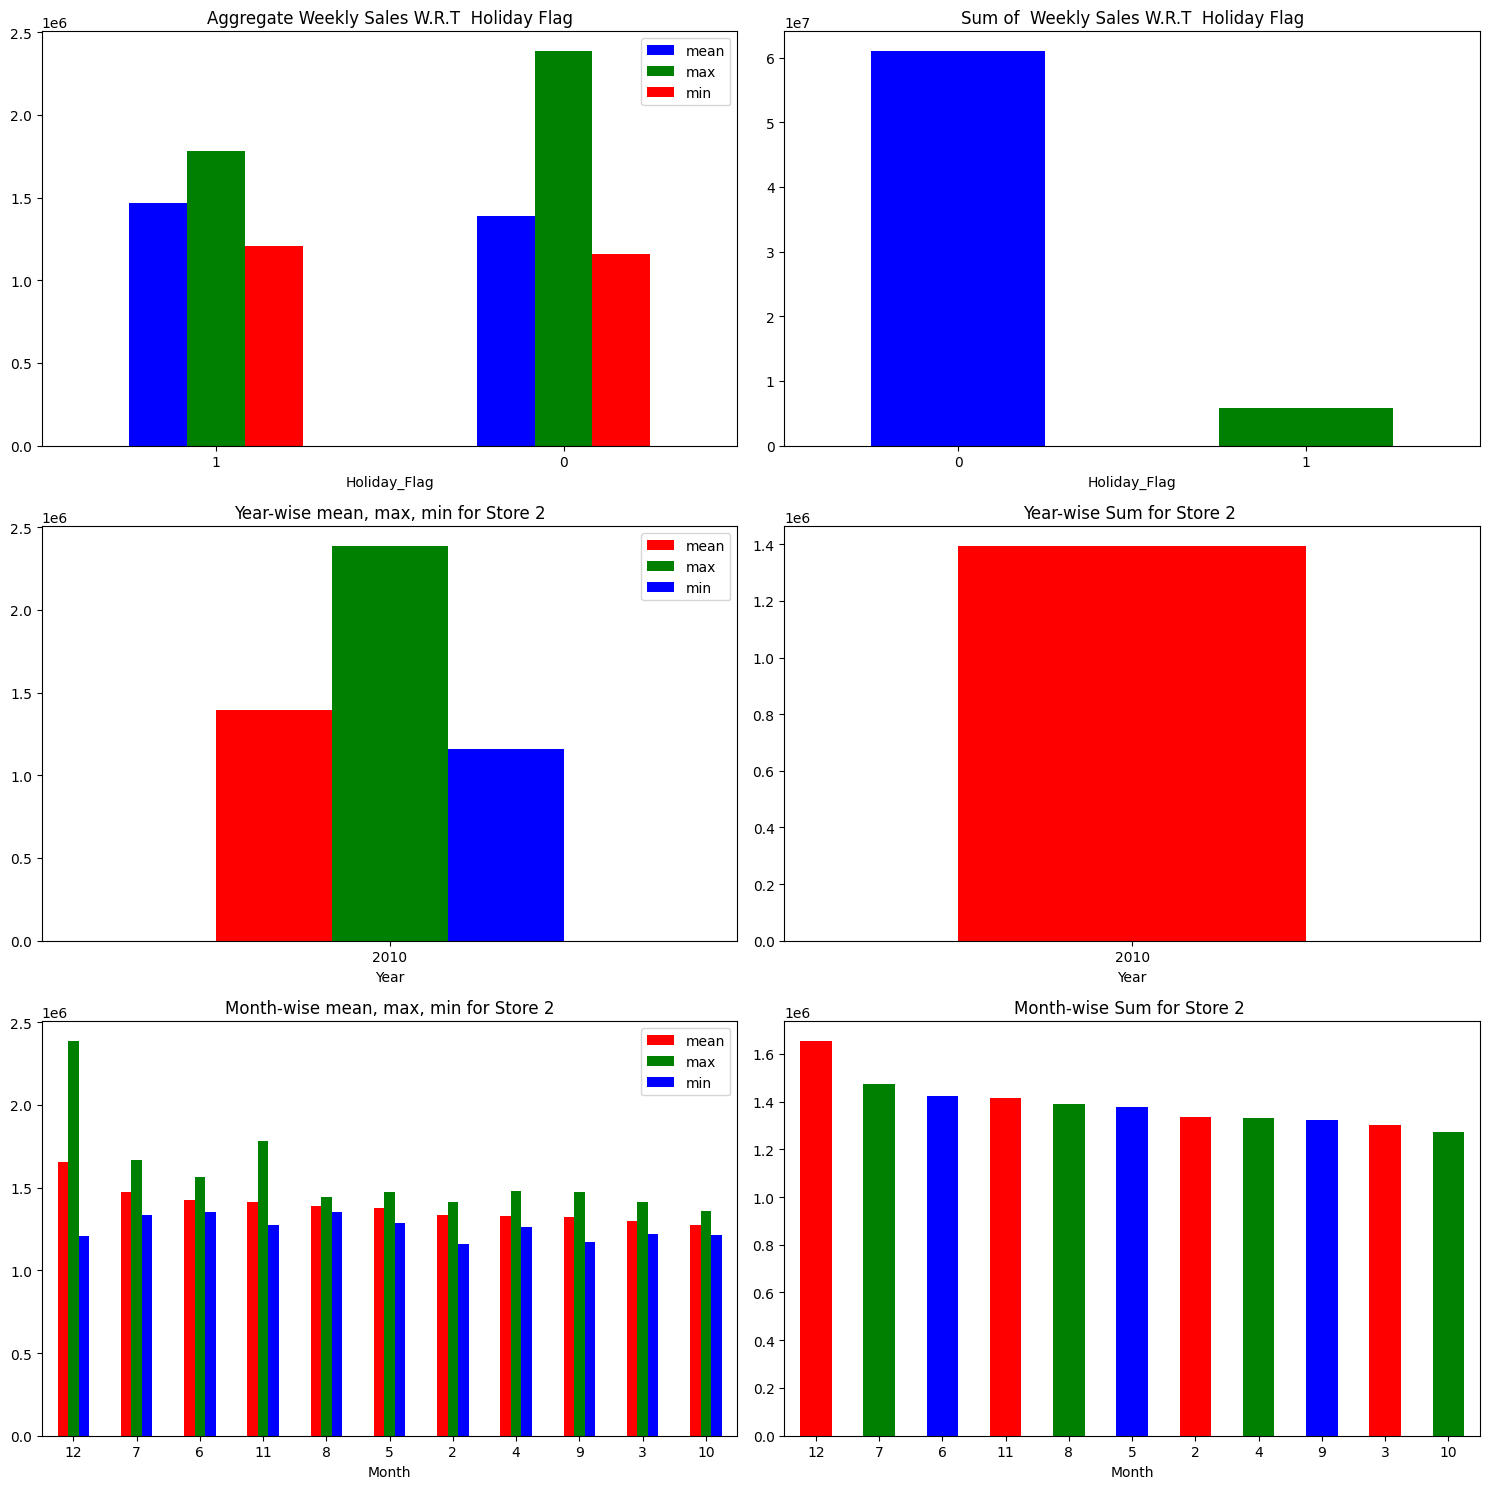

Features vs Weekly Sales plots for store 24 in the Year 2011
Features vs Weekly Sales plots for store 24
Aggregate Sales Plots for store 24 in the Year 2011


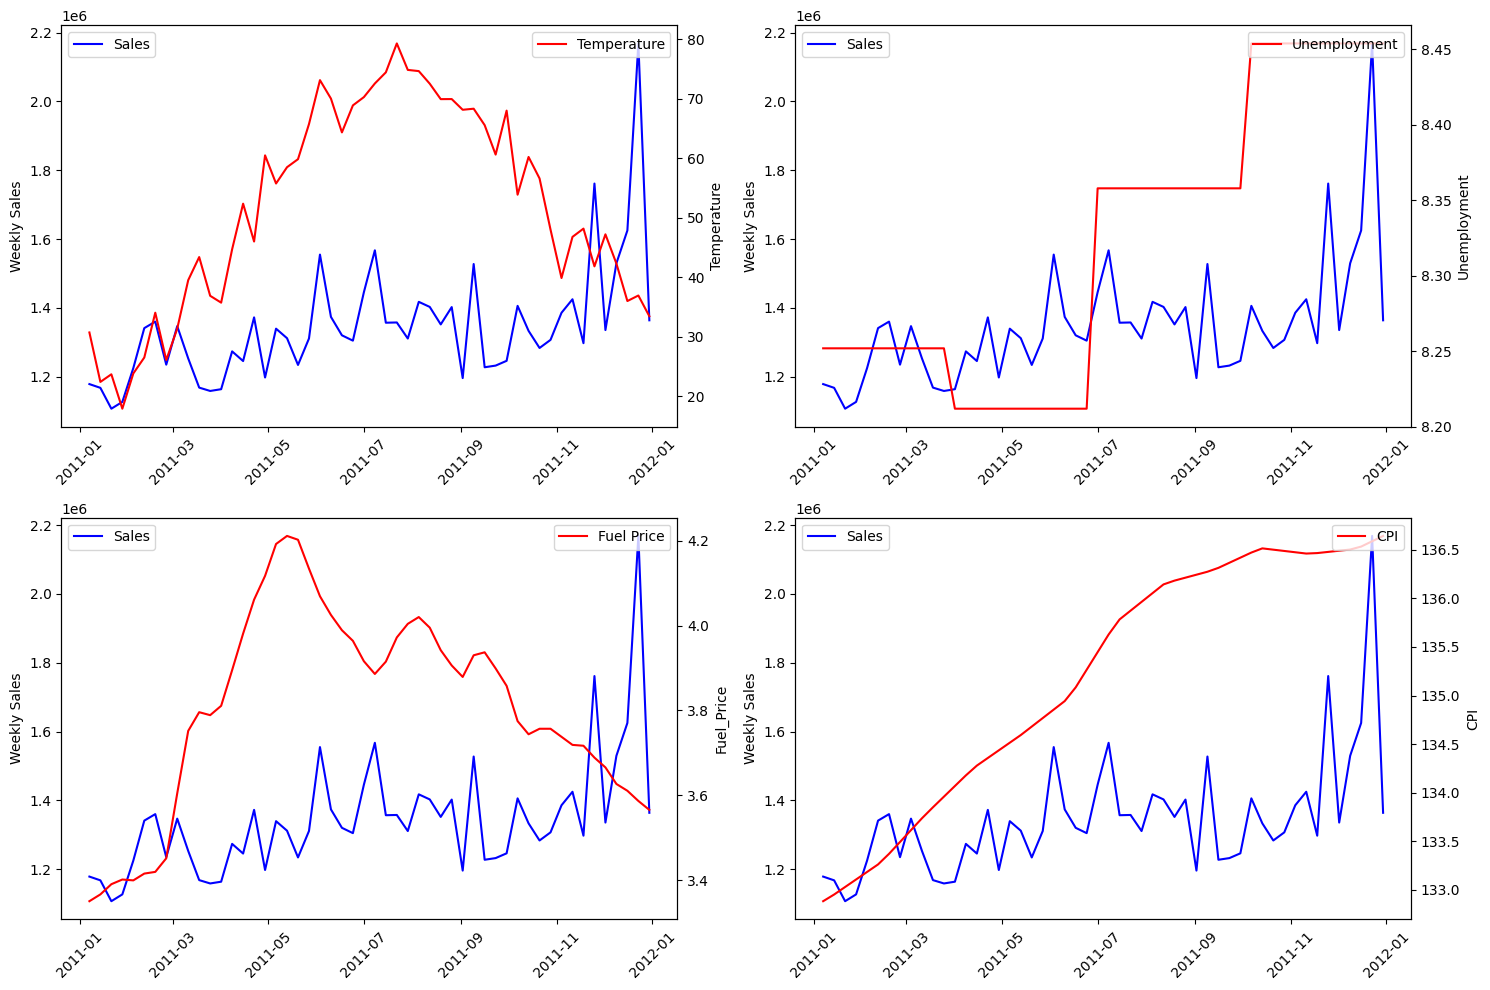

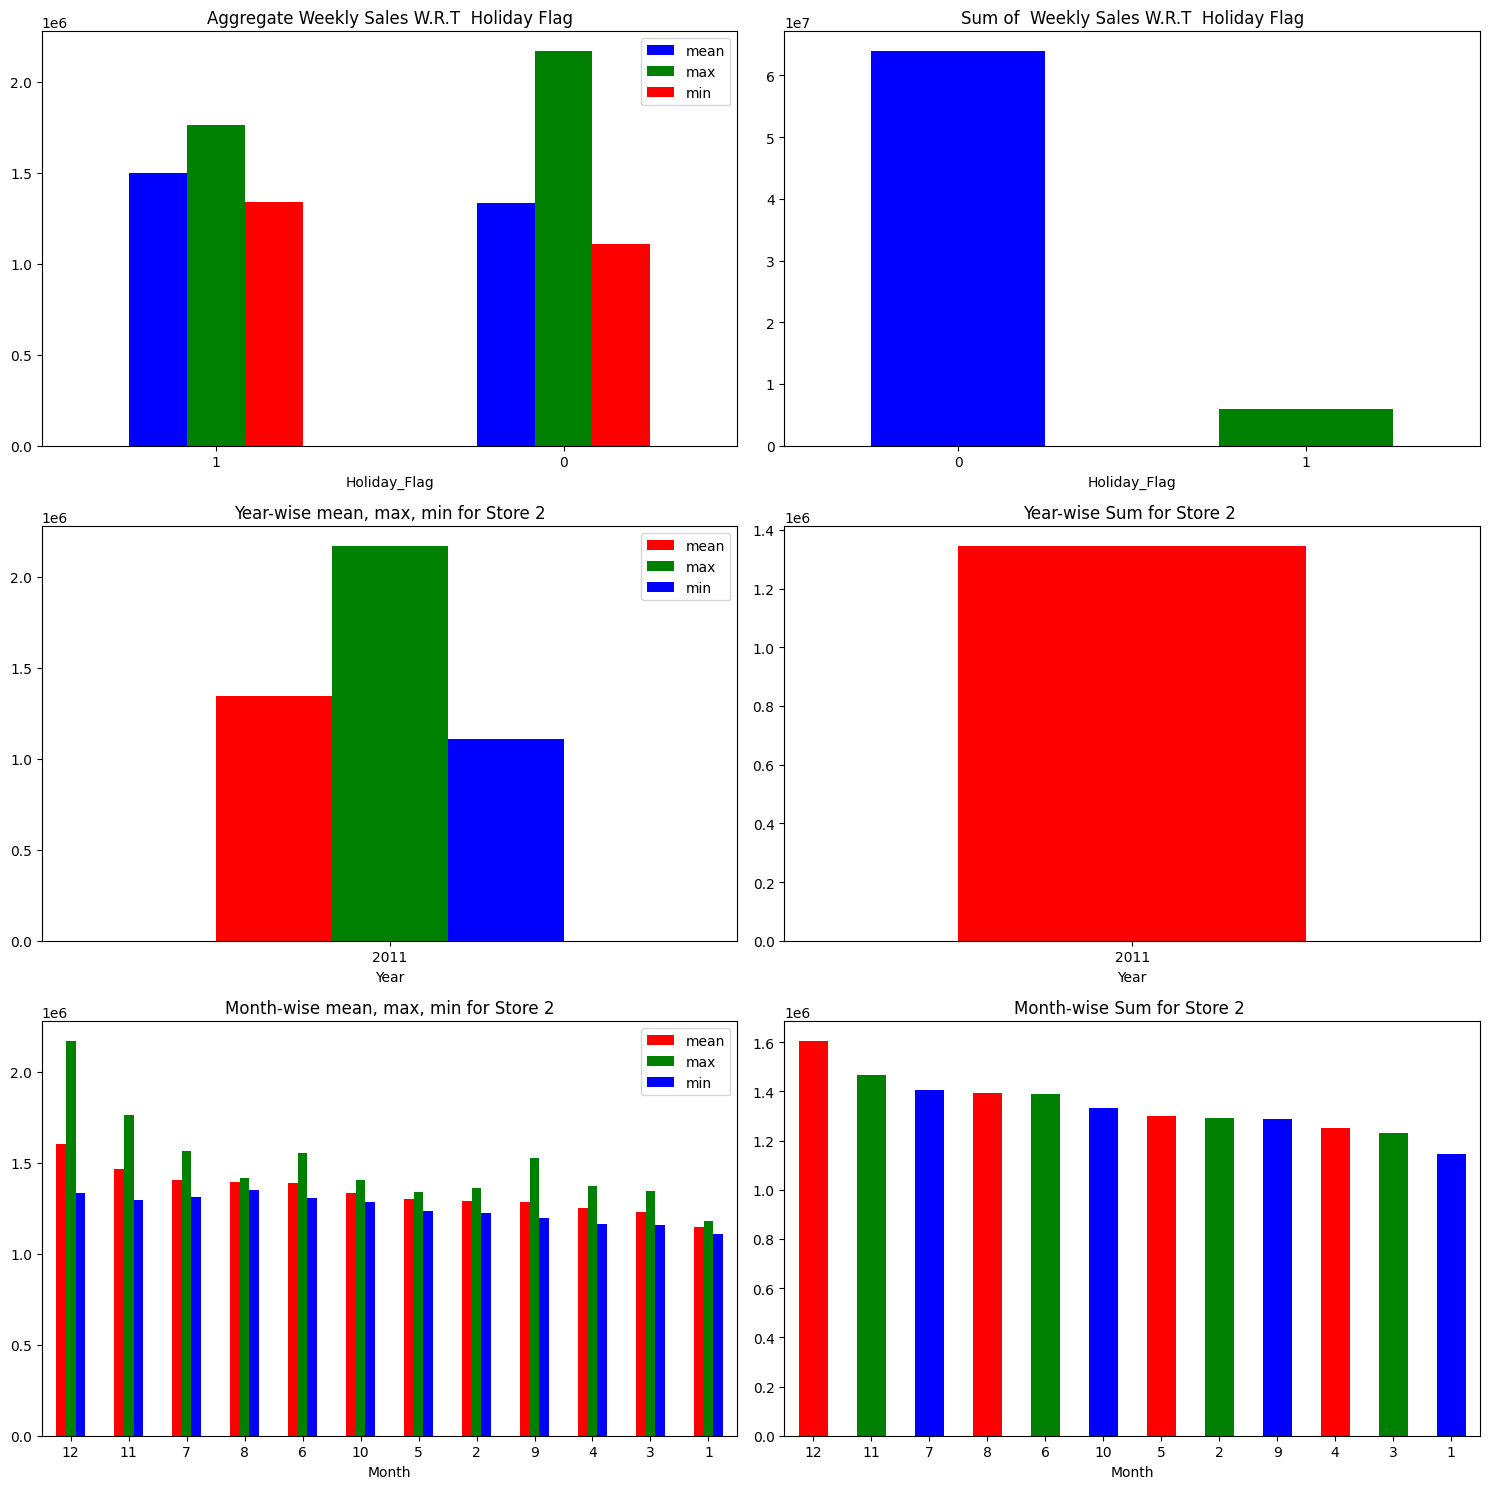

Features vs Weekly Sales plots for store 24 in the Year 2012
Features vs Weekly Sales plots for store 24
Aggregate Sales Plots for store 24 in the Year 2012


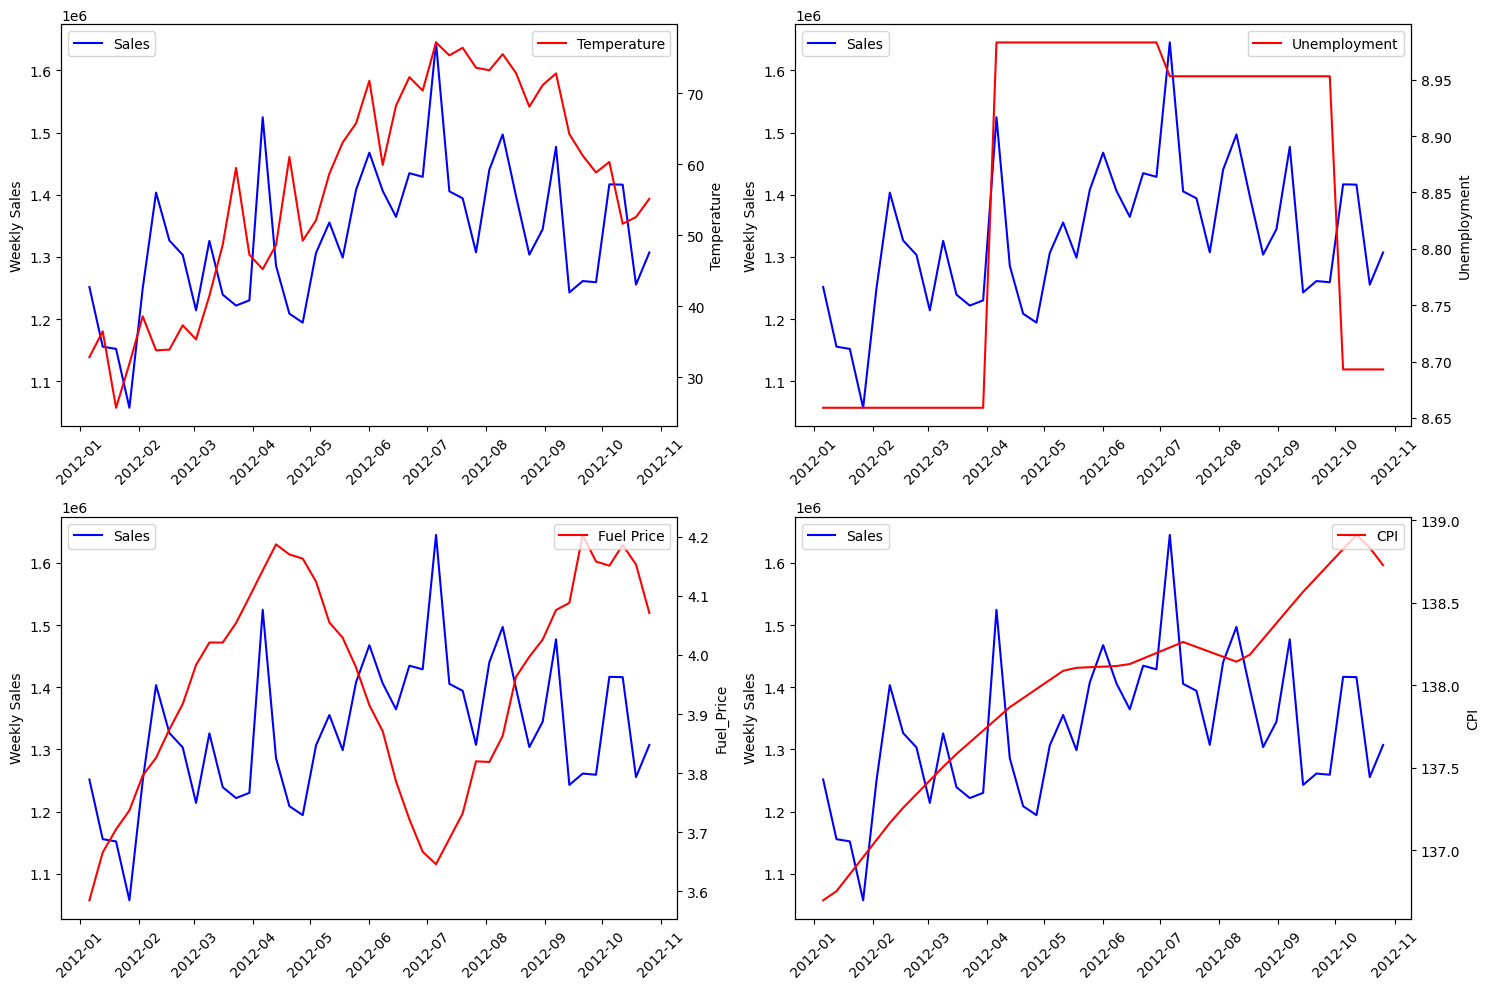

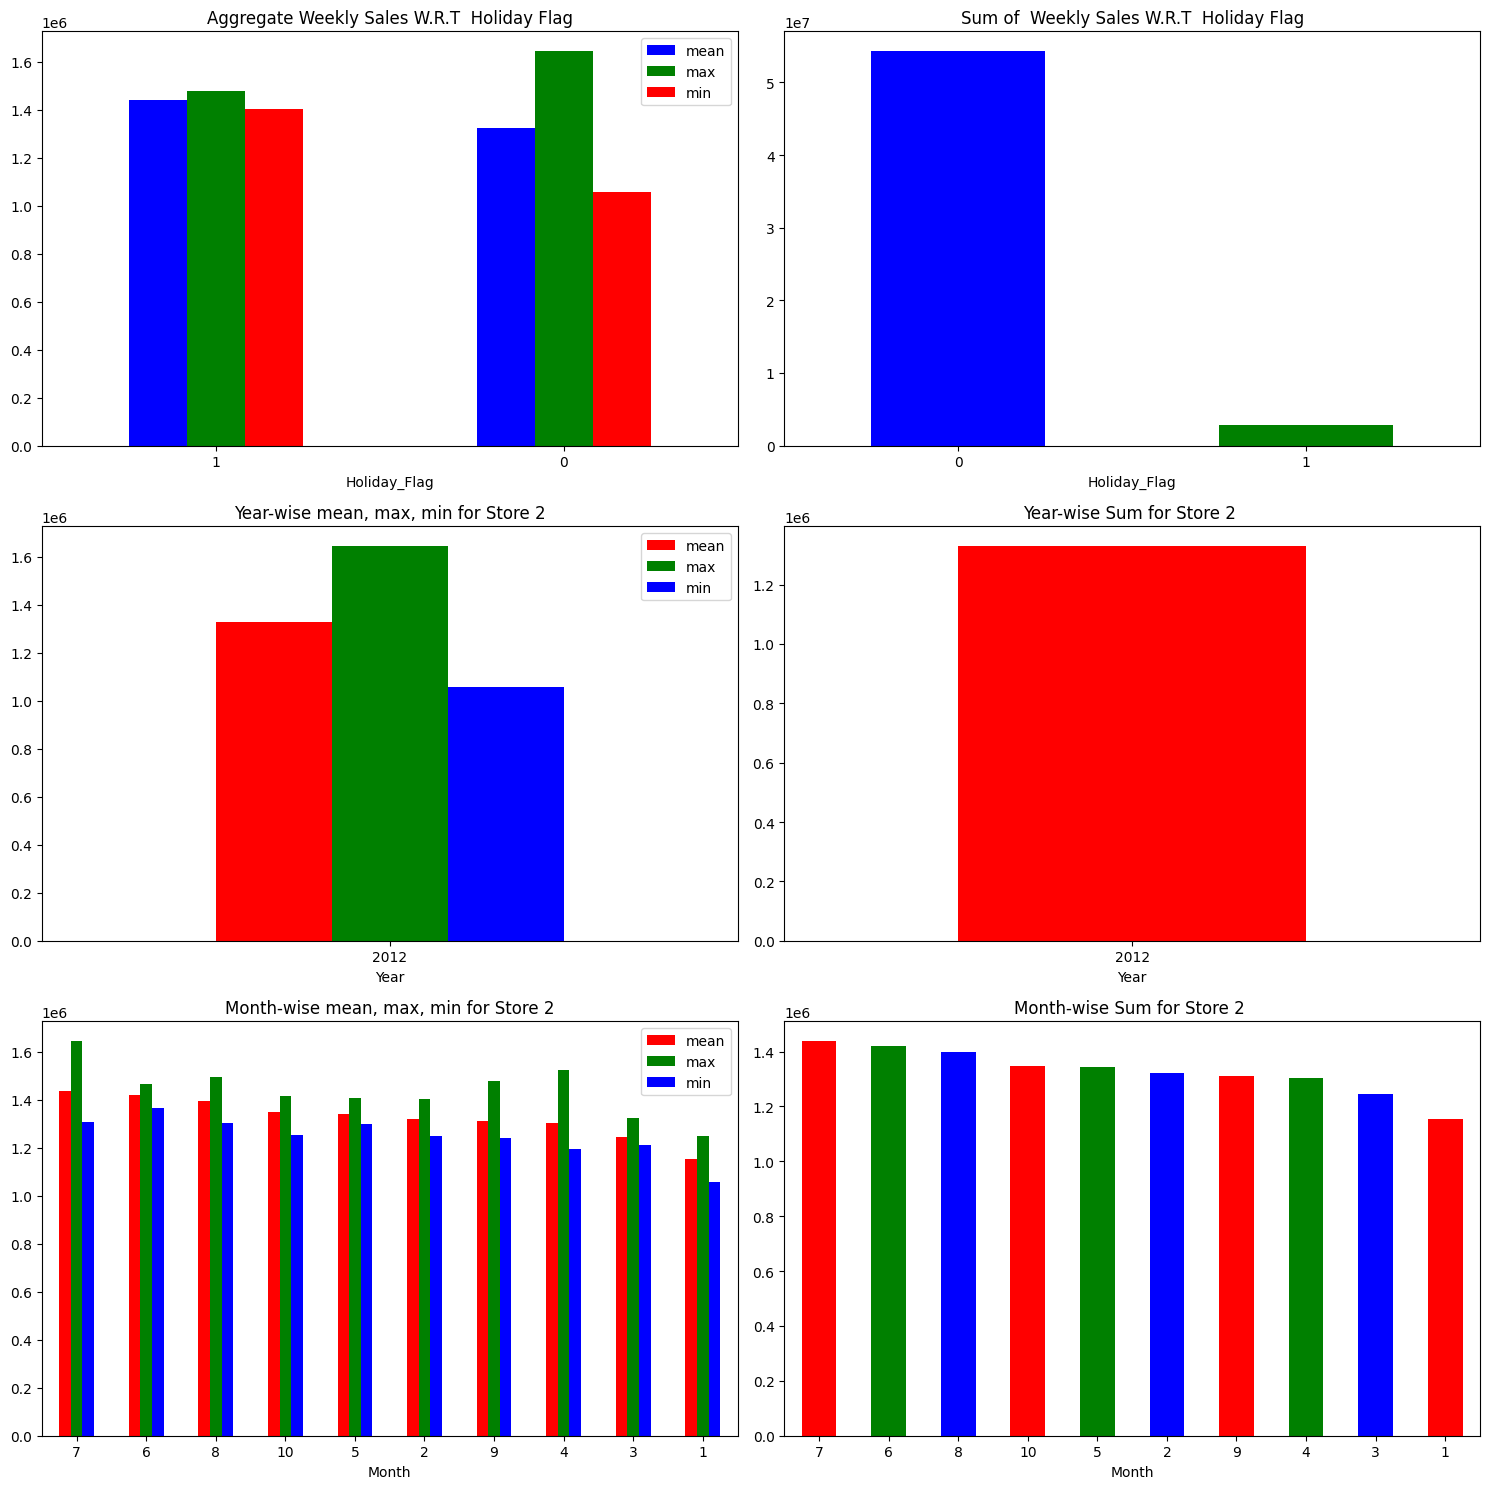

In [7]:
sales_plots.combined_plots_year_wise(store_number=24, year=2010)
sales_plots.combined_plots_year_wise(store_number=24, year=2011)
sales_plots.combined_plots_year_wise(store_number=24, year=2012)

# AGGREGATE AND FEATURE LINE PLOTS FOR ALL THE STORES

In [2]:
df = pd.read_pickle('../Walmart Sales Analysis and Forecasting/data/processed/walmart.pkl')
sales_plots = SalesPlots(df)

In [ ]:
for i in df['Store'].unique():
    sales_plots.feature_sales_plot(store_number=i)
    plt.savefig('../Walmart Sales Analysis and Forecasting/reports/figures/feature_sales_plots_store_'+str(i)+'.png')
    sales_plots.aggregate_sales_plot(store_number=i)
    plt.savefig('../Walmart Sales Analysis and Forecasting/reports/figures/aggregate_sales_plots_store_'+str(i)+'.png')

# Correlation Plots

In [2]:
#df = pd.read_pickle('../Walmart Sales Analysis and Forecasting/data/processed/walmart.pkl')
df.head()

Store  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
Date                                                                     
2010-02-05      1    1643690.90             0        42.31       2.572   
2010-02-12      1    1641957.44             1        38.51       2.548   
2010-02-19      1    1611968.17             0        39.93       2.514   
2010-02-26      1    1409727.59             0        46.63       2.561   
2010-03-05      1    1554806.68             0        46.50       2.625   

                   CPI  Unemployment  
Date                                  
2010-02-05  211.096358         8.106  
2010-02-12  211.242170         8.106  
2010-02-19  211.289143         8.106  
2010-02-26  211.319643         8.106  
2010-03-05  211.350143         8.106

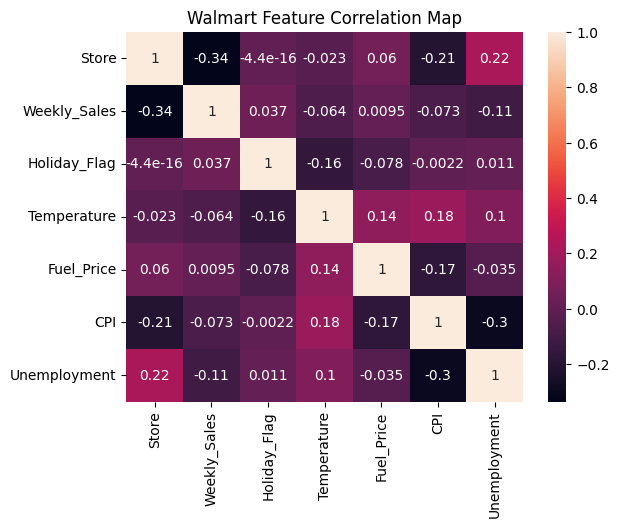

In [5]:
sns.heatmap(df.corr(), annot=True)
plt.title('Walmart Feature Correlation Map')

plt.savefig('../Walmart Sales Analysis and Forecasting/reports/figures/Feature_correlation_map.png')
plt.show()

# OVER ALL STORE ANALYSIS 

## TOP 15 PERFORMING STORES ACCORDING TO AGGREGATE TOTAL SALES


In [10]:
top_15_stores = df.groupby(['Store'])['Weekly_Sales'].agg(['sum','mean']).sort_values(by='mean', ascending=False).head(15)
top_15_stores

sum          mean
Store                            
20     3.013978e+08  2.107677e+06
4      2.995440e+08  2.094713e+06
14     2.889999e+08  2.020978e+06
13     2.865177e+08  2.003620e+06
2      2.753824e+08  1.925751e+06
10     2.716177e+08  1.899425e+06
27     2.538559e+08  1.775216e+06
6      2.237561e+08  1.564728e+06
1      2.224028e+08  1.555264e+06
39     2.074455e+08  1.450668e+06
19     2.066349e+08  1.444999e+06
31     1.996139e+08  1.395901e+06
23     1.987506e+08  1.389864e+06
24     1.940160e+08  1.356755e+06
11     1.939628e+08  1.356383e+06

## TOP 15 PERFORMING STORES ACCORDING TO TOTAL SALES IN EACH YEAR

In [18]:
#--------------------------------------------------------------------------------------------
# TOP 15 PERFORMING STORES ACCORDING TO TOTAL SALES IN 2010
#--------------------------------------------------------------------------------------------

df_10 = df[df.index.year == 2010]
top_15_2010 = df_10.groupby(['Store'])['Weekly_Sales'].agg(['sum','mean']).sort_values(by='mean', ascending=False).head(15)
top_15_2010

sum          mean
Store                            
14     1.054622e+08  2.197130e+06
20     1.017331e+08  2.119439e+06
4      9.568047e+07  1.993343e+06
2      9.527786e+07  1.984956e+06
13     9.527274e+07  1.984849e+06
10     9.447220e+07  1.968171e+06
27     9.001318e+07  1.875275e+06
6      7.691232e+07  1.602340e+06
1      7.327883e+07  1.526642e+06
19     7.258053e+07  1.512094e+06
23     6.770911e+07  1.410606e+06
24     6.689065e+07  1.393555e+06
39     6.578228e+07  1.370464e+06
31     6.556027e+07  1.365839e+06
11     6.525514e+07  1.359482e+06

In [19]:
#--------------------------------------------------------------------------------------------
# TOP 15 PERFORMING STORES ACCORDING TO TOTAL SALES IN 2011
#--------------------------------------------------------------------------------------------

df_11 = df[df.index.year == 2011]
top_15_2011 = df_10.groupby(['Store'])['Weekly_Sales'].agg(['sum','mean']).sort_values(by='mean', ascending=False).head(15)
top_15_2010

sum          mean
Store                            
14     1.054622e+08  2.197130e+06
20     1.017331e+08  2.119439e+06
4      9.568047e+07  1.993343e+06
2      9.527786e+07  1.984956e+06
13     9.527274e+07  1.984849e+06
10     9.447220e+07  1.968171e+06
27     9.001318e+07  1.875275e+06
6      7.691232e+07  1.602340e+06
1      7.327883e+07  1.526642e+06
19     7.258053e+07  1.512094e+06
23     6.770911e+07  1.410606e+06
24     6.689065e+07  1.393555e+06
39     6.578228e+07  1.370464e+06
31     6.556027e+07  1.365839e+06
11     6.525514e+07  1.359482e+06

In [20]:
#--------------------------------------------------------------------------------------------
# TOP 15 PERFORMING STORES ACCORDING TO TOTAL SALES IN 2012
#--------------------------------------------------------------------------------------------

df_12 = df[df.index.year == 2012]
top_15_2012 = df_10.groupby(['Store'])['Weekly_Sales'].agg(['sum','mean']).sort_values(by='mean', ascending=False).head(15)
top_15_2010

sum          mean
Store                            
14     1.054622e+08  2.197130e+06
20     1.017331e+08  2.119439e+06
4      9.568047e+07  1.993343e+06
2      9.527786e+07  1.984956e+06
13     9.527274e+07  1.984849e+06
10     9.447220e+07  1.968171e+06
27     9.001318e+07  1.875275e+06
6      7.691232e+07  1.602340e+06
1      7.327883e+07  1.526642e+06
19     7.258053e+07  1.512094e+06
23     6.770911e+07  1.410606e+06
24     6.689065e+07  1.393555e+06
39     6.578228e+07  1.370464e+06
31     6.556027e+07  1.365839e+06
11     6.525514e+07  1.359482e+06

## TOP 15 WORST PERFORMING STORES ACCORDING TO AGGREGATE  TOTAL SALES 


In [21]:
top_15_stores_neg = df.groupby(['Store'])['Weekly_Sales'].agg(['sum','mean']).sort_values(by='mean').head(15)
top_15_stores_neg

sum           mean
Store                            
33     37160221.96  259861.692028
44     43293087.84  302748.866014
5      45475688.90  318011.810490
36     53412214.97  373511.992797
38     55159626.42  385731.653287
3      57586735.07  402704.441049
30     62716885.12  438579.616224
37     74202740.32  518900.281958
16     74252425.40  519247.730070
29     77141554.31  539451.428741
9      77789218.99  543980.552378
42     79565752.43  556403.863147
7      81598275.14  570617.308671
15     89133683.92  623312.474965
43     90565435.41  633324.723147

## TOP 15 PERFORMING STORES ACCORDING TO TOTAL SALES IN EACH YEAR


In [22]:
#--------------------------------------------------------------------------------------------
# TOP 15 WORST PERFORMING STORES ACCORDING TO TOTAL SALES IN 2010
#--------------------------------------------------------------------------------------------

df_10_neg = df[df.index.year == 2010]
top_15_2010_neg = df_10.groupby(['Store'])['Weekly_Sales'].agg(['sum','mean']).sort_values(by='mean').head(15)
top_15_2010_neg

sum           mean
Store                            
33     12766834.26  265975.713750
44     13607519.45  283489.988542
5      14836030.77  309083.974375
38     16587794.52  345579.052500
3      18745419.00  390529.562500
36     21153125.69  440690.118542
30     21739086.63  452897.638125
37     24508469.86  510593.122083
16     24728632.59  515179.845625
9      25129219.76  523525.411667
42     25498089.91  531210.206458
7      25568078.15  532668.294792
29     26946827.49  561392.239375
43     31537005.99  657020.958125
15     32023528.31  667156.839792

In [23]:
#--------------------------------------------------------------------------------------------
# TOP 15 WORST PERFORMING STORES ACCORDING TO TOTAL SALES IN 2011
#--------------------------------------------------------------------------------------------

df_11_neg = df[df.index.year == 2011]
top_15_2011_neg = df_10.groupby(['Store'])['Weekly_Sales'].agg(['sum','mean']).sort_values(by='mean').head(15)
top_15_2010_neg

sum           mean
Store                            
33     12766834.26  265975.713750
44     13607519.45  283489.988542
5      14836030.77  309083.974375
38     16587794.52  345579.052500
3      18745419.00  390529.562500
36     21153125.69  440690.118542
30     21739086.63  452897.638125
37     24508469.86  510593.122083
16     24728632.59  515179.845625
9      25129219.76  523525.411667
42     25498089.91  531210.206458
7      25568078.15  532668.294792
29     26946827.49  561392.239375
43     31537005.99  657020.958125
15     32023528.31  667156.839792

In [24]:
#--------------------------------------------------------------------------------------------
# TOP 15 WORST PERFORMING STORES ACCORDING TO TOTAL SALES IN 2012
#--------------------------------------------------------------------------------------------

df_12_neg = df[df.index.year == 2012]
top_15_2012_neg = df_10.groupby(['Store'])['Weekly_Sales'].agg(['sum','mean']).sort_values(by='mean').head(15)
top_15_2010_neg

sum           mean
Store                            
33     12766834.26  265975.713750
44     13607519.45  283489.988542
5      14836030.77  309083.974375
38     16587794.52  345579.052500
3      18745419.00  390529.562500
36     21153125.69  440690.118542
30     21739086.63  452897.638125
37     24508469.86  510593.122083
16     24728632.59  515179.845625
9      25129219.76  523525.411667
42     25498089.91  531210.206458
7      25568078.15  532668.294792
29     26946827.49  561392.239375
43     31537005.99  657020.958125
15     32023528.31  667156.839792


# HYPOTHESIS TESTING


In [15]:
df.head()

Store  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
Date                                                                     
2010-02-05      1    1643690.90             0        42.31       2.572   
2010-02-12      1    1641957.44             1        38.51       2.548   
2010-02-19      1    1611968.17             0        39.93       2.514   
2010-02-26      1    1409727.59             0        46.63       2.561   
2010-03-05      1    1554806.68             0        46.50       2.625   

                   CPI  Unemployment  
Date                                  
2010-02-05  211.096358         8.106  
2010-02-12  211.242170         8.106  
2010-02-19  211.289143         8.106  
2010-02-26  211.319643         8.106  
2010-03-05  211.350143         8.106

In [16]:
#---------------------------------------------------------------------------------------------------------
# Testing if the Temperature and Weekly Sales are Correlated
# Null Hypothesis - Temperature does not have an effect on Weekly Sales 
#---------------------------------------------------------------------------------------------------------

s_correlation, s_p_value = spearmanr(df['Weekly_Sales'], df['Temperature'])
print(f"Spearman Correlation: {s_correlation}")
print(f"P-value: {s_p_value}")


correlation, p_value = pearsonr(df['Weekly_Sales'], df['Temperature'])
print(f"Pearson Correlation: {correlation}")
print(f"P-value: {p_value}")

#---------------------------------------------------------------------------------------------------------
# RESULTS
# WE HAVE ENOUGH EVIDENCE TO REJECT THE NULL HYPOTHESIS (I.E) TEMPERATURE AFFECTS WEEKLY SALES 
# ----BUT THE SPEARMAN CORRELATION COEFFICIENT IS SO SMALL. HENCE THERE IS A NEGLIGBLE RELATIONSHIP BETWEEN TEMPERATURE AND WEEKLY SALES
#---------------------------------------------------------------------------------------------------------


Spearman Correlation: -0.07096224677218743
P-value: 1.2082337249179883e-08
Pearson Correlation: -0.06381001317946959
P-value: 3.0076476258332254e-07


In [17]:
#---------------------------------------------------------------------------------------------------------
# Testing if the HOLIDAY WEEK and Weekly Sales are Correlated
# Null Hypothesis - HOLIDAY WEEK does not have an effect on Weekly Sales 
#---------------------------------------------------------------------------------------------------------

holiday = df[df['Holiday_Flag'] == 1]['Weekly_Sales']
no_holiday = df[df['Holiday_Flag'] == 0]['Weekly_Sales']

print('P value for Shapiro test for Holiday week: ', shapiro(holiday))
print('P value for Shapiro test for non Holiday week: ',shapiro(no_holiday))

#--------------------------------------------------------------------------------------------------------
# SIGNIFICANCE VALUE OF SALES OF  HOLIDAY AND NON HOLIDAY WEEK : 7.148078136343106e-12, 5.025056293068794e-12 < 0.05
    # THEREFORE WE DONT HAVE ENOUGH EVIDENCE TO REJECT THE NULL HYPOYHESIS (I.E) THE DATA IS NOT NORMALLY DISTRIBUTED
# WE CAN PROCEED WITH MANN-WHITNEY U TEST TO DETERMINE THE RELATIONSHIP BETWEEN HOLIDAY WEEK AND SALES 
#--------------------------------------------------------------------------------------------------------

u_stat, mw_p_value = mannwhitneyu(holiday, no_holiday)
print('p_value for Mann-Whitney U test: ', mw_p_value)

#--------------------------------------------------------------------------------------------------------
# NULL HYPOTHESIS FOR MANN-WHITNEY U TEST : There is no significant difference in Sales between Holiday week and Non Holiday week 
    # Significance value of Mann Whitney U test: 0.02589203255601349 < 0.05
    # Therefore, We have enough evidence to reject the Null Hypothesis and conclude that there is a significant difference in 
        # Sales between Holiday week and Non Holiday week
#--------------------------------------------------------------------------------------------------------



P value for Shapiro test for Holiday week:  ShapiroResult(statistic=0.9449769258499146, pvalue=7.148078136343106e-12)
P value for Shapiro test for non Holiday week:  ShapiroResult(statistic=0.946863055229187, pvalue=5.025056293068794e-42)
p_value for Mann-Whitney U test:  0.02589203255601349


In [18]:
#---------------------------------------------------------------------------------------------------------
# Testing if the Fuel Price  and Weekly Sales are Correlated
# Null Hypothesis - Fuel Price does not have an effect on Weekly Sales 
#---------------------------------------------------------------------------------------------------------


#---------------------------------------------------------------------------------------------------------
# Checking for Normal Distribution 
shapiro(df['Weekly_Sales']), shapiro(df['Fuel_Price'])

# Significance values for Weekly Sales and Fuel price is : 3.8115318229635024e-43, 3.309026193656623e-41 < 0.05
# Therefore, columns are not Normally Distributed
#---------------------------------------------------------------------------------------------------------

correlation, p_value =  spearmanr(df['Fuel_Price'], df['Weekly_Sales'])
print('P value Spearman test :', p_value)
print('Correlation between Fuel Price and Weekly Sales from Spearman test: ', correlation)


#---------------------------------------------------------------------------------------------------------
# RESULTS
    # We have enough evience to reject the Null Hypothesis (i.e) Fuel Price is correlated to Weekly Sales   
    # Spearman Coefficient is close to 0 (0.0254). We can conclude that the correlation between the two is negligible 
#---------------------------------------------------------------------------------------------------------

P value Spearman test : 0.04103625630404875
Correlation between Fuel Price and Weekly Sales from Spearman test:  0.02547081043089804


In [19]:
#---------------------------------------------------------------------------------------------------------
# Testing if the CPI  and Weekly Sales are Correlated
# Null Hypothesis - CPI does not have an effect on Weekly Sales 
#---------------------------------------------------------------------------------------------------------


#---------------------------------------------------------------------------------------------------------
# Checking for Normal Distribution 
shapiro(df['CPI'])

# Significance value for CPI is very close to 0
# Therefore, column is not Normally Distributed
#---------------------------------------------------------------------------------------------------------

correlation, p_value = spearmanr(df['CPI'], df['Weekly_Sales'])
print('P value Spearman test :', p_value)
print('Correlation between CPI and Weekly Sales from Spearman test: ', correlation)

#---------------------------------------------------------------------------------------------------------
# RESULTS
    # We have enough evience to reject the Null Hypothesis (i.e) CPI is correlated to Weekly Sales   
    # Spearman Coefficient is close to 0 (-0.055). We can conclude that the correlation between the two is negligible 
#---------------------------------------------------------------------------------------------------------

P value Spearman test : 9.974859594060113e-06
Correlation between CPI and Weekly Sales from Spearman test:  -0.05504003807440306


In [20]:
#---------------------------------------------------------------------------------------------------------
# Testing if Unemployment and Weekly Sales are Correlated
# Null Hypothesis - CPI does not have an effect on Weekly Sales 
#---------------------------------------------------------------------------------------------------------

#---------------------------------------------------------------------------------------------------------
# Checking for Normal Distribution 

shapiro(df['Unemployment'])

# Significance value for Unemployment is very close to 0
# Therefore, column is not Normally Distributed
#---------------------------------------------------------------------------------------------------------

correlation, p_value = spearmanr(df['Unemployment'], df['Weekly_Sales'])
print('P value Spearman test :', p_value)
print('Correlation between Unemployment and Weekly Sales from Spearman test: ', correlation)

#---------------------------------------------------------------------------------------------------------
# RESULTS
    # We have enough evience to reject the Null Hypothesis (i.e) Unemployment is correlated to Weekly Sales   
    # Spearman Coefficient is close to 0 (-0.062). We can conclude that the correlation between the two is negligible 
#---------------------------------------------------------------------------------------------------------

P value Spearman test : 5.562381891361678e-07
Correlation between Unemployment and Weekly Sales from Spearman test:  -0.06235377866323919


# INFERENCES FROM THE DATA 


## Inferences from the above plots 


    1) WEEKLY SALES ARE AT ITS PEAK AT THE END OF THE YEAR (I.E) IN THE MONTHS OF NOVEMBER AND DECEMBER. MAYBE DUE FESTIVITIES LIKE CHRISTMAS AND NEWYEAR
    2) 2012 SHOWS THE LOWEST SALES IN THE TABLE AND THE SALES PEAK IN THE MONTH OF FEBRUARY AND MAY (DATA ENDS AT 10-2012)
    3) SALES IN THE YEAR 2012 HAS A DIFFERENT BEHAVIOUR COMPARED TO OTHER YEARS 
    4) TYPICALLY, SALES ARE AT ITS LOWEST IN THE MONTH OF JANUARY
    5) WEEKLY SALES BOOMS UP WHEN THE TEMPERATURE IS AT ITS LOWEST
    6) TEMPERATURE SHOWS A CYCLIC PATTERN WHERE THE MID YEAR HAS HIGHER TEMPERATURES AND THE END OF THE YEAR HAS LOWER TEMPERATURES.
    7) CPI HAS AN UPTREND. IT DOES NOT SEEM TO HAVE ANY DIRECT RELATIONSHIP WITH WEEKLY SALES. ALTHOUGH, ANNUAL MEAN SALES ARE INCREASING ALONG WITH TIME. CPI COULD BE ONE OF THE CAUSE
    8) A DOWNTREND IS OBSERVED INCASE OF UNEMPLOYMENT
    9) IT IS OBSERVED THAT THE WEEKLY SALES IT AT ITS HIGHEST WHEN THE UNMPLOYMENT RATE IS JUST ABOUT TO DROP 
    10) RATE OF UNEMPLOYMENT IS TYPICALLY CHANGING EVERY 12-14 WEEKS
    11) IN THE MONTH OF JANUARY, THE RATE OF UNEMPLOYMENT IS DECREASING CONSISTENTLY 
    12) WEEKLY SALES ARE CONSIDERABLY HIGHER DURING HOLIDAY WEEKS
    13) A DOWNTREND IS NOTICED IN THE RATE OF UNEMPLOYMENT OVER THE YEARS. HOWEVER, SAME IS NOT THE CASE FOR SOME OF THE 
     STORES
    14) FUEL PRICES SHOW DIFFERENT BEHAVIOUR OVER THE YEARS BUT IS CONSISTENTLY PEAKS DURING MARCH-MAY
    15) HOLIDAY WEEKS HAVE HIGHER MEAN SALES OVER NON-HOLIDAY WEEKS 


## Inferences from STATISTICAL TESTING


     1) NONE OF THE COLUMNS ARE NORMALLY DISTRIBUTED
     2) TEMPERATURE AND WEEKLY SALES ARE CORRELATED , BUT THE CORRELATION IS NEGLIGIBLE
     3) TEMPERATUREFUEL PRICE AND WEEKLY SALES ARE CORRELATED , BUT THE CORRELATION IS NEGLIGIBLE
     4) CPI AND WEEKLY SALES ARE CORRELATED , BUT THE CORRELATION IS NEGLIGIBLE
     5) UNEMPLOYMENT AND WEEKLY SALES ARE CORRELATED , BUT THE CORRELATION IS NEGLIGIBLE
     6) THERE IS A SIGNIFICANT DIFFERENCE IN SALES BETWEEN HOLIDAY WEEK AND NON HOLIDAY WEEK. HOLIDAY WEEK HAS HIGHER MEAN SALES
   



# TIME SERIES MODEL EXPLORATION  FOR STORE 2

In [21]:
seasonal_test = Seasonality(df)

Figure(640x480)


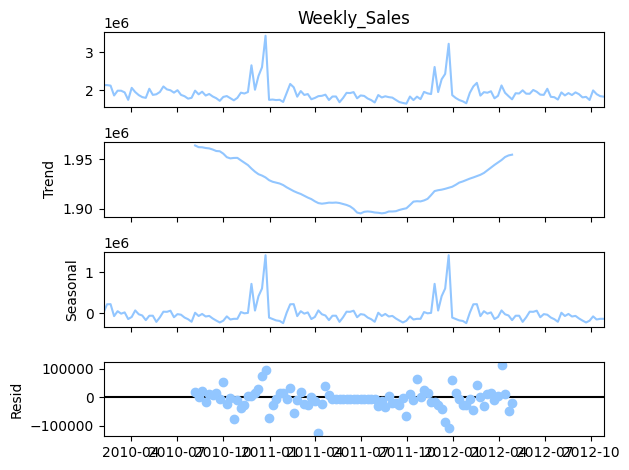

In [22]:
seasonal_test.seasonal_decompose(store_number=2, col='Weekly_Sales', period=52)

In [23]:
#------------------------------------------------------------------------------------------------
# Null Hypothesis for the Adfuller test: The time series has a unit root, meaning it is non-stationary.
#------------------------------------------------------------------------------------------------

seasonality = Seasonality(df)


results = seasonality.adfuller(store_number=2, col='Weekly_Sales')

print('P value for the adfuller test: ', results)

#------------------------------------------------------------------------------------------------
# P value obtained from Adfuller test: 0.003 < 0.05
# Hence, we have enough evidence to reject the Null Hypothesis (i.e) the data is stationary
#------------------------------------------------------------------------------------------------

P value for the adfuller test:  0.003990207089066268


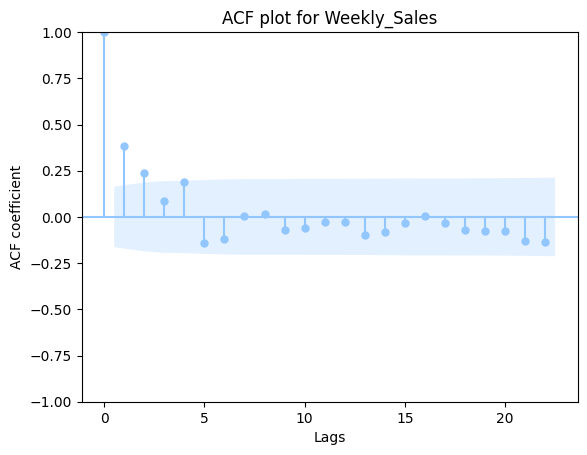

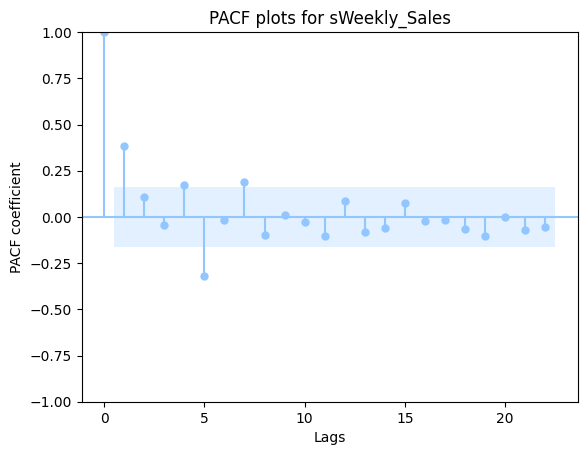

In [24]:
#------------------------------------------------------------------------------------------------------
# Plotting ACF AND PACF coefficients to build an optimal model 
#------------------------------------------------------------------------------------------------------

tsa_plots = TsaPlots(df)


tsa_plots.combined_tsa_plots(store_number=2, col='Weekly_Sales')


## INFERING ACF AND PACF PLOTS FOR STORE 2

    1)From the ACF plot, we can select 3 as Moving Average Coefficient (q)
    2)From the PACF plot, we can select 2 as AutoRegressive coefficient (p)
    3)Since the data is sattionary, there were no steps involved in stationarizing the data (i.e) Differencing Coefficient will be 1 (d)
    

#

In [2]:
#-------------------------------------------------------------------------------------------------------
# Making lists to track Model Performance
#-------------------------------------------------------------------------------------------------------
store_2_model = []
store_2_mape = []
store_2_order = []

# TIME SERIES MODELLING (ARIMA AND SARIMAX)

## ARIMA MODEL

In [26]:
time_series_models = TimeSeriesModel(df)

Selected Store :  2
Mean absolute Percentage error for the ARIMA model  0.03751890000397083
Root Mean Squared Error for the ARIMA model:  87655.80112337251


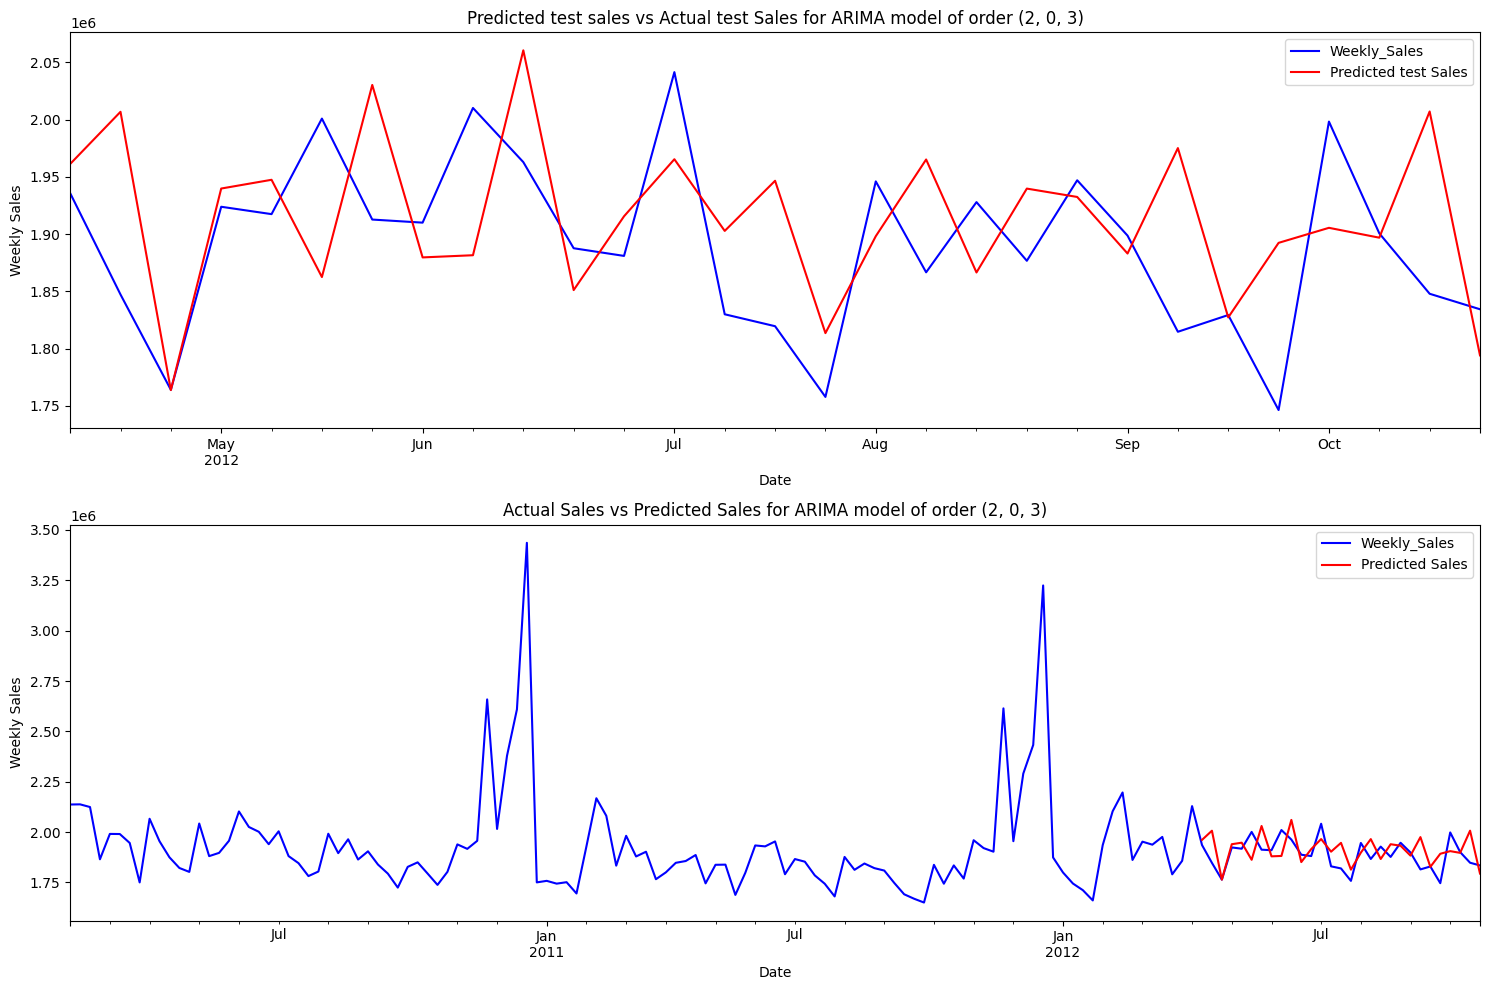

In [27]:
ar_model = time_series_models.build_arima(store_number=2, train_size=0.8, order=(2,0,3), return_data=False)

In [3]:
store_2_model.append('Arima')
store_2_mape.append(0.037)
store_2_order.append((2,0,3))

Selected Store :  2
Mean absolute Percentage error for the ARIMA model  0.03623293875976274
Root Mean Squared Error for the ARIMA model:  81478.79349006905


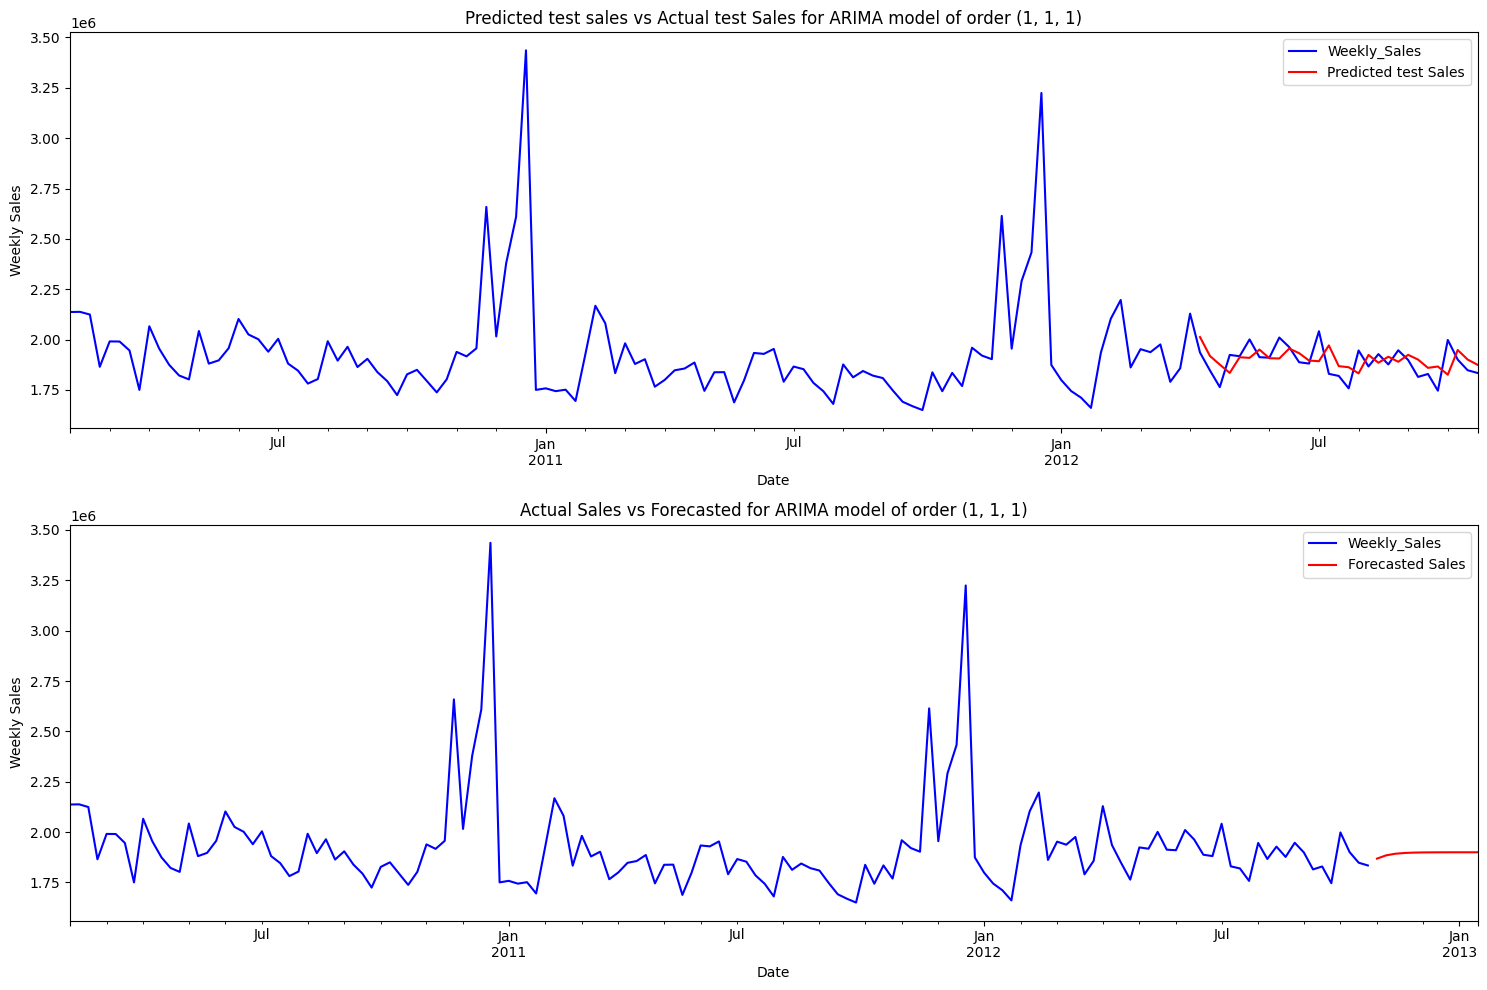

In [29]:
forecast_df = time_series_models.forecast_arima(store_number=2, train_size=0.8,
                                                steps=12)

In [30]:
model_scores = pd.read_pickle('../New folder/reports/Sarimax_coeff_scores2.pkl')
model_scores.sort_values(by='mape').head()

order seasonal order          rmse      mape
26  (4, 1, 5)  (2, 2, 2, 52)  31588.046524  0.023429
24  (4, 1, 5)  (2, 2, 0, 52)  31471.176216  0.023752
25  (4, 1, 5)  (2, 2, 1, 52)  31217.932298  0.023915
2   (4, 1, 5)  (0, 0, 2, 52)  31590.984585  0.024618
9   (4, 1, 5)  (1, 0, 0, 52)  31921.698347  0.024869

Selected Store :  2
Mean absolute Percentage error for the ARIMA model  0.032363812781809755
Root Mean Squared Error for the ARIMA model:  76624.73824360676


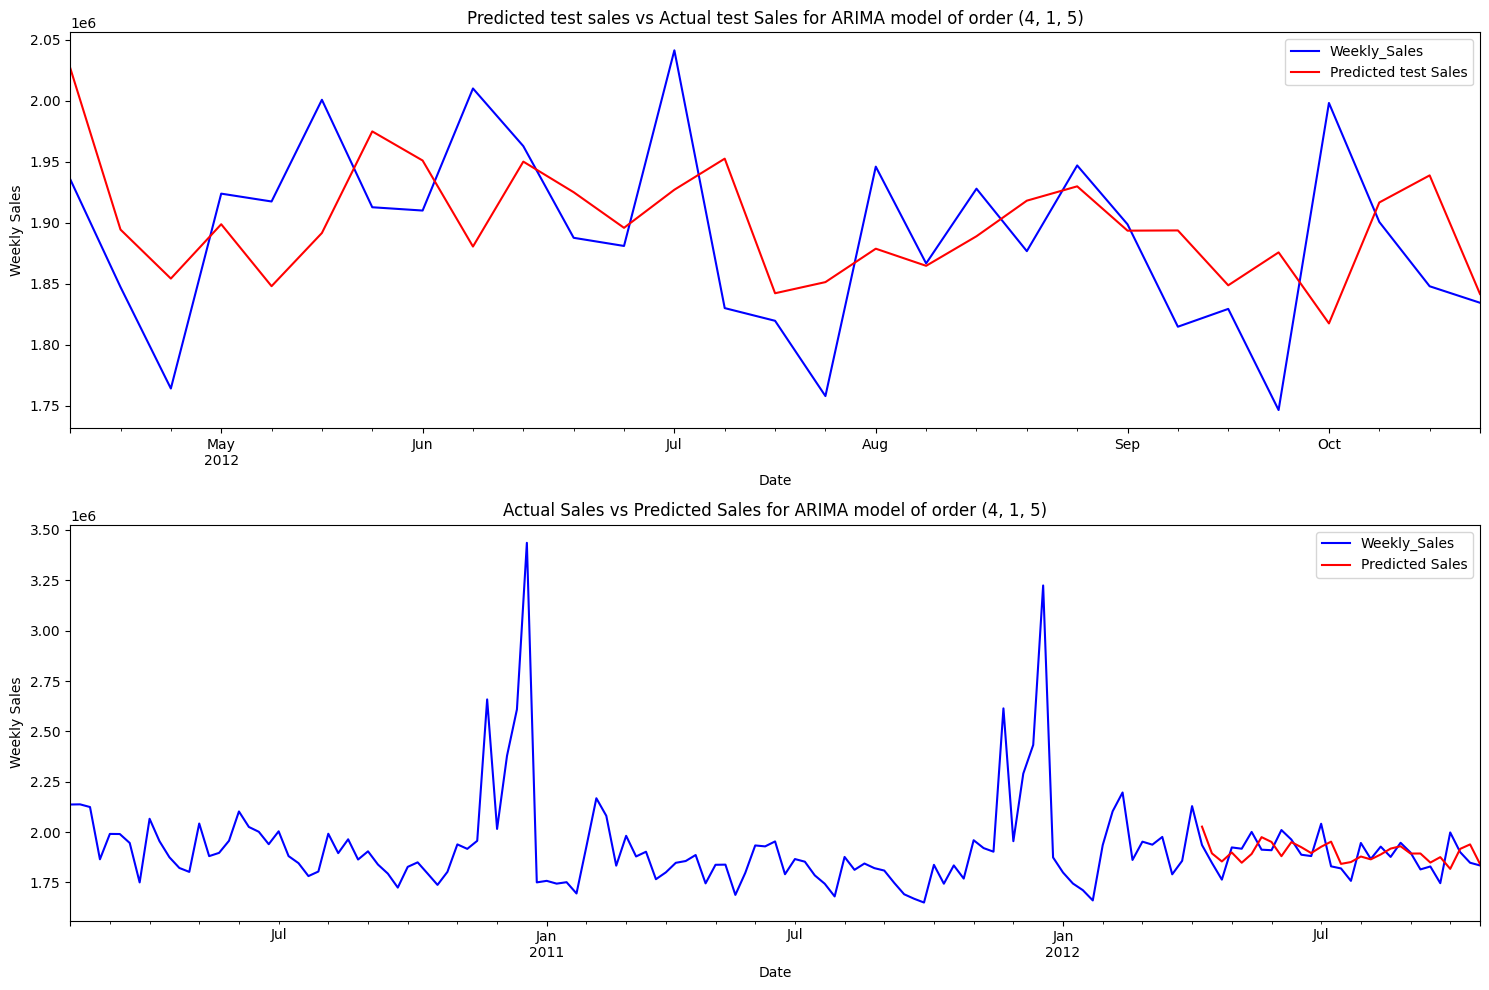

In [31]:
#--------------------------------------------------------------------------------------------------
# Building an ARIMA model with optimal coefficients obtained from Iterating in 'timeseriesModelOptimizing'
#--------------------------------------------------------------------------------------------------

ar_model = time_series_models.build_arima(store_number=2, train_size=0.8, order=(4,1,5), return_data=False)

In [43]:
store_2_model.append('Arima')
store_2_mape.append(0.032)
store_2_order.append((4,1,5))

Selected Store :  2
Mean absolute Percentage error for the ARIMA model  0.03623293875976274
Root Mean Squared Error for the ARIMA model:  81478.79349006905


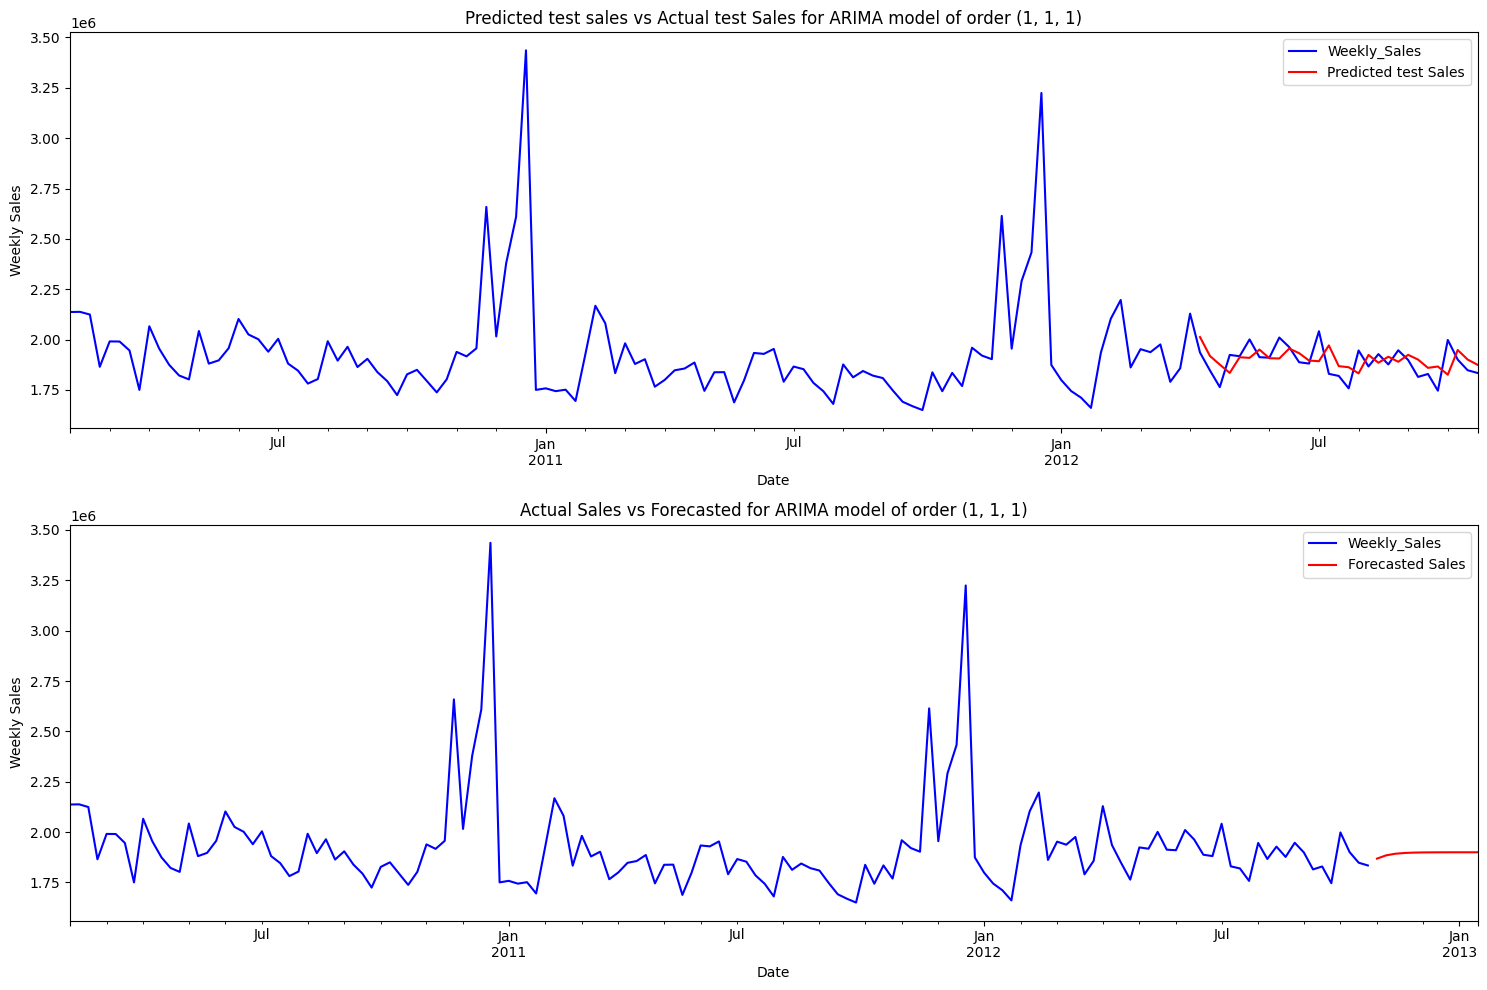

In [33]:
forecast_df = time_series_models.forecast_arima(store_number=2, train_size=0.8,
                                                steps=12)

## BUILDING A SARIMAX MODEL WITH OPTIMAL ORDER SCORES

Selected Store :  2
Mean absolute Percentage error for the SARIMAX model  0.029239356351453236
Root Mean Squared Error for the SARIMAX model:  72491.6304818458


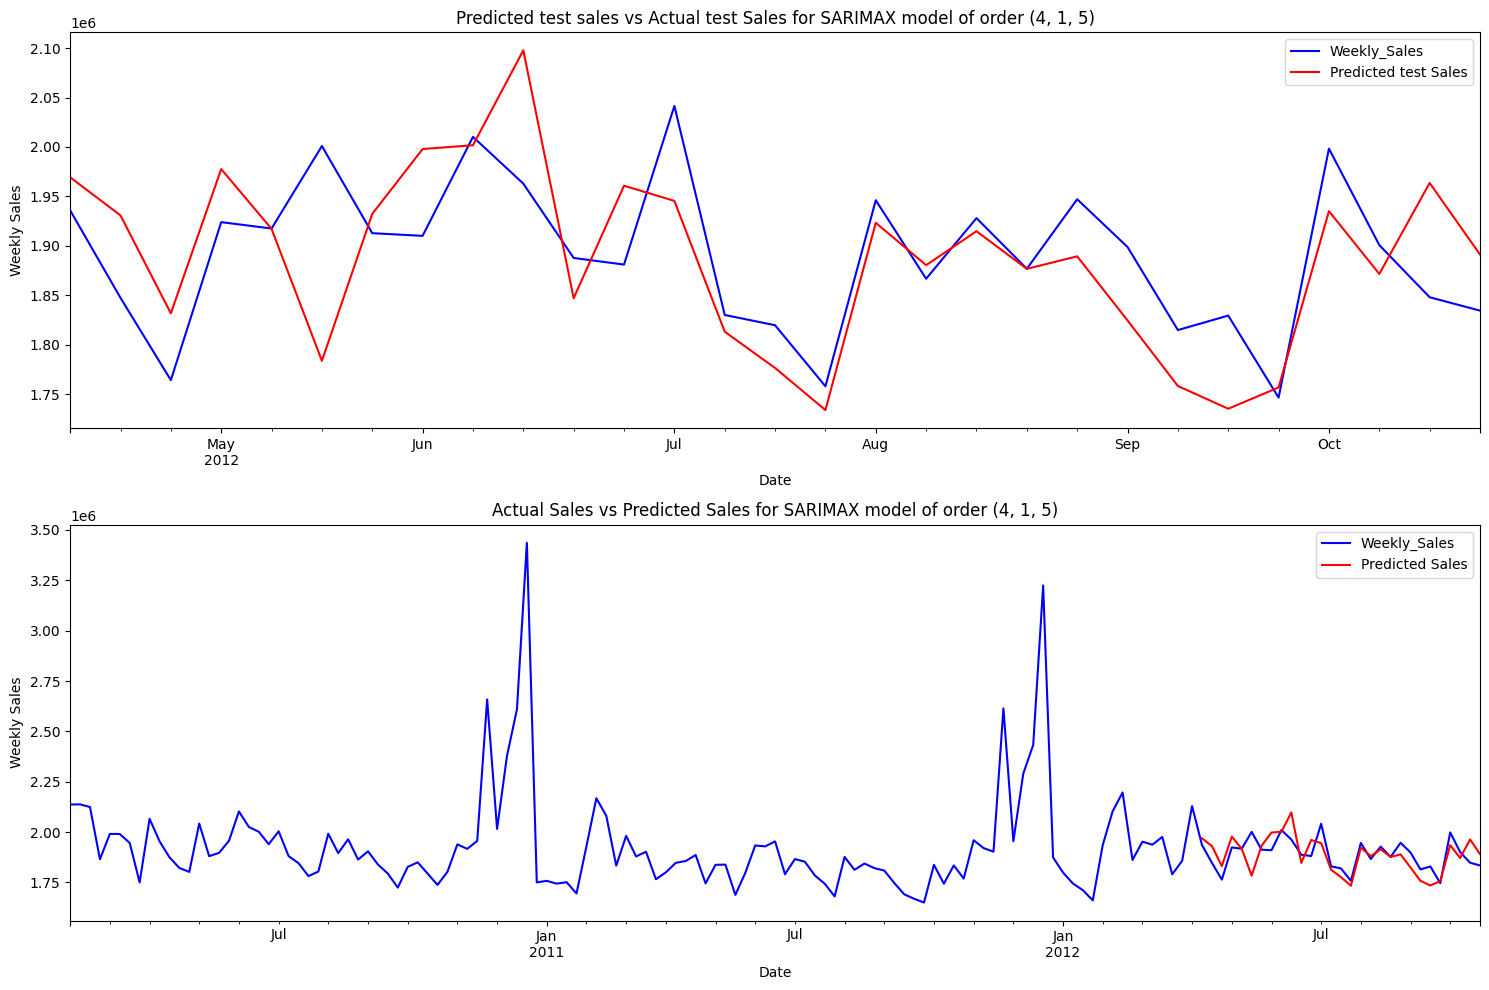

In [34]:
sr_model = time_series_models.build_sarimax(store_number=2, train_size=0.8, order=(4,1,5), seasonal_order=(2,2,2,52))

In [4]:
store_2_model.append('Sarimax')
store_2_mape.append(0.029)
store_2_order.append((4,1,5))

Selected Store :  2
Mean absolute Percentage error for the ARIMA model  0.029239356351453236
Root Mean Squared Error for the ARIMA model:  72491.6304818458


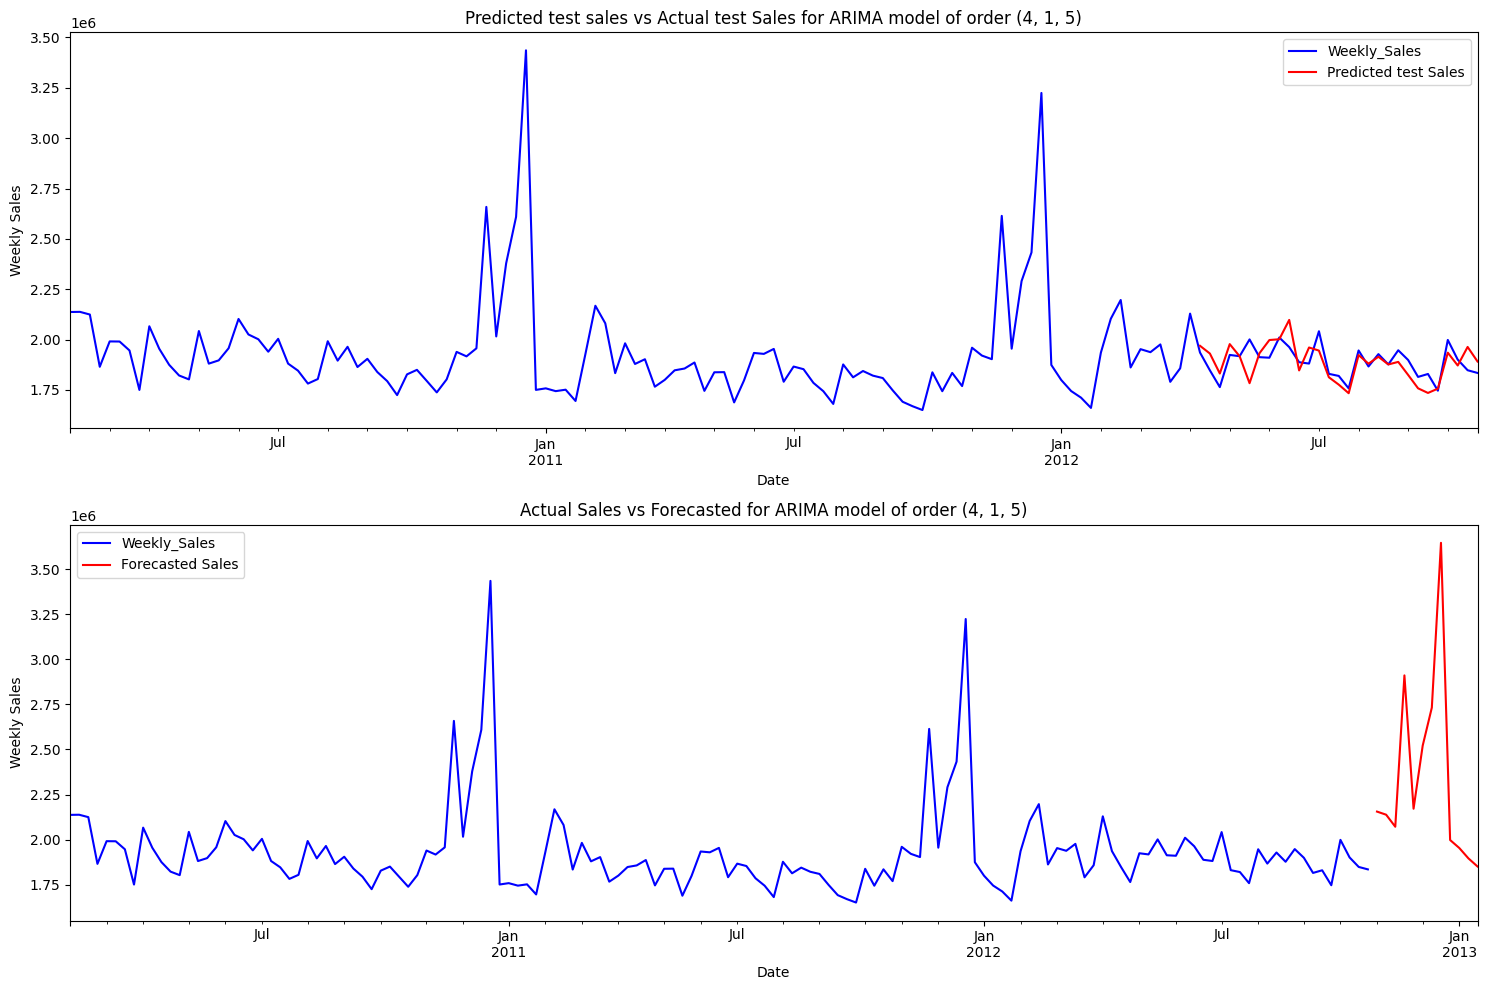

In [37]:
forecast_df = time_series_models.forecast_sarimax(store_number=2, train_size=0.8,  order=(4,1,5), seasonal_order=(2,2,2,52),
                                                  steps=12)

# BUILDING A SIMPLE NEURAL NETWORK MODEL

In [86]:
df = pd.read_pickle('../New folder/data/processed/walmart.pkl')
df.head()

Store  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
Date                                                                     
2010-02-05      1    1643690.90             0        42.31       2.572   
2010-02-12      1    1641957.44             1        38.51       2.548   
2010-02-19      1    1611968.17             0        39.93       2.514   
2010-02-26      1    1409727.59             0        46.63       2.561   
2010-03-05      1    1554806.68             0        46.50       2.625   

                   CPI  Unemployment  
Date                                  
2010-02-05  211.096358         8.106  
2010-02-12  211.242170         8.106  
2010-02-19  211.289143         8.106  
2010-02-26  211.319643         8.106  
2010-03-05  211.350143         8.106

In [21]:
store_2, train_data, test_data = make_dataset(df, store_number=2, train_size=0.8, return_train_test=True)
train_data = np.array(train_data).reshape(-1,1)
test_data = np.array(test_data).reshape(-1,1)

scaler = MinMaxScaler(feature_range=(0,1))

train_data = scaler.fit_transform(train_data)
test_data = scaler.transform(test_data)


x_train, y_train = preprocess_data(train_data, 6)
x_test, y_test = preprocess_data(test_data,6)


print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape) 

(107, 6)
(22, 6)
(107, 1)
(22, 1)


In [22]:
model = Sequential()

model.add(LSTM(32,return_sequences=True, input_shape=(6,1)))
model.add(LSTM(16))

model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(optimizer='adam', loss='mean_squared_error')

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 6, 32)          │         4,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 16)             │         3,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,065 (31.50 KB)

 Trainable params: 8,065 (31.50 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
model.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=150)

Epoch 1/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 101ms/step - loss: 0.0453 - val_loss: 0.0118
Epoch 2/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0339 - val_loss: 0.0066
Epoch 3/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0298 - val_loss: 0.0031
Epoch 4/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0243 - val_loss: 0.0018
Epoch 5/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0211 - val_loss: 0.0024
Epoch 6/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0261 - val_loss: 0.0032
Epoch 7/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0199 - val_loss: 0.0030
Epoch 8/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0211 - val_loss: 0.0026
Epoch 9/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0188 - val_loss: 0.0020
Epoch 10/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0241 - val_loss: 0.0018
Epoch 11/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0187 - val_loss: 0.0018
Epoch 12/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0268 - val_l

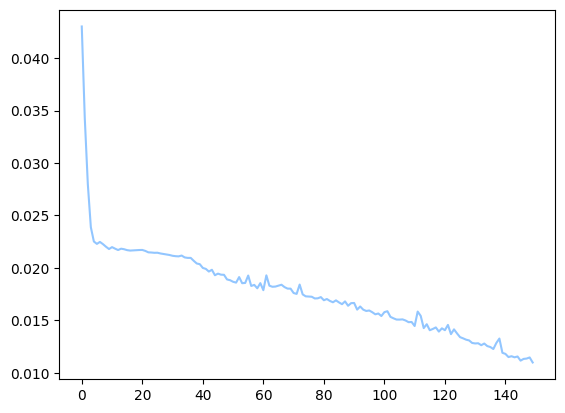

In [24]:
loss = model.history.history['loss']
plt.plot(range(len(loss)), loss)
plt.show()

In [25]:
train_preds = model.predict(x_train)
test_preds = model.predict(x_test)

train_preds = scaler.inverse_transform(train_preds)
test_preds = scaler.inverse_transform(test_preds)

y_train = scaler.inverse_transform(y_train.reshape(-1,1))
y_test = scaler.inverse_transform(y_test.reshape(-1,1))

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/stepWARNING:tensorflow:5 out of the last 11 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x0000015AEF96A9E0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


In [5]:
print('RMSE for Training dataset: ', np.sqrt(mean_squared_error(y_train, train_preds)))
print('MAPE for Training dataset: ', mean_absolute_percentage_error(y_train, train_preds))

print('\n\nRMSE for testing dataset: ', np.sqrt(mean_squared_error(y_test, test_preds)))
print('MAPE for testing dataset: ', mean_absolute_percentage_error(y_test, test_preds))

store_2_model.append('LSTM')
store_2_mape.append(0.038)
store_2_order.append('N/A')


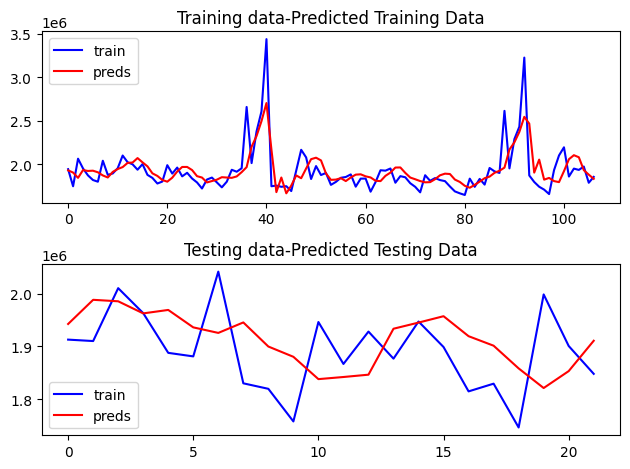

In [35]:
fig, axs = plt.subplots(2,1)

axs[0].plot(y_train, color='blue', label='train')
axs[0].plot(train_preds, color='red', label='preds')
axs[0].set_title('Training data-Predicted Training Data')
axs[0].legend()


axs[1].plot(y_test, color='blue', label='train')
axs[1].plot(test_preds, color='red', label='preds')
axs[1].set_title('Testing data-Predicted Testing Data')
axs[1].legend()

plt.tight_layout()

# BUILDING A CNN MODEL

In [52]:
store_2, train_data, test_data = make_dataset(df, store_number=2, train_size=0.8, return_train_test=True)
train_data = np.array(train_data).reshape(-1,1)
test_data = np.array(test_data).reshape(-1,1)

scaler = MinMaxScaler(feature_range=(0,1))

train_data = scaler.fit_transform(train_data)
test_data = scaler.transform(test_data)


x_train, y_train = preprocess_data(train_data, 6)
x_test, y_test = preprocess_data(test_data,6)


model = Sequential()

model.add(Conv1D(filters=16, kernel_size=2, activation='relu', input_shape=(6,1)))
#model.add(LSTM(100, return_sequences=True))
model.add(LSTM(32))
model.add(Dense(64, activation='relu'))

model.add(Dense(1, activation='linear'))


model.compile(optimizer='adam', loss='mean_squared_error')

model.summary()


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_1 (Conv1D)               │ (None, 5, 16)          │            48 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_9 (LSTM)                   │ (None, 32)             │         6,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,497 (33.19 KB)

 Trainable params: 8,497 (33.19 KB)

 Non-trainable params: 0 (0.00 B)

In [53]:
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=150)

Epoch 1/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 84ms/step - loss: 0.0439 - val_loss: 0.0095
Epoch 2/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0265 - val_loss: 0.0045
Epoch 3/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0276 - val_loss: 0.0019
Epoch 4/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0190 - val_loss: 0.0024
Epoch 5/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0260 - val_loss: 0.0036
Epoch 6/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0203 - val_loss: 0.0031
Epoch 7/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0226 - val_loss: 0.0021
Epoch 8/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0262 - val_loss: 0.0018
Epoch 9/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0241 - val_loss: 0.0018
Epoch 10/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0270 - val_loss: 0.0018
Epoch 11/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0231 - val_loss: 0.0018
Epoch 12/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0212 - val_lo

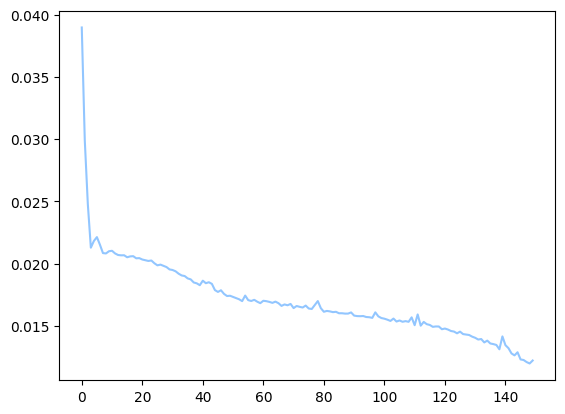

In [54]:
loss = model.history.history['loss']
plt.plot(range(len(loss)), loss)
plt.show()

In [55]:
train_preds = model.predict(x_train)
test_preds = model.predict(x_test)

train_preds = scaler.inverse_transform(train_preds)
test_preds = scaler.inverse_transform(test_preds)

y_train = scaler.inverse_transform(y_train.reshape(-1,1))
y_test = scaler.inverse_transform(y_test.reshape(-1,1))

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


In [6]:
print('RMSE for Training dataset: ', np.sqrt(mean_squared_error(y_train, train_preds)))
print('MAPE for Training dataset: ', mean_absolute_percentage_error(y_train, train_preds))

print('\n\nRMSE for testing dataset: ', np.sqrt(mean_squared_error(y_test, test_preds)))
print('MAPE for testing dataset: ', mean_absolute_percentage_error(y_test, test_preds))

store_2_model.append('CNN')
store_2_mape.append(0.038)
store_2_order.append('N/A')


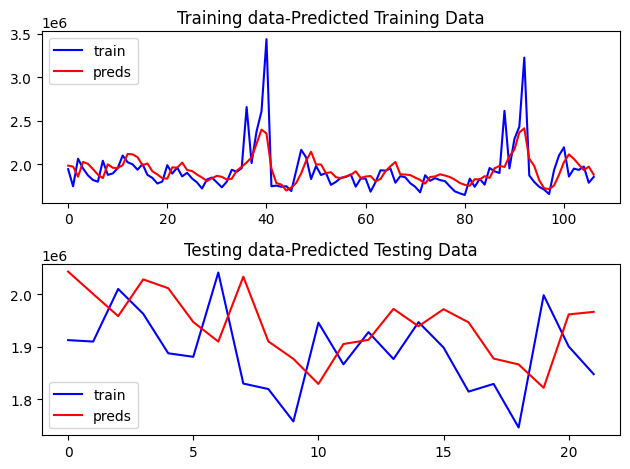

In [57]:
fig, axs = plt.subplots(2,1)

axs[0].plot(y_train, color='blue', label='train')
axs[0].plot(train_preds, color='red', label='preds')
axs[0].set_title('Training data-Predicted Training Data')
axs[0].legend()


axs[1].plot(y_test, color='blue', label='train')
axs[1].plot(test_preds, color='red', label='preds')
axs[1].set_title('Testing data-Predicted Testing Data')
axs[1].legend()

plt.tight_layout()

# BUILDING A SIMPLE RNN model 

In [58]:
store_2, train_data, test_data = make_dataset(df, store_number=2, train_size=0.8, return_train_test=True)
train_data = np.array(train_data).reshape(-1,1)
test_data = np.array(test_data).reshape(-1,1)

scaler = MinMaxScaler(feature_range=(0,1))

train_data = scaler.fit_transform(train_data)
test_data = scaler.transform(test_data)


x_train, y_train = preprocess_data(train_data, 6)
x_test, y_test = preprocess_data(test_data,6)


model = Sequential()

model.add(SimpleRNN(32, activation='relu', input_shape=(6,1)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(optimizer='adam', loss='mean_squared_error')

model.summary()


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 32)             │         1,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,177 (8.50 KB)

 Trainable params: 2,177 (8.50 KB)

 Non-trainable params: 0 (0.00 B)

In [59]:
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=150)

Epoch 1/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - loss: 0.0298 - val_loss: 0.0071
Epoch 2/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0337 - val_loss: 0.0031
Epoch 3/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0237 - val_loss: 0.0018
Epoch 4/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0209 - val_loss: 0.0024
Epoch 5/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0210 - val_loss: 0.0032
Epoch 6/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0158 - val_loss: 0.0030
Epoch 7/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0158 - val_loss: 0.0025
Epoch 8/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0176 - val_loss: 0.0020
Epoch 9/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0171 - val_loss: 0.0019
Epoch 10/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0176 - val_loss: 0.0020
Epoch 11/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0195 - val_loss: 0.0020
Epoch 12/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0157 - val_lo

In [60]:
train_preds = model.predict(x_train)
test_preds = model.predict(x_test)

train_preds = scaler.inverse_transform(train_preds)
test_preds = scaler.inverse_transform(test_preds)

y_train = scaler.inverse_transform(y_train.reshape(-1,1))
y_test = scaler.inverse_transform(y_test.reshape(-1,1))

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


In [8]:
print('RMSE for Training dataset: ', np.sqrt(mean_squared_error(y_train, train_preds)))
print('MAPE for Training dataset: ', mean_absolute_percentage_error(y_train, train_preds))

print('\n\nRMSE for testing dataset: ', np.sqrt(mean_squared_error(y_test, test_preds)))
print('MAPE for testing dataset: ', mean_absolute_percentage_error(y_test, test_preds))

store_2_model.append('SimpleRNN')
store_2_mape.append(0.037)
store_2_order.append('N/A')

# BUILDING A RANDOM FOREST REGRESSOR

In [66]:
rfc = RandomForestRegressor()

In [68]:
store_2, train_data, test_data = make_dataset(df, store_number=2, train_size=0.8, return_train_test=True)
train_data = np.array(train_data).reshape(-1,1)
test_data = np.array(test_data).reshape(-1,1)

scaler = MinMaxScaler(feature_range=(0,1))

train_data = scaler.fit_transform(train_data)
test_data = scaler.transform(test_data)

x_train, y_train = preprocess_data(train_data, 6)
x_test, y_test = preprocess_data(test_data,6)

rfc.fit(x_train, y_train)
preds = rfc.predict(x_test)

preds = scaler.inverse_transform(preds.reshape(-1,1))

y_test = scaler.inverse_transform(y_test)

y_train = scaler.inverse_transform(y_train)

In [9]:
print('\n\nRMSE for testing dataset: ', np.sqrt(mean_squared_error(y_test, preds)))
print('MAPE for testing dataset: ', mean_absolute_percentage_error(y_test, preds))


store_2_model.append('RandomForestRegressor')
store_2_mape.append(0.037)
store_2_order.append('N/A')


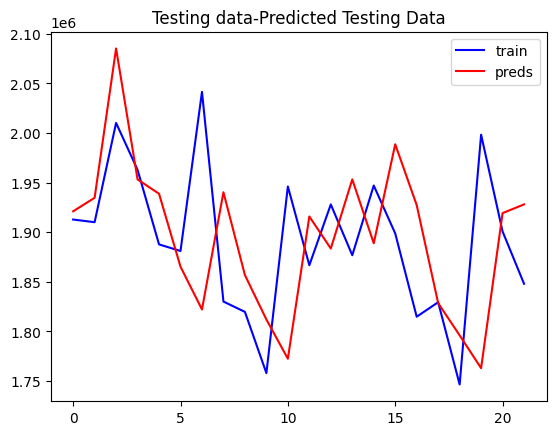

In [74]:
plt.plot(y_test, color='blue', label='train')
plt.plot(preds, color='red', label='preds')
plt.title('Testing data-Predicted Testing Data')
plt.legend()

# BUILDING AN XGB REGRESSOR

In [77]:
xgbr = XGBRegressor(objective='reg:squarederror')

In [82]:
store_2, train_data, test_data = make_dataset(df, store_number=2, train_size=0.8, return_train_test=True)
train_data = np.array(train_data).reshape(-1,1)
test_data = np.array(test_data).reshape(-1,1)

scaler = MinMaxScaler(feature_range=(0,1))

train_data = scaler.fit_transform(train_data)
test_data = scaler.transform(test_data)

x_train, y_train = preprocess_data(train_data, 6)
x_test, y_test = preprocess_data(test_data,6)

xgbr.fit(x_train, y_train)
preds = xgbr.predict(x_test)

preds = scaler.inverse_transform(preds.reshape(-1,1))

y_test = scaler.inverse_transform(y_test)

y_train = scaler.inverse_transform(y_train)

In [10]:
print('\n\nRMSE for testing dataset: ', np.sqrt(mean_squared_error(y_test, preds)))
print('MAPE for testing dataset: ', mean_absolute_percentage_error(y_test, preds))


store_2_model.append('xgbr')
store_2_mape.append(0.049)
store_2_order.append('N/A')

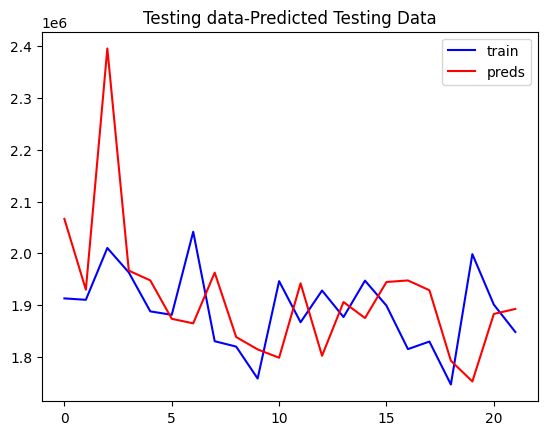

In [85]:
plt.plot(y_test, color='blue', label='train')
plt.plot(preds, color='red', label='preds')
plt.title('Testing data-Predicted Testing Data')
plt.legend()

# 

# BUILDING A LINEAR REGRESSION MODEL

In [90]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [91]:
store_2, train_data, test_data = make_dataset(df, store_number=2, train_size=0.8, return_train_test=True)
train_data = np.array(train_data).reshape(-1,1)
test_data = np.array(test_data).reshape(-1,1)

scaler = MinMaxScaler(feature_range=(0,1))

train_data = scaler.fit_transform(train_data)
test_data = scaler.transform(test_data)

x_train, y_train = preprocess_data(train_data, 6)
x_test, y_test = preprocess_data(test_data,6)

lr.fit(x_train, y_train)
preds = lr.predict(x_test)

preds = scaler.inverse_transform(preds.reshape(-1,1))

y_test = scaler.inverse_transform(y_test)

y_train = scaler.inverse_transform(y_train)

In [11]:
print('\n\nRMSE for testing dataset: ', np.sqrt(mean_squared_error(y_test, preds)))
print('MAPE for testing dataset: ', mean_absolute_percentage_error(y_test, preds))


store_2_model.append('lr')
store_2_mape.append(0.033)
store_2_order.append('N/A')

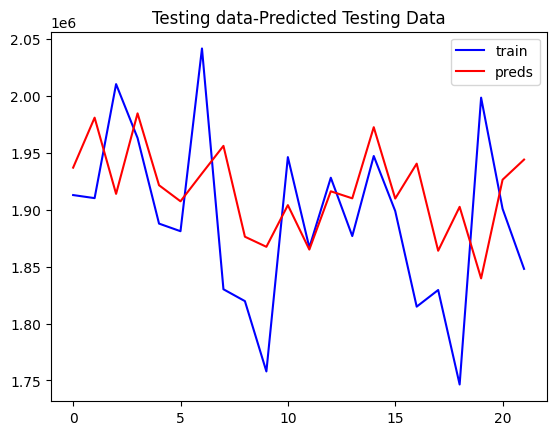

In [93]:
plt.plot(y_test, color='blue', label='train')
plt.plot(preds, color='red', label='preds')
plt.title('Testing data-Predicted Testing Data')
plt.legend()

# FINALIZING ON THE BEST PERFORMING MODEL FOR FORECASTING

In [12]:
model_performance = pd.DataFrame({
    'Model': store_2_model,
    'Order': store_2_order,
    'MAPE': store_2_mape
})

In [13]:
model_performance.sort_values(by='MAPE', inplace=True)
model_performance

Model      Order   MAPE
1                Sarimax  (4, 1, 5)  0.029
7                     lr        N/A  0.033
0                  Arima  (2, 0, 3)  0.037
4              SimpleRNN        N/A  0.037
5  RandomForestRegressor        N/A  0.037
2                   LSTM        N/A  0.038
3                    CNN        N/A  0.038
6                   xgbr        N/A  0.049

In [ ]:
model_performance.to_pickle('../New folder/reports/ModelPerformanceScores.pkl')

# INFERENCES ON MODEL PERFORMANCE 


    

## Various Models were trained and their performances were assessed.
    ARIMA model with various coefficients
    Sarimax model with various coefficients 
    Neural Network with LSTM layers
    Neural Nerwok with CNN layers
    Neural Network with Simple RNN layer 
    Random Forest XGBRegressor
    XGboost Regressor 
    Linear Regressor 
    
Upon detailed assessment, Sarimax model screened the best Performance and Adaptability to Seasonal changes.
Hence Final Forecasting will be performed using Sarimax model with order(4,1,5) and seasonal_order(2,2,2,52)

# FINAL 12 WEEK SALES FORECASTING FOR STORE NUMBER 2

In [16]:
df = pd.read_pickle('../New folder/data/processed/walmart.pkl')
time_series_models = TimeSeriesModel(df)

Selected Store :  2
Mean absolute Percentage error for the SARIMAX model  0.02915374126908298
Root Mean Squared Error for the SARIMAX model:  72142.13715869587


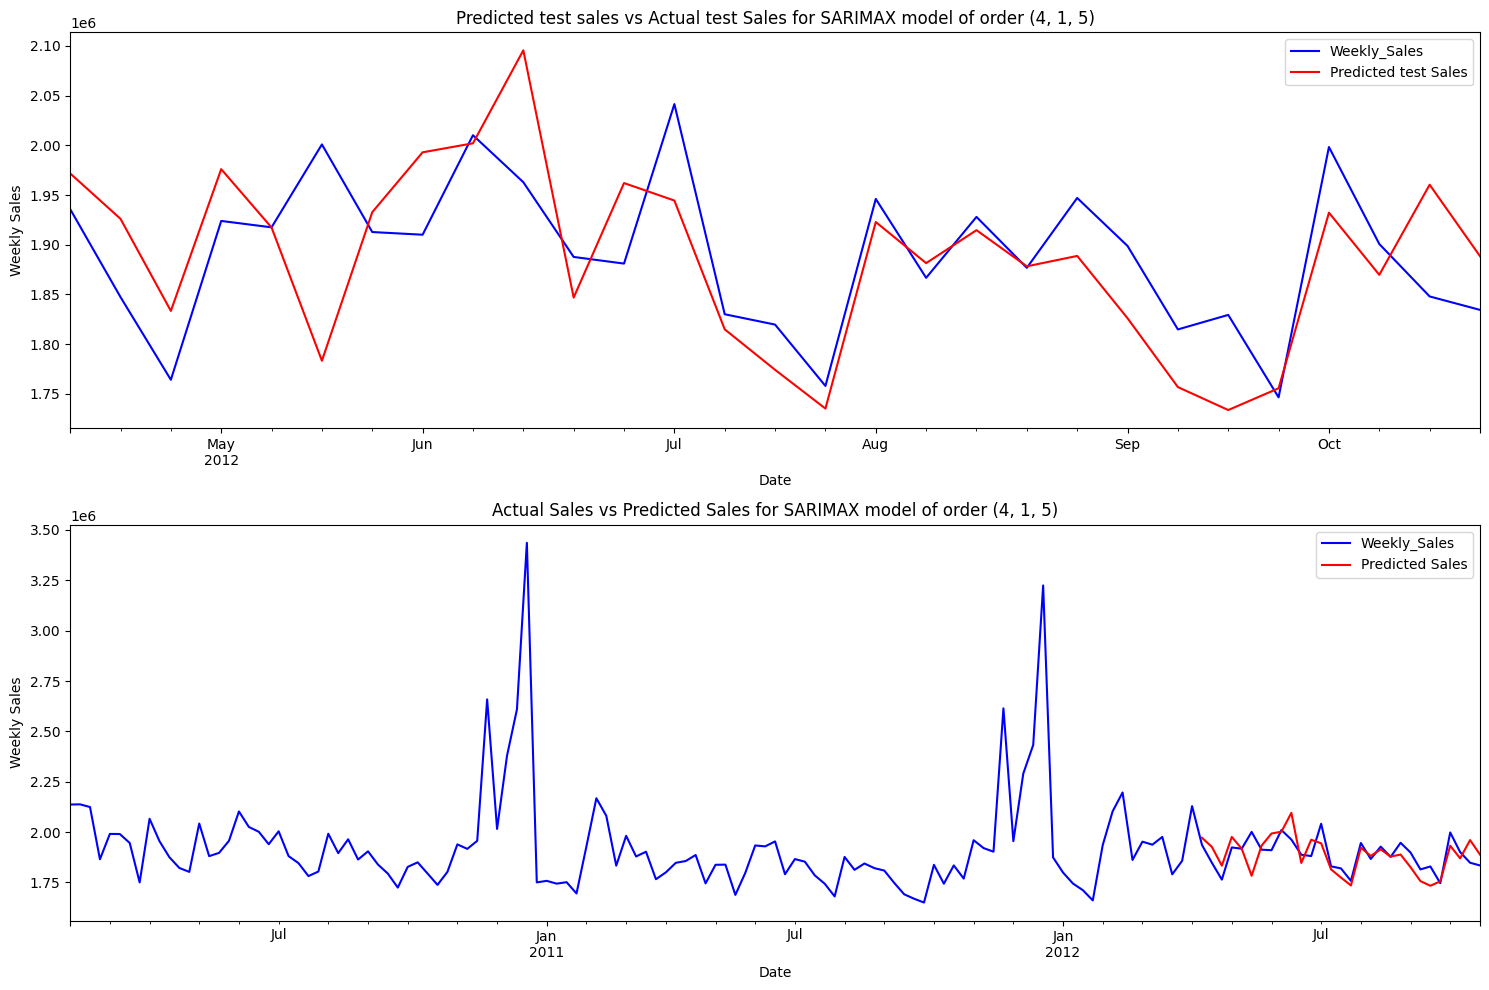

In [105]:
final_model = time_series_models.build_sarimax(store_number=2, train_size=0.8, order=(4,1,5), seasonal_order=(2,2,2,52))

Selected Store :  2
Mean absolute Percentage error for the ARIMA model  0.02915374126908298
Root Mean Squared Error for the ARIMA model:  72142.13715869587


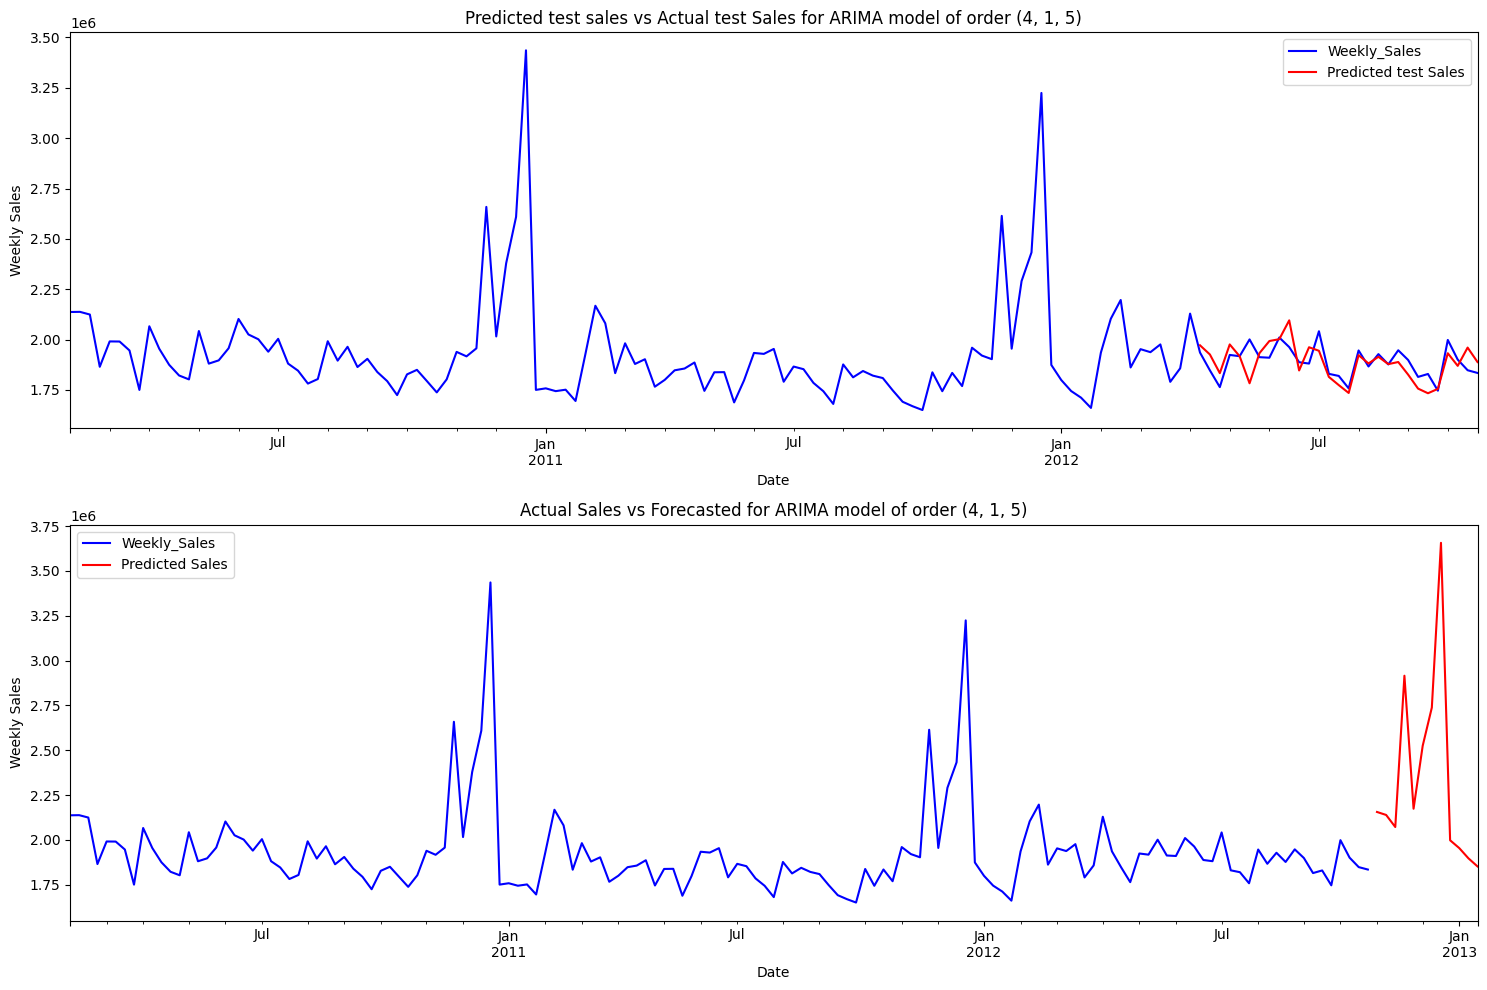

In [19]:
results = time_series_models.forecast_sarimax(store_number=2, train_size=0.8,
                                              order=(4,1,5), seasonal_order=(2,2,2,52),
                                              steps=12,
                                              return_data=True)

In [27]:
store_2 = make_dataset(df, store_number=2)
store_2_sales = store_2[['Weekly_Sales']]
store_2.head()

Store  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
Date                                                                     
2010-02-05      2    2136989.46             0        40.19       2.572   
2010-02-12      2    2137809.50             1        38.49       2.548   
2010-02-19      2    2124451.54             0        39.69       2.514   
2010-02-26      2    1865097.27             0        46.10       2.561   
2010-03-05      2    1991013.13             0        47.17       2.625   

                   CPI  Unemployment  
Date                                  
2010-02-05  210.752605         8.324  
2010-02-12  210.897994         8.324  
2010-02-19  210.945160         8.324  
2010-02-26  210.975957         8.324  
2010-03-05  211.006754         8.324

## WEEKLY SALES AND 12 WEEK FORECAST DF FOR STORE 2 

In [30]:
final_forecast = pd.concat([store_2_sales, results], axis=1)
final_forecast

Weekly_Sales      Forecast
2010-02-05    2136989.46           NaN
2010-02-12    2137809.50           NaN
2010-02-19    2124451.54           NaN
2010-02-26    1865097.27           NaN
2010-03-05    1991013.13           NaN
...                  ...           ...
2012-12-21           NaN  3.657088e+06
2012-12-28           NaN  1.997657e+06
2013-01-04           NaN  1.954066e+06
2013-01-11           NaN  1.897250e+06
2013-01-18           NaN  1.851682e+06

[155 rows x 2 columns]

## FINAL TABLE FOR STORE 2 (Includes all columns and Forecasted Sales for the next 12 weeks)

In [34]:
store_2 = pd.concat([store_2, results], axis=1)
store_2

Store  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
2010-02-05    2.0    2136989.46           0.0        40.19       2.572   
2010-02-12    2.0    2137809.50           1.0        38.49       2.548   
2010-02-19    2.0    2124451.54           0.0        39.69       2.514   
2010-02-26    2.0    1865097.27           0.0        46.10       2.561   
2010-03-05    2.0    1991013.13           0.0        47.17       2.625   
...           ...           ...           ...          ...         ...   
2012-12-21    NaN           NaN           NaN          NaN         NaN   
2012-12-28    NaN           NaN           NaN          NaN         NaN   
2013-01-04    NaN           NaN           NaN          NaN         NaN   
2013-01-11    NaN           NaN           NaN          NaN         NaN   
2013-01-18    NaN           NaN           NaN          NaN         NaN   

                   CPI  Unemployment      Forecast  
2010-02-05  210.752605         8.324           NaN  
2010-02-12  210.897994         8.324           NaN  
2010-02-19  210.945160         8.324           NaN  
2010-02-26  210.975957         8.324           NaN  
2010-03-05  211.006754         8.324           NaN  
...                ...           ...           ...  
2012-12-21         NaN           NaN  3.657088e+06  
2012-12-28         NaN           NaN  1.997657e+06  
2013-01-04         NaN           NaN  1.954066e+06  
2013-01-11         NaN           NaN  1.897250e+06  
2013-01-18         NaN           NaN  1.851682e+06  

[155 rows x 8 columns]

# FINAL FORECAST FOR STORE 45

In [9]:
time_series_models = TimeSeriesModel(df)
df = pd.read_pickle('../data/processed/walmart.pkl')

Selected Store :  45
Mean absolute Percentage error for the ARIMA model  0.04444063270309453
Root Mean Squared Error for the ARIMA model:  42044.82845346819


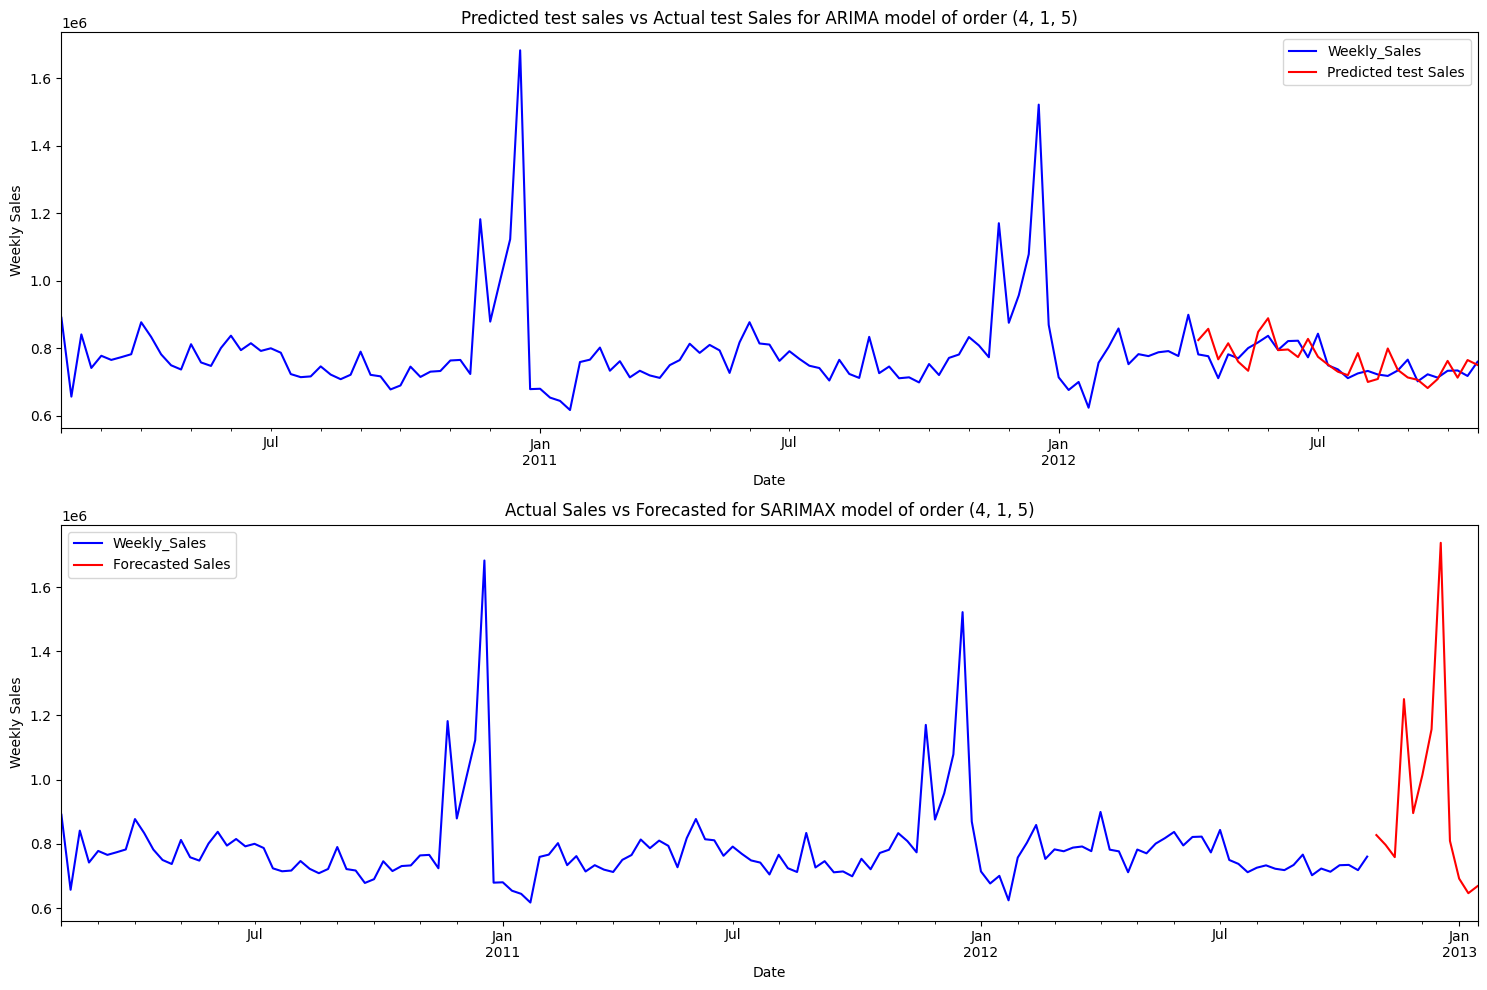

In [11]:
results = time_series_models.forecast_sarimax(store_number=45, train_size=0.8,
                                              order=(4,1,5), seasonal_order=(2,2,2,52),
                                              steps=12,
                                              return_data=True)

In [12]:
store_45 = make_dataset(df, store_number=2)
store_45_sales = store_2[['Weekly_Sales']]
store_45_sales.head()

Weekly_Sales
Date                    
2010-02-05    2136989.46
2010-02-12    2137809.50
2010-02-19    2124451.54
2010-02-26    1865097.27
2010-03-05    1991013.13

##  WEEKLY SALES AND 12 WEEK FORECAST FOR STORE 45

In [13]:
final_forecast = pd.concat([store_45_sales, results], axis=1)
final_forecast

Weekly_Sales      Forecast
2010-02-05    2136989.46           NaN
2010-02-12    2137809.50           NaN
2010-02-19    2124451.54           NaN
2010-02-26    1865097.27           NaN
2010-03-05    1991013.13           NaN
...                  ...           ...
2012-12-21           NaN  1.737918e+06
2012-12-28           NaN  8.092804e+05
2013-01-04           NaN  6.917624e+05
2013-01-11           NaN  6.463201e+05
2013-01-18           NaN  6.683297e+05

[155 rows x 2 columns]

##  FINAL TABLE FOR STORE 45 (INCLUDES ALL COLUMNS AND 12 WEEK FORECAST FOR STORE 45)

In [14]:
store_2 = pd.concat([store_2, results], axis=1)
store_2

Store  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
2010-02-05    2.0    2136989.46           0.0        40.19       2.572   
2010-02-12    2.0    2137809.50           1.0        38.49       2.548   
2010-02-19    2.0    2124451.54           0.0        39.69       2.514   
2010-02-26    2.0    1865097.27           0.0        46.10       2.561   
2010-03-05    2.0    1991013.13           0.0        47.17       2.625   
...           ...           ...           ...          ...         ...   
2012-12-21    NaN           NaN           NaN          NaN         NaN   
2012-12-28    NaN           NaN           NaN          NaN         NaN   
2013-01-04    NaN           NaN           NaN          NaN         NaN   
2013-01-11    NaN           NaN           NaN          NaN         NaN   
2013-01-18    NaN           NaN           NaN          NaN         NaN   

                   CPI  Unemployment      Forecast  
2010-02-05  210.752605         8.324           NaN  
2010-02-12  210.897994         8.324           NaN  
2010-02-19  210.945160         8.324           NaN  
2010-02-26  210.975957         8.324           NaN  
2010-03-05  211.006754         8.324           NaN  
...                ...           ...           ...  
2012-12-21         NaN           NaN  1.737918e+06  
2012-12-28         NaN           NaN  8.092804e+05  
2013-01-04         NaN           NaN  6.917624e+05  
2013-01-11         NaN           NaN  6.463201e+05  
2013-01-18         NaN           NaN  6.683297e+05  

[155 rows x 8 columns]

# EXPLORING SARIMAX MODEL PERFORMANCE 

In [3]:
#df = pd.read_pickle('../Walmart Sales Analysis and Forecasting/data/processed/walmart.pkl')
time_series_models = TimeSeriesModel(df)

Selected Store :  2
Mean absolute Percentage error for the SARIMAX model  0.03251336812441541
Root Mean Squared Error for the SARIMAX model:  82490.77218262653


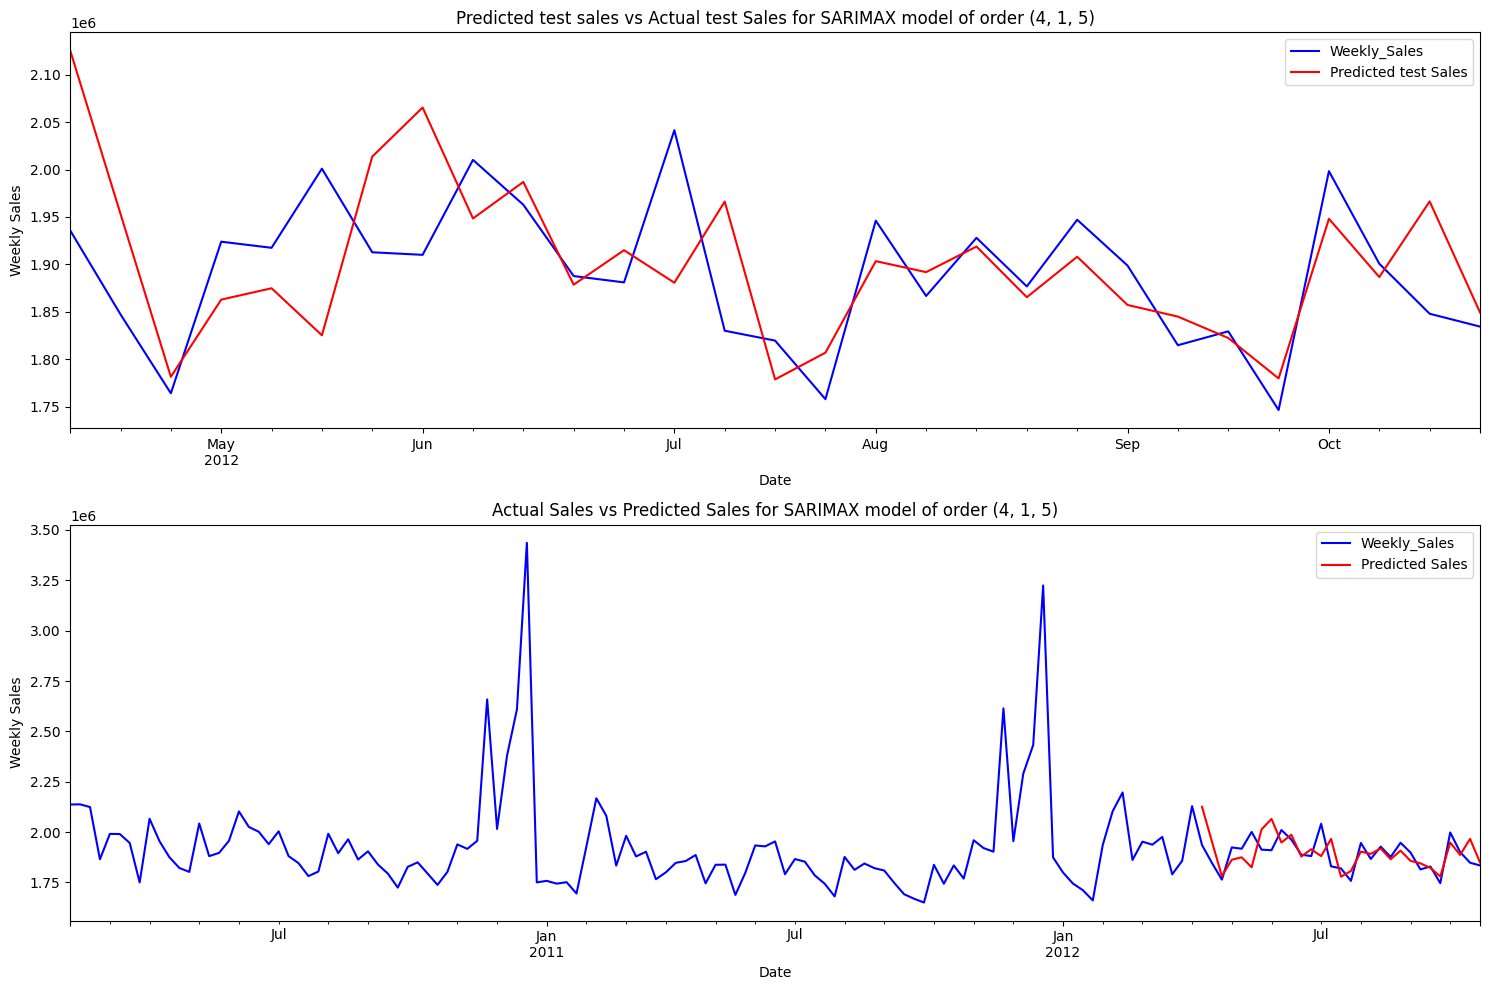

In [4]:
#-------------------------------------------------------------------------------------------------------------------------------
# Plotting the model with a seasonal_irder of (1,1,1,52) as the dataset is too short to adapt to the seasonal_orer of (2,2,2,52)
#-------------------------------------------------------------------------------------------------------------------------------

final_model = time_series_models.build_sarimax(store_number=2, train_size=0.8, order=(4,1,5), seasonal_order=(1,1,1,52), return_model=True)

Sarimax Model diagnostics

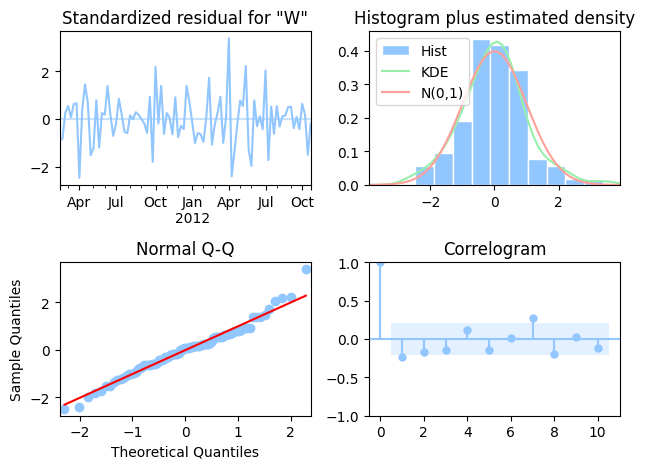

In [6]:

final_model.plot_diagnostics()
plt.tight_layout()
plt.savefig('../Walmart Sales Analysis and Forecasting/reports/sarimax_model_diagnostics.png')
plt.show()

# 12 Week Sales Forecasts for all the Stores

In [ ]:
#for i in df['Store'].unique():    
    #forecast = time_series_models.forecast_sarimax(store_number=i, train_size=0.8, order=(4,1,5), seasonal_order=(2,2,2,52))
    #plt.savefig('../Walmart Sales Analysis and Forecasting/results/Forecast_plots/Store_'+str(i)+'_sarimaxForecast.png')
    #forecast_data = pd.concat([df[df['Store']==i], forecast], axis=1)
    #forecast_data.to_csv('../Walmart Sales Analysis and Forecasting/results/Forecast_data/Store_'+str(i)+'_sarimaxForecast.csv')